# **scScope**

#Data : Single cell transcriptome of human pancreas

Implementation pipeline of scScope model from scdeep package
The pipline consists of the foloowing :
* Loading the data and building a AnnData from the counts data nad metadata
* Preprocessing(quality filtering) and training the scScope model
* Comapring the quality of data before and after the application of model
* Down stream Analysis - PCA, UMAP, Clustering analysis
* Additional visualizations






In [ ]:
!pip install scdeep

In [ ]:
!pip install -q scanpy
!pip install -q phenograph

     |████████████████████████████████| 7.2MB 7.3MB/s 
     |████████████████████████████████| 122kB 60.9MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 163kB 12.3MB/s 
     |████████████████████████████████| 2.4MB 23.7MB/s 
     |████████████████████████████████| 3.2MB 53.2MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/BL uploads'

/content/drive/My Drive/BL uploads


In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import torch
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline 
import scdeep 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Constructing AnnData using the two csv files


In [ ]:
adata= sc.datasets.ebi_expression_atlas("E-GEOD-81547")

In [ ]:
z=(adata.X).toarray()
adata.X=z

In [ ]:
adata.shape

(2544, 27821)

In [ ]:
adata1=adata.copy()

In [ ]:
#import phenograph
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score


-----
#Filtering out only the top 1000 highly expressed genes

In [ ]:
sc.pp.log1p(adata1)
sc.pp.highly_variable_genes(adata1, n_top_genes=1000, subset=True)

In [ ]:
adata1.X

array([[0.      , 0.      , 0.      , ..., 4.634729, 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
      dtype=float32)

In [ ]:
adata1.shape

(2544, 1000)

In [ ]:
gene_expression = adata1.copy()
gene_expression = gene_expression.X

In [ ]:
from scdeep import scScope

In [ ]:
gene_expression_dataset = scdeep.dataset.GeneExpressionDataset()
gene_expression_dataset.from_data(gene_expression)


----
Initailising the model and traning it on "adata"

In [ ]:
model = scScope.scScope(gene_expression_dataset.data, [], [], 50, exp_batch_input=[])
trainer = scScope.scScopeTrainer(model, gene_expression_dataset, batch_size=64)

training:   0%|          | 0/175 [00:00<?, ?it/s]

latent_layer.linear.weight torch.Size([50, 1000])
latent_layer.linear.bias torch.Size([50])
output_layer.linear.weight torch.Size([1000, 50])
output_layer.linear.bias torch.Size([1000])
batch_effect_layer.weight torch.Size([1000, 1])
imputation_model.0.linear.weight torch.Size([64, 1000])
imputation_model.0.linear.bias torch.Size([64])
imputation_model.1.linear.weight torch.Size([1000, 64])
imputation_model.1.linear.bias torch.Size([1000])

Epoch: 1



training:   1%|          | 1/175 [00:00<01:24,  2.06it/s]

Iteration: 0 Loss: 684.4039
Iteration: 1 Loss: 604.6549
Iteration: 2 Loss: 619.2635
Iteration: 3 Loss: 638.7842
Iteration: 4 Loss: 616.2090
Iteration: 5 Loss: 580.8157
Iteration: 6 Loss: 572.3038
Iteration: 7 Loss: 635.4865
Iteration: 8 Loss: 603.7671
Iteration: 9 Loss: 601.8748
Iteration: 10 Loss: 623.9767
Iteration: 11 Loss: 565.4749
Iteration: 12 Loss: 574.7761
Iteration: 13 Loss: 549.1126
Iteration: 14 Loss: 582.1469
Iteration: 15 Loss: 599.7184
Iteration: 16 Loss: 555.4619
Iteration: 17 Loss: 556.3134
Iteration: 18 Loss: 571.3081
Iteration: 19 Loss: 605.3389
Iteration: 20 Loss: 521.4958
Iteration: 21 Loss: 524.9958
Iteration: 22 Loss: 573.0201
Iteration: 23 Loss: 547.1125
Iteration: 24 Loss: 505.9439
Iteration: 25 Loss: 580.3856
Iteration: 26 Loss: 549.8750
Iteration: 27 Loss: 565.9581
Iteration: 28 Loss: 520.8690
Iteration: 29 Loss: 526.4781
Iteration: 30 Loss: 522.9589
Iteration: 31 Loss: 497.9445

Validation Loss: 502.7745


Epoch: 2

Iteration: 0 Loss: 505.7404
Iteration: 1 Lo

training:   1%|          | 2/175 [00:00<01:06,  2.60it/s]

Iteration: 15 Loss: 447.4333
Iteration: 16 Loss: 439.4326
Iteration: 17 Loss: 459.9250
Iteration: 18 Loss: 431.3026
Iteration: 19 Loss: 455.9170
Iteration: 20 Loss: 454.6019
Iteration: 21 Loss: 443.7224
Iteration: 22 Loss: 449.6375
Iteration: 23 Loss: 447.2931
Iteration: 24 Loss: 457.1768
Iteration: 25 Loss: 452.7797
Iteration: 26 Loss: 423.6964
Iteration: 27 Loss: 414.9838
Iteration: 28 Loss: 409.3046
Iteration: 29 Loss: 413.4056
Iteration: 30 Loss: 455.2087
Iteration: 31 Loss: 401.8694

Validation Loss: 417.4901


Epoch: 3

Iteration: 0 Loss: 416.3925
Iteration: 1 Loss: 385.8310
Iteration: 2 Loss: 418.7766
Iteration: 3 Loss: 365.0349
Iteration: 4 Loss: 422.8730
Iteration: 5 Loss: 409.1036
Iteration: 6 Loss: 431.9724
Iteration: 7 Loss: 400.5322
Iteration: 8 Loss: 392.2192
Iteration: 9 Loss: 388.7057
Iteration: 10 Loss: 385.0956
Iteration: 11 Loss: 402.1653
Iteration: 12 Loss: 405.3968
Iteration: 13 Loss: 378.3175
Iteration: 14 Loss: 400.4688
Iteration: 15 Loss: 374.7878
Iteration: 16 

training:   2%|▏         | 4/175 [00:00<00:45,  3.80it/s]

Iteration: 31 Loss: 303.4199

Validation Loss: 373.6469


Epoch: 4

Iteration: 0 Loss: 325.1924
Iteration: 1 Loss: 406.1185
Iteration: 2 Loss: 335.3650
Iteration: 3 Loss: 359.2745
Iteration: 4 Loss: 390.8855
Iteration: 5 Loss: 360.0184
Iteration: 6 Loss: 361.8501
Iteration: 7 Loss: 376.2771
Iteration: 8 Loss: 340.6471
Iteration: 9 Loss: 378.9272
Iteration: 10 Loss: 377.3577
Iteration: 11 Loss: 333.3334
Iteration: 12 Loss: 364.6076
Iteration: 13 Loss: 369.0628
Iteration: 14 Loss: 334.7351
Iteration: 15 Loss: 340.9734
Iteration: 16 Loss: 347.8245
Iteration: 17 Loss: 336.2405
Iteration: 18 Loss: 360.5394
Iteration: 19 Loss: 359.6390
Iteration: 20 Loss: 343.5142
Iteration: 21 Loss: 333.7692
Iteration: 22 Loss: 329.1909
Iteration: 23 Loss: 350.3144
Iteration: 24 Loss: 353.0255
Iteration: 25 Loss: 362.7875
Iteration: 26 Loss: 372.3463
Iteration: 27 Loss: 349.7610
Iteration: 28 Loss: 340.4227
Iteration: 29 Loss: 307.7018
Iteration: 30 Loss: 343.9707
Iteration: 31 Loss: 324.3966

Validation Lo

training:   3%|▎         | 5/175 [00:01<00:39,  4.34it/s]

Iteration: 6 Loss: 341.0890
Iteration: 7 Loss: 319.9634
Iteration: 8 Loss: 315.5342
Iteration: 9 Loss: 326.1718
Iteration: 10 Loss: 299.8176
Iteration: 11 Loss: 334.5995
Iteration: 12 Loss: 346.3780
Iteration: 13 Loss: 345.5174
Iteration: 14 Loss: 321.4374
Iteration: 15 Loss: 340.0915
Iteration: 16 Loss: 323.2868
Iteration: 17 Loss: 326.0320
Iteration: 18 Loss: 329.2715
Iteration: 19 Loss: 326.9751
Iteration: 20 Loss: 333.5295
Iteration: 21 Loss: 341.2572
Iteration: 22 Loss: 326.3897
Iteration: 23 Loss: 329.9109
Iteration: 24 Loss: 333.9966
Iteration: 25 Loss: 339.6293
Iteration: 26 Loss: 325.4389
Iteration: 27 Loss: 325.7210
Iteration: 28 Loss: 319.2198
Iteration: 29 Loss: 348.9422
Iteration: 30 Loss: 348.3431
Iteration: 31 Loss: 285.2001

Validation Loss: 336.7439


Epoch: 6

Iteration: 0 Loss: 307.2036
Iteration: 1 Loss: 347.6618
Iteration: 2 Loss: 287.2006
Iteration: 3 Loss: 319.8773
Iteration: 4 Loss: 330.0243
Iteration: 5 Loss: 328.6588
Iteration: 6 Loss: 331.2119
Iteration: 7 Lo

training:   3%|▎         | 6/175 [00:01<00:35,  4.82it/s]

Iteration: 18 Loss: 304.2005
Iteration: 19 Loss: 306.3898
Iteration: 20 Loss: 317.5787
Iteration: 21 Loss: 309.8757
Iteration: 22 Loss: 311.6281
Iteration: 23 Loss: 335.8703
Iteration: 24 Loss: 299.6232
Iteration: 25 Loss: 332.2849
Iteration: 26 Loss: 334.4003
Iteration: 27 Loss: 323.9389
Iteration: 28 Loss: 337.4075
Iteration: 29 Loss: 318.5986
Iteration: 30 Loss: 317.6595
Iteration: 31 Loss: 269.3382

Validation Loss: 325.2117


Epoch: 7

Iteration: 0 Loss: 306.2393
Iteration: 1 Loss: 292.3528
Iteration: 2 Loss: 306.5683
Iteration: 3 Loss: 320.7024
Iteration: 4 Loss: 302.2373
Iteration: 5 Loss: 331.2649
Iteration: 6 Loss: 326.5557
Iteration: 7 Loss: 302.1319
Iteration: 8 Loss: 290.2274
Iteration: 9 Loss: 314.8933
Iteration: 10 Loss: 293.5789
Iteration: 11 Loss: 316.8739
Iteration: 12 Loss: 309.9583
Iteration: 13 Loss: 332.5881
Iteration: 14 Loss: 315.4343
Iteration: 15 Loss: 309.1755
Iteration: 16 Loss: 316.9864
Iteration: 17 Loss: 310.7845
Iteration: 18 Loss: 308.0424
Iteration: 19 

training:   5%|▍         | 8/175 [00:01<00:29,  5.71it/s]


Validation Loss: 316.9926


Epoch: 8

Iteration: 0 Loss: 290.1296
Iteration: 1 Loss: 305.4402
Iteration: 2 Loss: 291.8611
Iteration: 3 Loss: 319.9302
Iteration: 4 Loss: 310.8143
Iteration: 5 Loss: 321.6608
Iteration: 6 Loss: 294.8074
Iteration: 7 Loss: 303.4803
Iteration: 8 Loss: 305.7457
Iteration: 9 Loss: 274.3368
Iteration: 10 Loss: 304.2886
Iteration: 11 Loss: 296.7588
Iteration: 12 Loss: 302.0273
Iteration: 13 Loss: 301.1760
Iteration: 14 Loss: 304.4335
Iteration: 15 Loss: 301.8701
Iteration: 16 Loss: 303.3309
Iteration: 17 Loss: 302.2023
Iteration: 18 Loss: 306.8642
Iteration: 19 Loss: 312.6338
Iteration: 20 Loss: 278.7798
Iteration: 21 Loss: 276.2763
Iteration: 22 Loss: 286.0930
Iteration: 23 Loss: 286.8275
Iteration: 24 Loss: 284.2457
Iteration: 25 Loss: 309.2207
Iteration: 26 Loss: 291.7143
Iteration: 27 Loss: 311.2033
Iteration: 28 Loss: 319.3346
Iteration: 29 Loss: 295.0281
Iteration: 30 Loss: 300.2493
Iteration: 31 Loss: 256.8579

Validation Loss: 312.2514


Epoch: 9

Iter

training:   5%|▌         | 9/175 [00:01<00:27,  6.01it/s]

Iteration: 11 Loss: 284.7859
Iteration: 12 Loss: 296.9717
Iteration: 13 Loss: 291.9736
Iteration: 14 Loss: 295.7359
Iteration: 15 Loss: 295.6705
Iteration: 16 Loss: 295.3741
Iteration: 17 Loss: 290.4976
Iteration: 18 Loss: 301.9749
Iteration: 19 Loss: 308.3544
Iteration: 20 Loss: 304.0210
Iteration: 21 Loss: 298.3066
Iteration: 22 Loss: 296.2301
Iteration: 23 Loss: 279.4404
Iteration: 24 Loss: 270.1772
Iteration: 25 Loss: 287.5037
Iteration: 26 Loss: 279.4396
Iteration: 27 Loss: 295.1853
Iteration: 28 Loss: 306.6207
Iteration: 29 Loss: 268.2755
Iteration: 30 Loss: 290.0638
Iteration: 31 Loss: 255.7003

Validation Loss: 307.0491


Epoch: 10

Iteration: 0 Loss: 288.0900
Iteration: 1 Loss: 288.4851
Iteration: 2 Loss: 290.1436
Iteration: 3 Loss: 271.6895
Iteration: 4 Loss: 291.9008
Iteration: 5 Loss: 291.3367
Iteration: 6 Loss: 268.8801
Iteration: 7 Loss: 281.8194
Iteration: 8 Loss: 301.5565
Iteration: 9 Loss: 269.6635
Iteration: 10 Loss: 277.9883
Iteration: 11 Loss: 266.9908
Iteration: 12

training:   6%|▋         | 11/175 [00:01<00:25,  6.34it/s]

Iteration: 25 Loss: 298.3708
Iteration: 26 Loss: 282.0101
Iteration: 27 Loss: 286.8386
Iteration: 28 Loss: 289.0860
Iteration: 29 Loss: 272.8718
Iteration: 30 Loss: 286.5716
Iteration: 31 Loss: 262.2377

Validation Loss: 302.8371


Epoch: 11

Iteration: 0 Loss: 284.6598
Iteration: 1 Loss: 297.9621
Iteration: 2 Loss: 283.7251
Iteration: 3 Loss: 281.3335
Iteration: 4 Loss: 277.2504
Iteration: 5 Loss: 280.2440
Iteration: 6 Loss: 271.4818
Iteration: 7 Loss: 282.6694
Iteration: 8 Loss: 286.5655
Iteration: 9 Loss: 286.6542
Iteration: 10 Loss: 275.7147
Iteration: 11 Loss: 290.8604
Iteration: 12 Loss: 275.8208
Iteration: 13 Loss: 270.3936
Iteration: 14 Loss: 264.4025
Iteration: 15 Loss: 280.8862
Iteration: 16 Loss: 286.5001
Iteration: 17 Loss: 287.5249
Iteration: 18 Loss: 280.0268
Iteration: 19 Loss: 279.3957
Iteration: 20 Loss: 286.9259
Iteration: 21 Loss: 293.9428
Iteration: 22 Loss: 295.1290
Iteration: 23 Loss: 279.6599
Iteration: 24 Loss: 292.2625
Iteration: 25 Loss: 269.1620
Iteration: 26

training:   7%|▋         | 12/175 [00:02<00:25,  6.36it/s]

Iteration: 1 Loss: 288.2575
Iteration: 2 Loss: 275.5510
Iteration: 3 Loss: 291.6215
Iteration: 4 Loss: 272.5203
Iteration: 5 Loss: 282.0474
Iteration: 6 Loss: 275.1305
Iteration: 7 Loss: 286.1845
Iteration: 8 Loss: 302.7092
Iteration: 9 Loss: 277.8291
Iteration: 10 Loss: 289.3155
Iteration: 11 Loss: 269.5250
Iteration: 12 Loss: 266.9024
Iteration: 13 Loss: 261.9391
Iteration: 14 Loss: 263.5253
Iteration: 15 Loss: 265.9302
Iteration: 16 Loss: 291.0426
Iteration: 17 Loss: 288.2355
Iteration: 18 Loss: 276.7523
Iteration: 19 Loss: 297.0019
Iteration: 20 Loss: 285.8678
Iteration: 21 Loss: 274.1696
Iteration: 22 Loss: 274.3342
Iteration: 23 Loss: 284.7164
Iteration: 24 Loss: 279.1204
Iteration: 25 Loss: 282.7158
Iteration: 26 Loss: 267.0682
Iteration: 27 Loss: 269.3562
Iteration: 28 Loss: 288.7787
Iteration: 29 Loss: 270.8658
Iteration: 30 Loss: 267.6068
Iteration: 31 Loss: 234.2902

Validation Loss: 296.1993


Epoch: 13

Iteration: 0 Loss: 274.7982
Iteration: 1 Loss: 276.4391
Iteration: 2 L

training:   7%|▋         | 13/175 [00:02<00:25,  6.47it/s]

Iteration: 14 Loss: 292.6667
Iteration: 15 Loss: 285.2855
Iteration: 16 Loss: 264.1790
Iteration: 17 Loss: 268.3159
Iteration: 18 Loss: 277.6357
Iteration: 19 Loss: 276.4215
Iteration: 20 Loss: 278.8511
Iteration: 21 Loss: 264.0565
Iteration: 22 Loss: 269.8642
Iteration: 23 Loss: 287.8652
Iteration: 24 Loss: 262.0161
Iteration: 25 Loss: 283.4875
Iteration: 26 Loss: 281.6191
Iteration: 27 Loss: 260.0321
Iteration: 28 Loss: 265.5740
Iteration: 29 Loss: 288.0873
Iteration: 30 Loss: 266.9531
Iteration: 31 Loss: 250.3560

Validation Loss: 294.9517


Epoch: 14

Iteration: 0 Loss: 276.1735
Iteration: 1 Loss: 275.4905
Iteration: 2 Loss: 276.0915
Iteration: 3 Loss: 255.9746
Iteration: 4 Loss: 266.7100
Iteration: 5 Loss: 285.0148
Iteration: 6 Loss: 295.5142
Iteration: 7 Loss: 259.3114
Iteration: 8 Loss: 279.0219
Iteration: 9 Loss: 267.7969
Iteration: 10 Loss: 270.6508
Iteration: 11 Loss: 276.4597
Iteration: 12 Loss: 273.3619
Iteration: 13 Loss: 279.6661
Iteration: 14 Loss: 276.0046
Iteration: 15

training:   9%|▊         | 15/175 [00:02<00:23,  6.68it/s]

Iteration: 30 Loss: 283.0889
Iteration: 31 Loss: 248.1042

Validation Loss: 291.2074


Epoch: 15

Iteration: 0 Loss: 288.6902
Iteration: 1 Loss: 267.9805
Iteration: 2 Loss: 268.3932
Iteration: 3 Loss: 254.4599
Iteration: 4 Loss: 278.1765
Iteration: 5 Loss: 266.0983
Iteration: 6 Loss: 286.8364
Iteration: 7 Loss: 241.5992
Iteration: 8 Loss: 260.3212
Iteration: 9 Loss: 271.6893
Iteration: 10 Loss: 268.2287
Iteration: 11 Loss: 265.3253
Iteration: 12 Loss: 262.4432
Iteration: 13 Loss: 276.7925
Iteration: 14 Loss: 274.9344
Iteration: 15 Loss: 261.1013
Iteration: 16 Loss: 273.0270
Iteration: 17 Loss: 260.9064
Iteration: 18 Loss: 273.4195
Iteration: 19 Loss: 260.6017
Iteration: 20 Loss: 275.0297
Iteration: 21 Loss: 286.5441
Iteration: 22 Loss: 265.8532
Iteration: 23 Loss: 270.7118
Iteration: 24 Loss: 258.9362
Iteration: 25 Loss: 275.9942
Iteration: 26 Loss: 262.3152
Iteration: 27 Loss: 259.1658
Iteration: 28 Loss: 285.1252
Iteration: 29 Loss: 256.3437
Iteration: 30 Loss: 253.4933
Iteration: 31

training:   9%|▉         | 16/175 [00:02<00:23,  6.72it/s]

Iteration: 6 Loss: 263.6364
Iteration: 7 Loss: 257.6148
Iteration: 8 Loss: 251.0027
Iteration: 9 Loss: 262.3353
Iteration: 10 Loss: 256.1951
Iteration: 11 Loss: 260.2792
Iteration: 12 Loss: 253.6983
Iteration: 13 Loss: 274.8492
Iteration: 14 Loss: 279.1714
Iteration: 15 Loss: 276.5018
Iteration: 16 Loss: 262.2486
Iteration: 17 Loss: 255.2649
Iteration: 18 Loss: 278.3195
Iteration: 19 Loss: 271.8114
Iteration: 20 Loss: 249.3823
Iteration: 21 Loss: 278.1598
Iteration: 22 Loss: 274.2523
Iteration: 23 Loss: 269.6765
Iteration: 24 Loss: 268.1450
Iteration: 25 Loss: 265.2759
Iteration: 26 Loss: 261.7102
Iteration: 27 Loss: 275.8024
Iteration: 28 Loss: 269.3911
Iteration: 29 Loss: 272.7175
Iteration: 30 Loss: 277.2144
Iteration: 31 Loss: 245.0632

Validation Loss: 288.9911


Epoch: 17

Iteration: 0 Loss: 265.6057
Iteration: 1 Loss: 277.9758
Iteration: 2 Loss: 273.5330
Iteration: 3 Loss: 238.4257
Iteration: 4 Loss: 265.9128
Iteration: 5 Loss: 276.8165
Iteration: 6 Loss: 244.2582
Iteration: 7 L

training:  10%|█         | 18/175 [00:03<00:23,  6.73it/s]

Iteration: 21 Loss: 270.3253
Iteration: 22 Loss: 260.7443
Iteration: 23 Loss: 263.1226
Iteration: 24 Loss: 278.3962
Iteration: 25 Loss: 268.8060
Iteration: 26 Loss: 267.5235
Iteration: 27 Loss: 257.4126
Iteration: 28 Loss: 270.6710
Iteration: 29 Loss: 260.7437
Iteration: 30 Loss: 256.4655
Iteration: 31 Loss: 246.0709

Validation Loss: 286.1767


Epoch: 18

Iteration: 0 Loss: 276.8494
Iteration: 1 Loss: 275.6918
Iteration: 2 Loss: 280.2977
Iteration: 3 Loss: 264.9476
Iteration: 4 Loss: 265.8900
Iteration: 5 Loss: 256.8601
Iteration: 6 Loss: 265.9692
Iteration: 7 Loss: 248.3153
Iteration: 8 Loss: 255.9202
Iteration: 9 Loss: 249.9424
Iteration: 10 Loss: 263.3717
Iteration: 11 Loss: 262.3688
Iteration: 12 Loss: 267.4605
Iteration: 13 Loss: 270.1574
Iteration: 14 Loss: 264.3131
Iteration: 15 Loss: 242.6228
Iteration: 16 Loss: 264.1436
Iteration: 17 Loss: 256.5406
Iteration: 18 Loss: 247.8931
Iteration: 19 Loss: 264.4808
Iteration: 20 Loss: 247.0938
Iteration: 21 Loss: 261.7695
Iteration: 22

training:  11%|█         | 19/175 [00:03<00:23,  6.57it/s]

Iteration: 0 Loss: 263.5676
Iteration: 1 Loss: 242.5785
Iteration: 2 Loss: 250.7084
Iteration: 3 Loss: 271.1357
Iteration: 4 Loss: 259.4108
Iteration: 5 Loss: 236.5679
Iteration: 6 Loss: 274.3658
Iteration: 7 Loss: 252.7822
Iteration: 8 Loss: 262.6422
Iteration: 9 Loss: 266.0247
Iteration: 10 Loss: 252.1265
Iteration: 11 Loss: 253.6673
Iteration: 12 Loss: 242.1663
Iteration: 13 Loss: 266.1513
Iteration: 14 Loss: 256.3073
Iteration: 15 Loss: 260.5501
Iteration: 16 Loss: 260.2516
Iteration: 17 Loss: 256.6552
Iteration: 18 Loss: 250.8516
Iteration: 19 Loss: 256.2938
Iteration: 20 Loss: 262.9831
Iteration: 21 Loss: 269.2111
Iteration: 22 Loss: 271.5999
Iteration: 23 Loss: 244.0979
Iteration: 24 Loss: 252.7549
Iteration: 25 Loss: 260.9834
Iteration: 26 Loss: 264.2870
Iteration: 27 Loss: 251.1100
Iteration: 28 Loss: 262.4656
Iteration: 29 Loss: 255.4139
Iteration: 30 Loss: 247.6749
Iteration: 31 Loss: 244.8805

Validation Loss: 283.6288


Epoch: 20

Iteration: 0 Loss: 265.7110
Iteration: 1 L

training:  11%|█▏        | 20/175 [00:03<00:23,  6.65it/s]

Iteration: 12 Loss: 258.0591
Iteration: 13 Loss: 239.4306
Iteration: 14 Loss: 253.5369
Iteration: 15 Loss: 259.0308
Iteration: 16 Loss: 246.9880
Iteration: 17 Loss: 254.4219
Iteration: 18 Loss: 275.6763
Iteration: 19 Loss: 272.2880
Iteration: 20 Loss: 259.6968
Iteration: 21 Loss: 248.7269
Iteration: 22 Loss: 243.8189
Iteration: 23 Loss: 256.3835
Iteration: 24 Loss: 255.4647
Iteration: 25 Loss: 257.0797
Iteration: 26 Loss: 274.7391
Iteration: 27 Loss: 256.7983
Iteration: 28 Loss: 258.4530
Iteration: 29 Loss: 254.9576
Iteration: 30 Loss: 245.0889
Iteration: 31 Loss: 225.0165

Validation Loss: 283.1407


Epoch: 21

Iteration: 0 Loss: 252.9724
Iteration: 1 Loss: 245.1754
Iteration: 2 Loss: 250.3000
Iteration: 3 Loss: 249.3604
Iteration: 4 Loss: 259.0026
Iteration: 5 Loss: 255.1138
Iteration: 6 Loss: 263.4142
Iteration: 7 Loss: 254.4385
Iteration: 8 Loss: 255.6209
Iteration: 9 Loss: 259.2455
Iteration: 10 Loss: 256.8680
Iteration: 11 Loss: 266.3247
Iteration: 12 Loss: 252.5047
Iteration: 13

training:  13%|█▎        | 22/175 [00:03<00:22,  6.72it/s]

Iteration: 27 Loss: 257.1451
Iteration: 28 Loss: 241.3347
Iteration: 29 Loss: 256.8803
Iteration: 30 Loss: 256.2396
Iteration: 31 Loss: 236.0842

Validation Loss: 281.5995


Epoch: 22

Iteration: 0 Loss: 264.2218
Iteration: 1 Loss: 246.5405
Iteration: 2 Loss: 256.0172
Iteration: 3 Loss: 243.8564
Iteration: 4 Loss: 237.6993
Iteration: 5 Loss: 248.7744
Iteration: 6 Loss: 249.1054
Iteration: 7 Loss: 247.0390
Iteration: 8 Loss: 254.7532
Iteration: 9 Loss: 252.2000
Iteration: 10 Loss: 235.0553
Iteration: 11 Loss: 242.1892
Iteration: 12 Loss: 252.7871
Iteration: 13 Loss: 246.7843
Iteration: 14 Loss: 270.1447
Iteration: 15 Loss: 250.5311
Iteration: 16 Loss: 258.1818
Iteration: 17 Loss: 234.6343
Iteration: 18 Loss: 245.4356
Iteration: 19 Loss: 262.4961
Iteration: 20 Loss: 257.1203
Iteration: 21 Loss: 253.0930
Iteration: 22 Loss: 256.6017
Iteration: 23 Loss: 259.9550
Iteration: 24 Loss: 251.3014
Iteration: 25 Loss: 254.4075
Iteration: 26 Loss: 234.2861
Iteration: 27 Loss: 269.7469
Iteration: 28

training:  13%|█▎        | 23/175 [00:03<00:22,  6.75it/s]

Iteration: 2 Loss: 263.4669
Iteration: 3 Loss: 245.7935
Iteration: 4 Loss: 234.4394
Iteration: 5 Loss: 237.3449
Iteration: 6 Loss: 236.3143
Iteration: 7 Loss: 242.7622
Iteration: 8 Loss: 255.3067
Iteration: 9 Loss: 273.1003
Iteration: 10 Loss: 250.0399
Iteration: 11 Loss: 253.8009
Iteration: 12 Loss: 244.8402
Iteration: 13 Loss: 240.8278
Iteration: 14 Loss: 239.5298
Iteration: 15 Loss: 250.1004
Iteration: 16 Loss: 253.3237
Iteration: 17 Loss: 250.7531
Iteration: 18 Loss: 259.2124
Iteration: 19 Loss: 246.8682
Iteration: 20 Loss: 248.6690
Iteration: 21 Loss: 249.7622
Iteration: 22 Loss: 261.5063
Iteration: 23 Loss: 248.3588
Iteration: 24 Loss: 244.7068
Iteration: 25 Loss: 245.4325
Iteration: 26 Loss: 254.4394
Iteration: 27 Loss: 238.9417
Iteration: 28 Loss: 255.2527
Iteration: 29 Loss: 252.3178
Iteration: 30 Loss: 245.1691
Iteration: 31 Loss: 216.1105

Validation Loss: 279.3011


Epoch: 24

Iteration: 0 Loss: 236.0365
Iteration: 1 Loss: 257.0561
Iteration: 2 Loss: 250.5089
Iteration: 3 L

training:  14%|█▎        | 24/175 [00:03<00:22,  6.77it/s]

Iteration: 18 Loss: 237.8918
Iteration: 19 Loss: 276.9214
Iteration: 20 Loss: 245.5704
Iteration: 21 Loss: 245.4343
Iteration: 22 Loss: 240.9413
Iteration: 23 Loss: 244.6086
Iteration: 24 Loss: 259.0519
Iteration: 25 Loss: 238.6057
Iteration: 26 Loss: 265.6542
Iteration: 27 Loss: 259.1366
Iteration: 28 Loss: 233.0339
Iteration: 29 Loss: 253.0934
Iteration: 30 Loss: 250.4840
Iteration: 31 Loss: 213.0139

Validation Loss: 278.6770


Epoch: 25

Iteration: 0 Loss: 242.2706
Iteration: 1 Loss: 246.1738
Iteration: 2 Loss: 240.8058
Iteration: 3 Loss: 235.5971
Iteration: 4 Loss: 243.0990
Iteration: 5 Loss: 242.6134
Iteration: 6 Loss: 240.3119
Iteration: 7 Loss: 243.7155
Iteration: 8 Loss: 247.9229
Iteration: 9 Loss: 240.1117
Iteration: 10 Loss: 242.6842
Iteration: 11 Loss: 273.4932
Iteration: 12 Loss: 242.2625
Iteration: 13 Loss: 255.9808
Iteration: 14 Loss: 233.0322
Iteration: 15 Loss: 251.5268
Iteration: 16 Loss: 262.7404
Iteration: 17 Loss: 254.4593
Iteration: 18 Loss: 236.4494
Iteration: 19

training:  15%|█▍        | 26/175 [00:04<00:22,  6.60it/s]


Validation Loss: 277.9960


Epoch: 26

Iteration: 0 Loss: 240.3170
Iteration: 1 Loss: 253.1432
Iteration: 2 Loss: 246.6901
Iteration: 3 Loss: 238.7779
Iteration: 4 Loss: 232.2160
Iteration: 5 Loss: 244.0165
Iteration: 6 Loss: 237.0202
Iteration: 7 Loss: 233.3868
Iteration: 8 Loss: 231.5725
Iteration: 9 Loss: 255.5875
Iteration: 10 Loss: 241.2868
Iteration: 11 Loss: 239.5015
Iteration: 12 Loss: 253.5193
Iteration: 13 Loss: 230.9651
Iteration: 14 Loss: 248.5258
Iteration: 15 Loss: 258.2487
Iteration: 16 Loss: 243.6125
Iteration: 17 Loss: 242.2084
Iteration: 18 Loss: 235.0383
Iteration: 19 Loss: 239.9698
Iteration: 20 Loss: 250.1674
Iteration: 21 Loss: 237.3186
Iteration: 22 Loss: 241.6254
Iteration: 23 Loss: 243.0152
Iteration: 24 Loss: 253.9696
Iteration: 25 Loss: 254.7971
Iteration: 26 Loss: 247.4676
Iteration: 27 Loss: 231.7679
Iteration: 28 Loss: 243.8321
Iteration: 29 Loss: 266.3599
Iteration: 30 Loss: 257.4030
Iteration: 31 Loss: 216.6428

Validation Loss: 277.8430


Epoch: 27

It

training:  15%|█▌        | 27/175 [00:04<00:22,  6.67it/s]

Iteration: 6 Loss: 242.2808
Iteration: 7 Loss: 254.8944
Iteration: 8 Loss: 247.2603
Iteration: 9 Loss: 246.4453
Iteration: 10 Loss: 234.6902
Iteration: 11 Loss: 233.3431
Iteration: 12 Loss: 242.6474
Iteration: 13 Loss: 234.4542
Iteration: 14 Loss: 247.8208
Iteration: 15 Loss: 241.7745
Iteration: 16 Loss: 237.3172
Iteration: 17 Loss: 235.1104
Iteration: 18 Loss: 249.0293
Iteration: 19 Loss: 235.5226
Iteration: 20 Loss: 234.6692
Iteration: 21 Loss: 248.1074
Iteration: 22 Loss: 237.5457
Iteration: 23 Loss: 245.2281
Iteration: 24 Loss: 246.7912
Iteration: 25 Loss: 254.4138
Iteration: 26 Loss: 246.8200
Iteration: 27 Loss: 239.7608
Iteration: 28 Loss: 240.7798
Iteration: 29 Loss: 249.5777
Iteration: 30 Loss: 250.7300
Iteration: 31 Loss: 226.8208

Validation Loss: 275.5428


Epoch: 28

Iteration: 0 Loss: 241.2531
Iteration: 1 Loss: 237.5155
Iteration: 2 Loss: 260.8246
Iteration: 3 Loss: 241.4275
Iteration: 4 Loss: 223.3297
Iteration: 5 Loss: 245.3101
Iteration: 6 Loss: 230.5026
Iteration: 7 L

training:  17%|█▋        | 29/175 [00:04<00:21,  6.76it/s]

Iteration: 22 Loss: 238.1521
Iteration: 23 Loss: 237.9840
Iteration: 24 Loss: 230.6083
Iteration: 25 Loss: 265.9705
Iteration: 26 Loss: 246.2598
Iteration: 27 Loss: 238.1724
Iteration: 28 Loss: 243.7358
Iteration: 29 Loss: 246.3756
Iteration: 30 Loss: 239.4819
Iteration: 31 Loss: 221.3680

Validation Loss: 274.8126


Epoch: 29

Iteration: 0 Loss: 235.1522
Iteration: 1 Loss: 242.1305
Iteration: 2 Loss: 240.6225
Iteration: 3 Loss: 242.0789
Iteration: 4 Loss: 227.8963
Iteration: 5 Loss: 224.3881
Iteration: 6 Loss: 233.2601
Iteration: 7 Loss: 231.0360
Iteration: 8 Loss: 253.1066
Iteration: 9 Loss: 238.0712
Iteration: 10 Loss: 247.6131
Iteration: 11 Loss: 246.5060
Iteration: 12 Loss: 234.1808
Iteration: 13 Loss: 219.6767
Iteration: 14 Loss: 228.8268
Iteration: 15 Loss: 247.7859
Iteration: 16 Loss: 231.8033
Iteration: 17 Loss: 240.4453
Iteration: 18 Loss: 242.1180
Iteration: 19 Loss: 247.6655
Iteration: 20 Loss: 231.9662
Iteration: 21 Loss: 235.4348
Iteration: 22 Loss: 243.6611
Iteration: 23

training:  17%|█▋        | 30/175 [00:04<00:21,  6.75it/s]

Iteration: 0 Loss: 243.3103
Iteration: 1 Loss: 235.9410
Iteration: 2 Loss: 251.2188
Iteration: 3 Loss: 225.0153
Iteration: 4 Loss: 227.2305
Iteration: 5 Loss: 236.5110
Iteration: 6 Loss: 233.9559
Iteration: 7 Loss: 238.6604
Iteration: 8 Loss: 234.7086
Iteration: 9 Loss: 252.5799
Iteration: 10 Loss: 233.2498
Iteration: 11 Loss: 245.6464
Iteration: 12 Loss: 224.2350
Iteration: 13 Loss: 233.5985
Iteration: 14 Loss: 228.0721
Iteration: 15 Loss: 236.5959
Iteration: 16 Loss: 232.5685
Iteration: 17 Loss: 240.9171
Iteration: 18 Loss: 231.0964
Iteration: 19 Loss: 243.6895
Iteration: 20 Loss: 222.4609
Iteration: 21 Loss: 245.7900
Iteration: 22 Loss: 246.6265
Iteration: 23 Loss: 228.9247
Iteration: 24 Loss: 241.0549
Iteration: 25 Loss: 232.2827
Iteration: 26 Loss: 237.0025
Iteration: 27 Loss: 224.2479
Iteration: 28 Loss: 251.6956
Iteration: 29 Loss: 263.5394
Iteration: 30 Loss: 231.5498
Iteration: 31 Loss: 218.3772

Validation Loss: 274.5628


Epoch: 31

Iteration: 0 Loss: 240.1364
Iteration: 1 L

training:  18%|█▊        | 31/175 [00:04<00:21,  6.79it/s]

Iteration: 16 Loss: 242.3845
Iteration: 17 Loss: 239.1595
Iteration: 18 Loss: 232.8300
Iteration: 19 Loss: 245.6284
Iteration: 20 Loss: 231.1555
Iteration: 21 Loss: 218.1503
Iteration: 22 Loss: 230.6221
Iteration: 23 Loss: 248.7603
Iteration: 24 Loss: 245.1747
Iteration: 25 Loss: 229.1163
Iteration: 26 Loss: 235.5726
Iteration: 27 Loss: 246.2402
Iteration: 28 Loss: 241.7442
Iteration: 29 Loss: 242.5536
Iteration: 30 Loss: 233.5613
Iteration: 31 Loss: 209.8518

Validation Loss: 274.4979


Epoch: 32

Iteration: 0 Loss: 225.7117
Iteration: 1 Loss: 243.6723
Iteration: 2 Loss: 223.1835
Iteration: 3 Loss: 243.3300
Iteration: 4 Loss: 239.8050
Iteration: 5 Loss: 235.8753
Iteration: 6 Loss: 225.7635
Iteration: 7 Loss: 222.0606
Iteration: 8 Loss: 239.9715
Iteration: 9 Loss: 234.4036
Iteration: 10 Loss: 241.9474
Iteration: 11 Loss: 239.2097
Iteration: 12 Loss: 245.3938
Iteration: 13 Loss: 232.6010
Iteration: 14 Loss: 231.1435
Iteration: 15 Loss: 235.2532
Iteration: 16 Loss: 234.0506
Iteration: 17

training:  19%|█▉        | 33/175 [00:05<00:21,  6.67it/s]


Validation Loss: 273.8582


Epoch: 33

Iteration: 0 Loss: 228.0146
Iteration: 1 Loss: 223.2128
Iteration: 2 Loss: 227.0342
Iteration: 3 Loss: 236.4552
Iteration: 4 Loss: 221.3252
Iteration: 5 Loss: 241.7659
Iteration: 6 Loss: 223.4825
Iteration: 7 Loss: 247.0530
Iteration: 8 Loss: 231.1216
Iteration: 9 Loss: 233.8701
Iteration: 10 Loss: 242.1367
Iteration: 11 Loss: 213.5508
Iteration: 12 Loss: 226.2172
Iteration: 13 Loss: 227.6764
Iteration: 14 Loss: 237.5595
Iteration: 15 Loss: 233.0163
Iteration: 16 Loss: 238.6110
Iteration: 17 Loss: 234.1987
Iteration: 18 Loss: 234.8845
Iteration: 19 Loss: 244.5277
Iteration: 20 Loss: 220.1413
Iteration: 21 Loss: 237.7882
Iteration: 22 Loss: 242.0992
Iteration: 23 Loss: 231.7484
Iteration: 24 Loss: 244.4758
Iteration: 25 Loss: 232.7150
Iteration: 26 Loss: 238.7583
Iteration: 27 Loss: 235.2127
Iteration: 28 Loss: 239.4334
Iteration: 29 Loss: 231.8989
Iteration: 30 Loss: 222.2217
Iteration: 31 Loss: 219.5501

Validation Loss: 273.4422


Epoch: 34

It

training:  19%|█▉        | 34/175 [00:05<00:21,  6.68it/s]

Iteration: 7 Loss: 210.1934
Iteration: 8 Loss: 239.4390
Iteration: 9 Loss: 221.2351
Iteration: 10 Loss: 242.4101
Iteration: 11 Loss: 223.2024
Iteration: 12 Loss: 231.2107
Iteration: 13 Loss: 239.2553
Iteration: 14 Loss: 229.7449
Iteration: 15 Loss: 225.5241
Iteration: 16 Loss: 236.0432
Iteration: 17 Loss: 252.2177
Iteration: 18 Loss: 221.0386
Iteration: 19 Loss: 236.0792
Iteration: 20 Loss: 231.4711
Iteration: 21 Loss: 235.8785
Iteration: 22 Loss: 246.1664
Iteration: 23 Loss: 228.0847
Iteration: 24 Loss: 227.6362
Iteration: 25 Loss: 227.5269
Iteration: 26 Loss: 227.0005
Iteration: 27 Loss: 235.0848
Iteration: 28 Loss: 248.6124
Iteration: 29 Loss: 231.5666
Iteration: 30 Loss: 231.3865
Iteration: 31 Loss: 216.2185

Validation Loss: 272.5830


Epoch: 35

Iteration: 0 Loss: 217.6996
Iteration: 1 Loss: 241.1838
Iteration: 2 Loss: 229.6490
Iteration: 3 Loss: 234.4971
Iteration: 4 Loss: 228.4149
Iteration: 5 Loss: 230.9253
Iteration: 6 Loss: 229.4646
Iteration: 7 Loss: 217.7705
Iteration: 8 L

training:  21%|██        | 36/175 [00:05<00:20,  6.75it/s]

Iteration: 21 Loss: 245.6052
Iteration: 22 Loss: 236.0258
Iteration: 23 Loss: 242.9595
Iteration: 24 Loss: 221.0021
Iteration: 25 Loss: 226.6815
Iteration: 26 Loss: 231.0009
Iteration: 27 Loss: 225.8274
Iteration: 28 Loss: 229.2505
Iteration: 29 Loss: 234.5829
Iteration: 30 Loss: 225.2735
Iteration: 31 Loss: 240.7278

Validation Loss: 273.7016


Epoch: 36

Iteration: 0 Loss: 237.5862
Iteration: 1 Loss: 220.9411
Iteration: 2 Loss: 238.3474
Iteration: 3 Loss: 235.6725
Iteration: 4 Loss: 226.2810
Iteration: 5 Loss: 211.5886
Iteration: 6 Loss: 225.0572
Iteration: 7 Loss: 209.5253
Iteration: 8 Loss: 219.7042
Iteration: 9 Loss: 219.7151
Iteration: 10 Loss: 225.6281
Iteration: 11 Loss: 257.2507
Iteration: 12 Loss: 228.3676
Iteration: 13 Loss: 236.5256
Iteration: 14 Loss: 242.3201
Iteration: 15 Loss: 213.4583
Iteration: 16 Loss: 227.1281
Iteration: 17 Loss: 227.2085
Iteration: 18 Loss: 235.0863
Iteration: 19 Loss: 214.1569
Iteration: 20 Loss: 240.0202
Iteration: 21 Loss: 236.8283
Iteration: 22

training:  21%|██        | 37/175 [00:05<00:20,  6.77it/s]

Iteration: 0 Loss: 226.1418
Iteration: 1 Loss: 250.5994
Iteration: 2 Loss: 220.8692
Iteration: 3 Loss: 243.8062
Iteration: 4 Loss: 218.7774
Iteration: 5 Loss: 229.4732
Iteration: 6 Loss: 223.3020
Iteration: 7 Loss: 216.4080
Iteration: 8 Loss: 208.4454
Iteration: 9 Loss: 242.7451
Iteration: 10 Loss: 244.0819
Iteration: 11 Loss: 243.1443
Iteration: 12 Loss: 238.6534
Iteration: 13 Loss: 219.7831
Iteration: 14 Loss: 222.3072
Iteration: 15 Loss: 219.4971
Iteration: 16 Loss: 225.7119
Iteration: 17 Loss: 225.9378
Iteration: 18 Loss: 232.9939
Iteration: 19 Loss: 209.6675
Iteration: 20 Loss: 232.3070
Iteration: 21 Loss: 217.8808
Iteration: 22 Loss: 226.9705
Iteration: 23 Loss: 218.2188
Iteration: 24 Loss: 238.8766
Iteration: 25 Loss: 228.6956
Iteration: 26 Loss: 229.3541
Iteration: 27 Loss: 238.0069
Iteration: 28 Loss: 234.3198
Iteration: 29 Loss: 208.8891
Iteration: 30 Loss: 240.3655
Iteration: 31 Loss: 210.5653

Validation Loss: 272.6796


Epoch: 38

Iteration: 0 Loss: 222.6577
Iteration: 1 L

training:  22%|██▏       | 38/175 [00:05<00:20,  6.73it/s]

Iteration: 16 Loss: 233.6835
Iteration: 17 Loss: 219.0873
Iteration: 18 Loss: 240.0046
Iteration: 19 Loss: 232.1264
Iteration: 20 Loss: 234.8111
Iteration: 21 Loss: 245.5924
Iteration: 22 Loss: 209.0429
Iteration: 23 Loss: 237.9842
Iteration: 24 Loss: 215.0757
Iteration: 25 Loss: 218.2013
Iteration: 26 Loss: 220.6790
Iteration: 27 Loss: 232.9842
Iteration: 28 Loss: 215.0551
Iteration: 29 Loss: 215.3029
Iteration: 30 Loss: 227.0647
Iteration: 31 Loss: 206.0433

Validation Loss: 271.4109


Epoch: 39

Iteration: 0 Loss: 211.8268
Iteration: 1 Loss: 225.5876
Iteration: 2 Loss: 229.1685
Iteration: 3 Loss: 221.2070
Iteration: 4 Loss: 223.3438
Iteration: 5 Loss: 226.7610
Iteration: 6 Loss: 220.9092
Iteration: 7 Loss: 218.6872
Iteration: 8 Loss: 230.5580
Iteration: 9 Loss: 225.3146
Iteration: 10 Loss: 222.2544
Iteration: 11 Loss: 243.8676
Iteration: 12 Loss: 217.6523
Iteration: 13 Loss: 230.8193
Iteration: 14 Loss: 230.2876
Iteration: 15 Loss: 229.9568
Iteration: 16 Loss: 233.5209
Iteration: 17

training:  23%|██▎       | 40/175 [00:06<00:20,  6.65it/s]

Iteration: 31 Loss: 216.7912

Validation Loss: 272.3420


Epoch: 40

Iteration: 0 Loss: 224.1143
Iteration: 1 Loss: 229.8160
Iteration: 2 Loss: 222.1926
Iteration: 3 Loss: 227.4834
Iteration: 4 Loss: 238.7886
Iteration: 5 Loss: 231.7753
Iteration: 6 Loss: 221.9882
Iteration: 7 Loss: 211.2677
Iteration: 8 Loss: 230.6702
Iteration: 9 Loss: 231.8112
Iteration: 10 Loss: 228.9227
Iteration: 11 Loss: 214.7899
Iteration: 12 Loss: 225.7154
Iteration: 13 Loss: 234.5767
Iteration: 14 Loss: 218.0718
Iteration: 15 Loss: 221.2253
Iteration: 16 Loss: 208.4762
Iteration: 17 Loss: 233.7752
Iteration: 18 Loss: 218.3041
Iteration: 19 Loss: 228.9452
Iteration: 20 Loss: 230.8073
Iteration: 21 Loss: 223.7486
Iteration: 22 Loss: 220.3575
Iteration: 23 Loss: 228.8753
Iteration: 24 Loss: 226.7878
Iteration: 25 Loss: 223.0574
Iteration: 26 Loss: 211.2925
Iteration: 27 Loss: 225.5022
Iteration: 28 Loss: 218.3502
Iteration: 29 Loss: 234.3901
Iteration: 30 Loss: 227.0563
Iteration: 31 Loss: 214.6979

Validation L

training:  23%|██▎       | 41/175 [00:06<00:20,  6.67it/s]

Iteration: 4 Loss: 220.9768
Iteration: 5 Loss: 229.1947
Iteration: 6 Loss: 240.2433
Iteration: 7 Loss: 227.9125
Iteration: 8 Loss: 217.7866
Iteration: 9 Loss: 218.8238
Iteration: 10 Loss: 233.7981
Iteration: 11 Loss: 215.6534
Iteration: 12 Loss: 225.7489
Iteration: 13 Loss: 206.7475
Iteration: 14 Loss: 218.9325
Iteration: 15 Loss: 225.8793
Iteration: 16 Loss: 233.9198
Iteration: 17 Loss: 241.3738
Iteration: 18 Loss: 231.9601
Iteration: 19 Loss: 222.7641
Iteration: 20 Loss: 230.3326
Iteration: 21 Loss: 225.4670
Iteration: 22 Loss: 210.4061
Iteration: 23 Loss: 219.3561
Iteration: 24 Loss: 221.2629
Iteration: 25 Loss: 228.5488
Iteration: 26 Loss: 218.4097
Iteration: 27 Loss: 235.4019
Iteration: 28 Loss: 225.0746
Iteration: 29 Loss: 230.1364
Iteration: 30 Loss: 218.2460
Iteration: 31 Loss: 223.1086

Validation Loss: 271.4664


Epoch: 42

Iteration: 0 Loss: 228.1532
Iteration: 1 Loss: 229.7973
Iteration: 2 Loss: 220.7113
Iteration: 3 Loss: 207.2152
Iteration: 4 Loss: 219.5957
Iteration: 5 L

training:  25%|██▍       | 43/175 [00:06<00:19,  6.71it/s]

Iteration: 20 Loss: 227.2420
Iteration: 21 Loss: 231.0016
Iteration: 22 Loss: 210.9456
Iteration: 23 Loss: 226.6705
Iteration: 24 Loss: 209.9014
Iteration: 25 Loss: 218.3773
Iteration: 26 Loss: 214.0473
Iteration: 27 Loss: 214.8966
Iteration: 28 Loss: 220.1485
Iteration: 29 Loss: 204.7128
Iteration: 30 Loss: 224.8679
Iteration: 31 Loss: 224.0781

Validation Loss: 271.6643


Epoch: 43

Iteration: 0 Loss: 235.5708
Iteration: 1 Loss: 220.6159
Iteration: 2 Loss: 222.5713
Iteration: 3 Loss: 227.3788
Iteration: 4 Loss: 216.0117
Iteration: 5 Loss: 219.6445
Iteration: 6 Loss: 219.9471
Iteration: 7 Loss: 226.1330
Iteration: 8 Loss: 225.0932
Iteration: 9 Loss: 217.5772
Iteration: 10 Loss: 221.2298
Iteration: 11 Loss: 225.5289
Iteration: 12 Loss: 218.3764
Iteration: 13 Loss: 227.7734
Iteration: 14 Loss: 220.2291
Iteration: 15 Loss: 228.0032
Iteration: 16 Loss: 206.1723
Iteration: 17 Loss: 219.2012
Iteration: 18 Loss: 223.9229
Iteration: 19 Loss: 223.2642
Iteration: 20 Loss: 215.3651
Iteration: 21

training:  25%|██▌       | 44/175 [00:06<00:19,  6.60it/s]


Epoch: 44

Iteration: 0 Loss: 223.1759
Iteration: 1 Loss: 217.1198
Iteration: 2 Loss: 214.9619
Iteration: 3 Loss: 215.9803
Iteration: 4 Loss: 215.0956
Iteration: 5 Loss: 216.5982
Iteration: 6 Loss: 223.8782
Iteration: 7 Loss: 223.6446
Iteration: 8 Loss: 221.5856
Iteration: 9 Loss: 217.1779
Iteration: 10 Loss: 223.0528
Iteration: 11 Loss: 219.3528
Iteration: 12 Loss: 220.9516
Iteration: 13 Loss: 209.3540
Iteration: 14 Loss: 216.0256
Iteration: 15 Loss: 215.5001
Iteration: 16 Loss: 227.3292
Iteration: 17 Loss: 204.5829
Iteration: 18 Loss: 213.7393
Iteration: 19 Loss: 224.4889
Iteration: 20 Loss: 223.3499
Iteration: 21 Loss: 224.4738
Iteration: 22 Loss: 237.0724
Iteration: 23 Loss: 223.2336
Iteration: 24 Loss: 222.4372
Iteration: 25 Loss: 217.1693
Iteration: 26 Loss: 218.2430
Iteration: 27 Loss: 224.7393
Iteration: 28 Loss: 230.8292
Iteration: 29 Loss: 218.2945
Iteration: 30 Loss: 224.5171
Iteration: 31 Loss: 210.2218

Validation Loss: 269.6425


Epoch: 45

Iteration: 0 Loss: 222.8129
It

training:  26%|██▌       | 45/175 [00:07<00:19,  6.60it/s]

Iteration: 9 Loss: 225.2703
Iteration: 10 Loss: 223.3589
Iteration: 11 Loss: 228.8818
Iteration: 12 Loss: 212.7738
Iteration: 13 Loss: 222.6518
Iteration: 14 Loss: 202.7064
Iteration: 15 Loss: 213.8542
Iteration: 16 Loss: 230.2592
Iteration: 17 Loss: 227.6779
Iteration: 18 Loss: 214.6967
Iteration: 19 Loss: 225.7707
Iteration: 20 Loss: 222.1303
Iteration: 21 Loss: 232.6978
Iteration: 22 Loss: 212.2205
Iteration: 23 Loss: 209.9682
Iteration: 24 Loss: 212.5070
Iteration: 25 Loss: 220.2160
Iteration: 26 Loss: 209.0777
Iteration: 27 Loss: 224.4696
Iteration: 28 Loss: 199.9981
Iteration: 29 Loss: 208.5472
Iteration: 30 Loss: 220.2959
Iteration: 31 Loss: 201.7327

Validation Loss: 269.6473


Epoch: 46

Iteration: 0 Loss: 217.0005
Iteration: 1 Loss: 224.7276
Iteration: 2 Loss: 211.4689
Iteration: 3 Loss: 227.0516
Iteration: 4 Loss: 224.2239
Iteration: 5 Loss: 209.8094
Iteration: 6 Loss: 219.5754
Iteration: 7 Loss: 227.8842
Iteration: 8 Loss: 223.6485
Iteration: 9 Loss: 227.6037
Iteration: 10 

training:  27%|██▋       | 47/175 [00:07<00:19,  6.56it/s]

Iteration: 24 Loss: 211.2787
Iteration: 25 Loss: 225.5325
Iteration: 26 Loss: 219.6176
Iteration: 27 Loss: 228.2498
Iteration: 28 Loss: 218.0756
Iteration: 29 Loss: 210.0684
Iteration: 30 Loss: 220.5745
Iteration: 31 Loss: 212.1096

Validation Loss: 269.6063


Epoch: 47

Iteration: 0 Loss: 230.9033
Iteration: 1 Loss: 218.7290
Iteration: 2 Loss: 202.7727
Iteration: 3 Loss: 204.8398
Iteration: 4 Loss: 214.6868
Iteration: 5 Loss: 218.6142
Iteration: 6 Loss: 199.9570
Iteration: 7 Loss: 222.1602
Iteration: 8 Loss: 230.0434
Iteration: 9 Loss: 232.4216
Iteration: 10 Loss: 223.9678
Iteration: 11 Loss: 218.3297
Iteration: 12 Loss: 208.7073
Iteration: 13 Loss: 220.5762
Iteration: 14 Loss: 213.7566
Iteration: 15 Loss: 223.8906
Iteration: 16 Loss: 210.0344
Iteration: 17 Loss: 210.6567
Iteration: 18 Loss: 214.1774
Iteration: 19 Loss: 218.5995
Iteration: 20 Loss: 219.0811
Iteration: 21 Loss: 226.2048
Iteration: 22 Loss: 221.8518
Iteration: 23 Loss: 210.0703
Iteration: 24 Loss: 224.2113
Iteration: 25

training:  27%|██▋       | 48/175 [00:07<00:19,  6.59it/s]

Iteration: 0 Loss: 227.1383
Iteration: 1 Loss: 230.9183
Iteration: 2 Loss: 219.4595
Iteration: 3 Loss: 216.1227
Iteration: 4 Loss: 221.4754
Iteration: 5 Loss: 224.1067
Iteration: 6 Loss: 207.3840
Iteration: 7 Loss: 212.9907
Iteration: 8 Loss: 224.6075
Iteration: 9 Loss: 211.7937
Iteration: 10 Loss: 214.1790
Iteration: 11 Loss: 208.6210
Iteration: 12 Loss: 218.3502
Iteration: 13 Loss: 231.5070
Iteration: 14 Loss: 210.0135
Iteration: 15 Loss: 233.2692
Iteration: 16 Loss: 215.4740
Iteration: 17 Loss: 216.4411
Iteration: 18 Loss: 221.7386
Iteration: 19 Loss: 219.9185
Iteration: 20 Loss: 219.9786
Iteration: 21 Loss: 203.6359
Iteration: 22 Loss: 214.0504
Iteration: 23 Loss: 213.3644
Iteration: 24 Loss: 219.5591
Iteration: 25 Loss: 208.5321
Iteration: 26 Loss: 211.2777
Iteration: 27 Loss: 213.2448
Iteration: 28 Loss: 208.4349
Iteration: 29 Loss: 199.1621
Iteration: 30 Loss: 220.1127
Iteration: 31 Loss: 212.0559

Validation Loss: 270.5333


Epoch: 49

Iteration: 0 Loss: 224.9404
Iteration: 1 L

training:  28%|██▊       | 49/175 [00:07<00:18,  6.65it/s]

Iteration: 15 Loss: 209.2464
Iteration: 16 Loss: 231.0710
Iteration: 17 Loss: 234.6842
Iteration: 18 Loss: 231.5110
Iteration: 19 Loss: 222.8849
Iteration: 20 Loss: 220.3712
Iteration: 21 Loss: 226.5042
Iteration: 22 Loss: 224.1986
Iteration: 23 Loss: 206.1874
Iteration: 24 Loss: 207.9476
Iteration: 25 Loss: 213.6672
Iteration: 26 Loss: 210.7841
Iteration: 27 Loss: 219.2836
Iteration: 28 Loss: 224.5846
Iteration: 29 Loss: 211.5578
Iteration: 30 Loss: 231.4540
Iteration: 31 Loss: 187.7774

Validation Loss: 269.3215


Epoch: 50

Iteration: 0 Loss: 213.4467
Iteration: 1 Loss: 221.0510
Iteration: 2 Loss: 218.4185
Iteration: 3 Loss: 220.7999
Iteration: 4 Loss: 211.7161
Iteration: 5 Loss: 223.8269
Iteration: 6 Loss: 215.9421
Iteration: 7 Loss: 209.2288
Iteration: 8 Loss: 211.5289
Iteration: 9 Loss: 205.2785
Iteration: 10 Loss: 213.0369
Iteration: 11 Loss: 214.0201
Iteration: 12 Loss: 230.6975
Iteration: 13 Loss: 213.8710
Iteration: 14 Loss: 227.0011
Iteration: 15 Loss: 217.7793
Iteration: 16

training:  29%|██▉       | 51/175 [00:07<00:18,  6.76it/s]

Iteration: 31 Loss: 194.7190

Validation Loss: 269.1936


Epoch: 51

Iteration: 0 Loss: 203.1838
Iteration: 1 Loss: 226.5518
Iteration: 2 Loss: 196.4172
Iteration: 3 Loss: 214.5310
Iteration: 4 Loss: 206.6582
Iteration: 5 Loss: 215.3233
Iteration: 6 Loss: 216.1010
Iteration: 7 Loss: 231.8396
Iteration: 8 Loss: 215.0658
Iteration: 9 Loss: 224.8392
Iteration: 10 Loss: 214.3821
Iteration: 11 Loss: 218.9809
Iteration: 12 Loss: 217.7242
Iteration: 13 Loss: 223.0280
Iteration: 14 Loss: 206.4584
Iteration: 15 Loss: 212.1426
Iteration: 16 Loss: 213.6727
Iteration: 17 Loss: 221.7857
Iteration: 18 Loss: 204.8817
Iteration: 19 Loss: 220.3318
Iteration: 20 Loss: 200.5446
Iteration: 21 Loss: 208.2265
Iteration: 22 Loss: 217.5794
Iteration: 23 Loss: 227.1375
Iteration: 24 Loss: 210.3000
Iteration: 25 Loss: 206.7855
Iteration: 26 Loss: 210.0143
Iteration: 27 Loss: 209.8517
Iteration: 28 Loss: 231.8633
Iteration: 29 Loss: 205.2589
Iteration: 30 Loss: 228.3795
Iteration: 31 Loss: 193.0302

Validation L

training:  30%|██▉       | 52/175 [00:08<00:18,  6.75it/s]

Iteration: 7 Loss: 216.1340
Iteration: 8 Loss: 220.8747
Iteration: 9 Loss: 182.4872
Iteration: 10 Loss: 220.2834
Iteration: 11 Loss: 209.4288
Iteration: 12 Loss: 213.6567
Iteration: 13 Loss: 220.8102
Iteration: 14 Loss: 229.3530
Iteration: 15 Loss: 207.9271
Iteration: 16 Loss: 206.8777
Iteration: 17 Loss: 206.1068
Iteration: 18 Loss: 213.1719
Iteration: 19 Loss: 213.5696
Iteration: 20 Loss: 220.8013
Iteration: 21 Loss: 208.1354
Iteration: 22 Loss: 227.6949
Iteration: 23 Loss: 226.2240
Iteration: 24 Loss: 230.3449
Iteration: 25 Loss: 216.3072
Iteration: 26 Loss: 208.6363
Iteration: 27 Loss: 213.4925
Iteration: 28 Loss: 217.3786
Iteration: 29 Loss: 217.8291
Iteration: 30 Loss: 211.6881
Iteration: 31 Loss: 194.2521

Validation Loss: 269.2981


Epoch: 53

Iteration: 0 Loss: 216.5630
Iteration: 1 Loss: 200.3419
Iteration: 2 Loss: 218.7518
Iteration: 3 Loss: 198.9115
Iteration: 4 Loss: 223.6769
Iteration: 5 Loss: 212.5222
Iteration: 6 Loss: 215.7478
Iteration: 7 Loss: 193.5029
Iteration: 8 L

training:  30%|███       | 53/175 [00:08<00:18,  6.57it/s]

Iteration: 21 Loss: 205.8672
Iteration: 22 Loss: 225.3622
Iteration: 23 Loss: 212.5610
Iteration: 24 Loss: 217.7950
Iteration: 25 Loss: 215.0150
Iteration: 26 Loss: 216.6571
Iteration: 27 Loss: 218.0299
Iteration: 28 Loss: 221.1540
Iteration: 29 Loss: 199.5005
Iteration: 30 Loss: 192.6461
Iteration: 31 Loss: 209.6055

Validation Loss: 268.6145


Epoch: 54

Iteration: 0 Loss: 216.5463
Iteration: 1 Loss: 214.2050
Iteration: 2 Loss: 207.4799
Iteration: 3 Loss: 217.2504
Iteration: 4 Loss: 207.3518
Iteration: 5 Loss: 212.9309
Iteration: 6 Loss: 220.4511
Iteration: 7 Loss: 209.8106
Iteration: 8 Loss: 209.0176
Iteration: 9 Loss: 203.1827
Iteration: 10 Loss: 204.7752
Iteration: 11 Loss: 227.1183
Iteration: 12 Loss: 204.6603
Iteration: 13 Loss: 197.8179
Iteration: 14 Loss: 235.0621
Iteration: 15 Loss: 221.0328
Iteration: 16 Loss: 210.5939
Iteration: 17 Loss: 210.0110
Iteration: 18 Loss: 208.3665
Iteration: 19 Loss: 201.5380
Iteration: 20 Loss: 218.6813
Iteration: 21 Loss: 210.9033
Iteration: 22

training:  31%|███▏      | 55/175 [00:08<00:17,  6.71it/s]


Validation Loss: 269.2413


Epoch: 55

Iteration: 0 Loss: 211.1107
Iteration: 1 Loss: 211.2957
Iteration: 2 Loss: 202.7982
Iteration: 3 Loss: 200.6403
Iteration: 4 Loss: 217.0111
Iteration: 5 Loss: 197.1533
Iteration: 6 Loss: 210.2552
Iteration: 7 Loss: 208.8379
Iteration: 8 Loss: 230.7841
Iteration: 9 Loss: 203.6704
Iteration: 10 Loss: 212.8555
Iteration: 11 Loss: 211.0358
Iteration: 12 Loss: 216.1671
Iteration: 13 Loss: 207.9011
Iteration: 14 Loss: 215.9498
Iteration: 15 Loss: 226.8869
Iteration: 16 Loss: 204.3212
Iteration: 17 Loss: 211.3221
Iteration: 18 Loss: 219.0010
Iteration: 19 Loss: 200.9945
Iteration: 20 Loss: 222.3991
Iteration: 21 Loss: 225.7479
Iteration: 22 Loss: 213.1125
Iteration: 23 Loss: 212.6647
Iteration: 24 Loss: 202.9530
Iteration: 25 Loss: 212.7028
Iteration: 26 Loss: 209.7069
Iteration: 27 Loss: 204.3039
Iteration: 28 Loss: 209.2925
Iteration: 29 Loss: 215.8786
Iteration: 30 Loss: 215.4594
Iteration: 31 Loss: 206.6092

Validation Loss: 269.3254


Epoch: 56

It

training:  32%|███▏      | 56/175 [00:08<00:17,  6.73it/s]

Iteration: 10 Loss: 218.7059
Iteration: 11 Loss: 218.9047
Iteration: 12 Loss: 213.5370
Iteration: 13 Loss: 193.4138
Iteration: 14 Loss: 204.7213
Iteration: 15 Loss: 213.6068
Iteration: 16 Loss: 213.9985
Iteration: 17 Loss: 212.9712
Iteration: 18 Loss: 217.1712
Iteration: 19 Loss: 214.2083
Iteration: 20 Loss: 213.1361
Iteration: 21 Loss: 219.1683
Iteration: 22 Loss: 214.0082
Iteration: 23 Loss: 215.4138
Iteration: 24 Loss: 217.0152
Iteration: 25 Loss: 211.6313
Iteration: 26 Loss: 202.0938
Iteration: 27 Loss: 210.0023
Iteration: 28 Loss: 209.7496
Iteration: 29 Loss: 222.1296
Iteration: 30 Loss: 208.0255
Iteration: 31 Loss: 200.9012

Validation Loss: 269.1730


Epoch: 57

Iteration: 0 Loss: 224.0627
Iteration: 1 Loss: 188.0096
Iteration: 2 Loss: 217.5482
Iteration: 3 Loss: 212.7708
Iteration: 4 Loss: 228.6189
Iteration: 5 Loss: 209.1490
Iteration: 6 Loss: 200.7815
Iteration: 7 Loss: 208.0504
Iteration: 8 Loss: 190.6532
Iteration: 9 Loss: 199.2429
Iteration: 10 Loss: 217.4993
Iteration: 11

training:  33%|███▎      | 58/175 [00:08<00:17,  6.77it/s]

Iteration: 26 Loss: 228.7390
Iteration: 27 Loss: 210.3955
Iteration: 28 Loss: 216.9807
Iteration: 29 Loss: 211.5265
Iteration: 30 Loss: 207.3020
Iteration: 31 Loss: 193.6205

Validation Loss: 269.3939


Epoch: 58

Iteration: 0 Loss: 217.7448
Iteration: 1 Loss: 208.6938
Iteration: 2 Loss: 206.3681
Iteration: 3 Loss: 210.7927
Iteration: 4 Loss: 228.7274
Iteration: 5 Loss: 202.3197
Iteration: 6 Loss: 210.1986
Iteration: 7 Loss: 222.6700
Iteration: 8 Loss: 199.9252
Iteration: 9 Loss: 219.3111
Iteration: 10 Loss: 211.0901
Iteration: 11 Loss: 217.0025
Iteration: 12 Loss: 204.5986
Iteration: 13 Loss: 195.2084
Iteration: 14 Loss: 207.6069
Iteration: 15 Loss: 206.2989
Iteration: 16 Loss: 209.1343
Iteration: 17 Loss: 204.5971
Iteration: 18 Loss: 196.4759
Iteration: 19 Loss: 222.2898
Iteration: 20 Loss: 214.1919
Iteration: 21 Loss: 229.8208
Iteration: 22 Loss: 216.0824
Iteration: 23 Loss: 203.7844
Iteration: 24 Loss: 203.6868
Iteration: 25 Loss: 202.1462
Iteration: 26 Loss: 211.3321
Iteration: 27

training:  34%|███▎      | 59/175 [00:09<00:17,  6.76it/s]

Iteration: 1 Loss: 215.1208
Iteration: 2 Loss: 208.2221
Iteration: 3 Loss: 200.5088
Iteration: 4 Loss: 215.7881
Iteration: 5 Loss: 216.2813
Iteration: 6 Loss: 216.7731
Iteration: 7 Loss: 211.8055
Iteration: 8 Loss: 213.7896
Iteration: 9 Loss: 199.8900
Iteration: 10 Loss: 215.5561
Iteration: 11 Loss: 211.8076
Iteration: 12 Loss: 217.3899
Iteration: 13 Loss: 210.0240
Iteration: 14 Loss: 216.0531
Iteration: 15 Loss: 205.1773
Iteration: 16 Loss: 204.3050
Iteration: 17 Loss: 210.0647
Iteration: 18 Loss: 201.6380
Iteration: 19 Loss: 210.2940
Iteration: 20 Loss: 208.8028
Iteration: 21 Loss: 208.1286
Iteration: 22 Loss: 204.4735
Iteration: 23 Loss: 220.3888
Iteration: 24 Loss: 187.8000
Iteration: 25 Loss: 194.2281
Iteration: 26 Loss: 219.4439
Iteration: 27 Loss: 217.8040
Iteration: 28 Loss: 201.0721
Iteration: 29 Loss: 214.1442
Iteration: 30 Loss: 207.4294
Iteration: 31 Loss: 190.2699

Validation Loss: 268.8030


Epoch: 60

Iteration: 0 Loss: 197.5290
Iteration: 1 Loss: 216.2090
Iteration: 2 L

training:  34%|███▍      | 60/175 [00:09<00:17,  6.59it/s]

Iteration: 15 Loss: 211.3519
Iteration: 16 Loss: 207.0575
Iteration: 17 Loss: 205.1052
Iteration: 18 Loss: 208.7700
Iteration: 19 Loss: 218.9876
Iteration: 20 Loss: 204.9662
Iteration: 21 Loss: 201.2017
Iteration: 22 Loss: 195.7790
Iteration: 23 Loss: 197.4162
Iteration: 24 Loss: 205.7694
Iteration: 25 Loss: 206.1806
Iteration: 26 Loss: 214.3963
Iteration: 27 Loss: 218.5805
Iteration: 28 Loss: 205.6103
Iteration: 29 Loss: 203.7962
Iteration: 30 Loss: 212.1205
Iteration: 31 Loss: 184.9124

Validation Loss: 269.4588


Epoch: 61

Iteration: 0 Loss: 203.4214
Iteration: 1 Loss: 216.4883
Iteration: 2 Loss: 201.5858
Iteration: 3 Loss: 208.3440
Iteration: 4 Loss: 201.5343
Iteration: 5 Loss: 213.5883
Iteration: 6 Loss: 212.2915
Iteration: 7 Loss: 203.0715
Iteration: 8 Loss: 212.3581
Iteration: 9 Loss: 209.0271
Iteration: 10 Loss: 195.4794
Iteration: 11 Loss: 218.1660
Iteration: 12 Loss: 217.4901
Iteration: 13 Loss: 204.7796
Iteration: 14 Loss: 197.2042
Iteration: 15 Loss: 205.5609
Iteration: 16

training:  35%|███▌      | 62/175 [00:09<00:16,  6.70it/s]

Iteration: 29 Loss: 218.1298
Iteration: 30 Loss: 208.1389
Iteration: 31 Loss: 182.1750

Validation Loss: 269.7305


Epoch: 62

Iteration: 0 Loss: 201.0442
Iteration: 1 Loss: 216.5211
Iteration: 2 Loss: 204.9313
Iteration: 3 Loss: 202.6702
Iteration: 4 Loss: 213.6363
Iteration: 5 Loss: 217.5879
Iteration: 6 Loss: 196.9597
Iteration: 7 Loss: 210.7209
Iteration: 8 Loss: 216.2242
Iteration: 9 Loss: 219.8028
Iteration: 10 Loss: 215.0037
Iteration: 11 Loss: 216.5549
Iteration: 12 Loss: 224.7274
Iteration: 13 Loss: 202.9027
Iteration: 14 Loss: 216.4280
Iteration: 15 Loss: 211.0013
Iteration: 16 Loss: 211.0031
Iteration: 17 Loss: 207.2134
Iteration: 18 Loss: 213.5112
Iteration: 19 Loss: 208.3395
Iteration: 20 Loss: 202.8072
Iteration: 21 Loss: 204.0529
Iteration: 22 Loss: 202.9124
Iteration: 23 Loss: 194.2972
Iteration: 24 Loss: 212.9601
Iteration: 25 Loss: 210.4104
Iteration: 26 Loss: 200.5972
Iteration: 27 Loss: 190.0389
Iteration: 28 Loss: 205.9563
Iteration: 29 Loss: 206.7018
Iteration: 30

training:  36%|███▌      | 63/175 [00:09<00:16,  6.71it/s]

Iteration: 4 Loss: 208.4412
Iteration: 5 Loss: 197.1329
Iteration: 6 Loss: 190.9886
Iteration: 7 Loss: 207.9628
Iteration: 8 Loss: 200.6099
Iteration: 9 Loss: 220.1788
Iteration: 10 Loss: 202.9260
Iteration: 11 Loss: 199.2339
Iteration: 12 Loss: 215.0620
Iteration: 13 Loss: 207.8331
Iteration: 14 Loss: 198.4508
Iteration: 15 Loss: 217.9198
Iteration: 16 Loss: 226.8128
Iteration: 17 Loss: 212.9714
Iteration: 18 Loss: 222.7578
Iteration: 19 Loss: 191.1309
Iteration: 20 Loss: 218.0984
Iteration: 21 Loss: 219.4168
Iteration: 22 Loss: 196.5992
Iteration: 23 Loss: 198.5335
Iteration: 24 Loss: 218.0688
Iteration: 25 Loss: 185.1760
Iteration: 26 Loss: 216.7230
Iteration: 27 Loss: 210.7666
Iteration: 28 Loss: 218.0877
Iteration: 29 Loss: 203.7502
Iteration: 30 Loss: 208.5841
Iteration: 31 Loss: 192.7667

Validation Loss: 269.0409


Epoch: 64

Iteration: 0 Loss: 190.5132
Iteration: 1 Loss: 212.4760
Iteration: 2 Loss: 223.6187
Iteration: 3 Loss: 197.9352
Iteration: 4 Loss: 218.0455
Iteration: 5 L

training:  37%|███▋      | 64/175 [00:09<00:16,  6.77it/s]

Iteration: 20 Loss: 205.0091
Iteration: 21 Loss: 202.4473
Iteration: 22 Loss: 200.6060
Iteration: 23 Loss: 207.8921
Iteration: 24 Loss: 215.5278
Iteration: 25 Loss: 207.6875
Iteration: 26 Loss: 189.9494
Iteration: 27 Loss: 221.4477
Iteration: 28 Loss: 213.2165
Iteration: 29 Loss: 195.8779
Iteration: 30 Loss: 213.2557
Iteration: 31 Loss: 195.0134

Validation Loss: 268.5303


Epoch: 65

Iteration: 0 Loss: 202.8702
Iteration: 1 Loss: 207.0000
Iteration: 2 Loss: 190.2902
Iteration: 3 Loss: 194.2322
Iteration: 4 Loss: 212.0532
Iteration: 5 Loss: 207.5923
Iteration: 6 Loss: 203.9979
Iteration: 7 Loss: 206.2926
Iteration: 8 Loss: 211.3697
Iteration: 9 Loss: 199.5177
Iteration: 10 Loss: 205.2522
Iteration: 11 Loss: 203.1000
Iteration: 12 Loss: 206.3762
Iteration: 13 Loss: 209.1569
Iteration: 14 Loss: 210.5153
Iteration: 15 Loss: 202.4118
Iteration: 16 Loss: 206.4108
Iteration: 17 Loss: 201.1716
Iteration: 18 Loss: 206.8763
Iteration: 19 Loss: 210.3830
Iteration: 20 Loss: 207.7864
Iteration: 21

training:  38%|███▊      | 66/175 [00:10<00:16,  6.52it/s]

Iteration: 31 Loss: 190.4137

Validation Loss: 268.1482


Epoch: 66

Iteration: 0 Loss: 207.1944
Iteration: 1 Loss: 208.9135
Iteration: 2 Loss: 191.8527
Iteration: 3 Loss: 230.0215
Iteration: 4 Loss: 224.7654
Iteration: 5 Loss: 200.1584
Iteration: 6 Loss: 197.5825
Iteration: 7 Loss: 206.6280
Iteration: 8 Loss: 201.7655
Iteration: 9 Loss: 201.1208
Iteration: 10 Loss: 202.6910
Iteration: 11 Loss: 202.7749
Iteration: 12 Loss: 207.2769
Iteration: 13 Loss: 197.5370
Iteration: 14 Loss: 198.6486
Iteration: 15 Loss: 209.8152
Iteration: 16 Loss: 200.6654
Iteration: 17 Loss: 209.4240
Iteration: 18 Loss: 200.2542
Iteration: 19 Loss: 194.0675
Iteration: 20 Loss: 203.1534
Iteration: 21 Loss: 186.8657
Iteration: 22 Loss: 200.3498
Iteration: 23 Loss: 204.8859
Iteration: 24 Loss: 222.0901
Iteration: 25 Loss: 212.2819
Iteration: 26 Loss: 214.5800
Iteration: 27 Loss: 206.8481
Iteration: 28 Loss: 206.4017
Iteration: 29 Loss: 194.2026
Iteration: 30 Loss: 196.8477
Iteration: 31 Loss: 189.4717

Validation L

training:  38%|███▊      | 67/175 [00:10<00:16,  6.39it/s]

Iteration: 3 Loss: 192.3025
Iteration: 4 Loss: 209.2966
Iteration: 5 Loss: 216.0717
Iteration: 6 Loss: 197.4563
Iteration: 7 Loss: 200.8630
Iteration: 8 Loss: 198.2141
Iteration: 9 Loss: 209.6165
Iteration: 10 Loss: 209.8671
Iteration: 11 Loss: 209.1494
Iteration: 12 Loss: 217.8995
Iteration: 13 Loss: 213.4279
Iteration: 14 Loss: 194.4376
Iteration: 15 Loss: 192.3707
Iteration: 16 Loss: 206.0086
Iteration: 17 Loss: 218.0739
Iteration: 18 Loss: 204.7093
Iteration: 19 Loss: 210.0314
Iteration: 20 Loss: 198.3300
Iteration: 21 Loss: 208.8615
Iteration: 22 Loss: 211.8306
Iteration: 23 Loss: 204.3352
Iteration: 24 Loss: 191.7005
Iteration: 25 Loss: 197.9326
Iteration: 26 Loss: 205.4655
Iteration: 27 Loss: 192.6488
Iteration: 28 Loss: 203.4748
Iteration: 29 Loss: 202.6856
Iteration: 30 Loss: 203.7698
Iteration: 31 Loss: 182.8958

Validation Loss: 269.1605


Epoch: 68

Iteration: 0 Loss: 196.6046
Iteration: 1 Loss: 206.8291
Iteration: 2 Loss: 206.8237
Iteration: 3 Loss: 211.9994
Iteration: 4 L

training:  39%|███▉      | 68/175 [00:10<00:16,  6.51it/s]

Iteration: 16 Loss: 205.8675
Iteration: 17 Loss: 197.4379
Iteration: 18 Loss: 207.7124
Iteration: 19 Loss: 200.3859
Iteration: 20 Loss: 207.5237
Iteration: 21 Loss: 207.4639
Iteration: 22 Loss: 200.5193
Iteration: 23 Loss: 197.0637
Iteration: 24 Loss: 209.8614
Iteration: 25 Loss: 215.9538
Iteration: 26 Loss: 195.5868
Iteration: 27 Loss: 203.4696
Iteration: 28 Loss: 201.3595
Iteration: 29 Loss: 187.5220
Iteration: 30 Loss: 213.6085
Iteration: 31 Loss: 182.8557

Validation Loss: 268.8351


Epoch: 69

Iteration: 0 Loss: 183.8099
Iteration: 1 Loss: 196.2029
Iteration: 2 Loss: 197.6930
Iteration: 3 Loss: 208.9250
Iteration: 4 Loss: 222.9651
Iteration: 5 Loss: 193.8675
Iteration: 6 Loss: 211.9586
Iteration: 7 Loss: 207.9682
Iteration: 8 Loss: 202.5455
Iteration: 9 Loss: 204.9003
Iteration: 10 Loss: 205.9749
Iteration: 11 Loss: 207.3218
Iteration: 12 Loss: 205.5061
Iteration: 13 Loss: 200.1452
Iteration: 14 Loss: 201.8398
Iteration: 15 Loss: 197.2716
Iteration: 16 Loss: 208.2682
Iteration: 17

training:  40%|████      | 70/175 [00:10<00:15,  6.74it/s]


Validation Loss: 268.7635


Epoch: 70

Iteration: 0 Loss: 204.0339
Iteration: 1 Loss: 203.6652
Iteration: 2 Loss: 192.8530
Iteration: 3 Loss: 194.1609
Iteration: 4 Loss: 203.1541
Iteration: 5 Loss: 197.0959
Iteration: 6 Loss: 205.2391
Iteration: 7 Loss: 211.8794
Iteration: 8 Loss: 208.9875
Iteration: 9 Loss: 190.0546
Iteration: 10 Loss: 202.1070
Iteration: 11 Loss: 190.1126
Iteration: 12 Loss: 197.2552
Iteration: 13 Loss: 208.1998
Iteration: 14 Loss: 204.1671
Iteration: 15 Loss: 205.8062
Iteration: 16 Loss: 220.9097
Iteration: 17 Loss: 199.3286
Iteration: 18 Loss: 190.5637
Iteration: 19 Loss: 200.6545
Iteration: 20 Loss: 200.1346
Iteration: 21 Loss: 196.3366
Iteration: 22 Loss: 206.1147
Iteration: 23 Loss: 209.0882
Iteration: 24 Loss: 184.6315
Iteration: 25 Loss: 209.6113
Iteration: 26 Loss: 196.0685
Iteration: 27 Loss: 196.8682
Iteration: 28 Loss: 207.0958
Iteration: 29 Loss: 215.3640
Iteration: 30 Loss: 206.8714
Iteration: 31 Loss: 190.1264

Validation Loss: 268.9863


Epoch: 71

It

training:  41%|████      | 71/175 [00:10<00:15,  6.74it/s]

Iteration: 11 Loss: 200.0714
Iteration: 12 Loss: 211.9374
Iteration: 13 Loss: 191.0446
Iteration: 14 Loss: 209.5660
Iteration: 15 Loss: 196.4890
Iteration: 16 Loss: 200.8833
Iteration: 17 Loss: 201.7352
Iteration: 18 Loss: 196.7165
Iteration: 19 Loss: 209.6699
Iteration: 20 Loss: 195.7823
Iteration: 21 Loss: 199.8302
Iteration: 22 Loss: 202.4393
Iteration: 23 Loss: 180.1631
Iteration: 24 Loss: 203.2993
Iteration: 25 Loss: 201.5583
Iteration: 26 Loss: 215.8732
Iteration: 27 Loss: 211.0272
Iteration: 28 Loss: 202.6292
Iteration: 29 Loss: 184.4161
Iteration: 30 Loss: 191.7683
Iteration: 31 Loss: 183.2640

Validation Loss: 269.3991


Epoch: 72

Iteration: 0 Loss: 197.2593
Iteration: 1 Loss: 194.0063
Iteration: 2 Loss: 200.6788
Iteration: 3 Loss: 202.5034
Iteration: 4 Loss: 195.5553
Iteration: 5 Loss: 194.9874
Iteration: 6 Loss: 194.6410
Iteration: 7 Loss: 190.5915
Iteration: 8 Loss: 209.3457
Iteration: 9 Loss: 193.5501
Iteration: 10 Loss: 218.0490
Iteration: 11 Loss: 205.5294
Iteration: 12

training:  42%|████▏     | 73/175 [00:11<00:15,  6.69it/s]

Iteration: 26 Loss: 187.3557
Iteration: 27 Loss: 215.2623
Iteration: 28 Loss: 218.0257
Iteration: 29 Loss: 189.6619
Iteration: 30 Loss: 186.1142
Iteration: 31 Loss: 183.3453

Validation Loss: 268.9283


Epoch: 73

Iteration: 0 Loss: 199.7249
Iteration: 1 Loss: 206.0443
Iteration: 2 Loss: 200.5223
Iteration: 3 Loss: 210.4525
Iteration: 4 Loss: 214.0949
Iteration: 5 Loss: 187.5694
Iteration: 6 Loss: 203.8518
Iteration: 7 Loss: 212.6882
Iteration: 8 Loss: 205.4091
Iteration: 9 Loss: 195.7278
Iteration: 10 Loss: 197.1325
Iteration: 11 Loss: 200.1105
Iteration: 12 Loss: 204.2020
Iteration: 13 Loss: 194.8401
Iteration: 14 Loss: 191.7565
Iteration: 15 Loss: 192.9644
Iteration: 16 Loss: 189.7383
Iteration: 17 Loss: 209.9683
Iteration: 18 Loss: 200.9725
Iteration: 19 Loss: 184.9002
Iteration: 20 Loss: 209.3618
Iteration: 21 Loss: 190.7662
Iteration: 22 Loss: 206.5394
Iteration: 23 Loss: 212.8884
Iteration: 24 Loss: 198.2816
Iteration: 25 Loss: 193.4188
Iteration: 26 Loss: 192.7977
Iteration: 27

training:  42%|████▏     | 74/175 [00:11<00:15,  6.65it/s]

Iteration: 0 Loss: 204.2005
Iteration: 1 Loss: 192.8798
Iteration: 2 Loss: 192.1700
Iteration: 3 Loss: 204.9103
Iteration: 4 Loss: 205.1058
Iteration: 5 Loss: 202.4136
Iteration: 6 Loss: 201.7653
Iteration: 7 Loss: 191.5777
Iteration: 8 Loss: 197.5584
Iteration: 9 Loss: 206.6258
Iteration: 10 Loss: 186.7020
Iteration: 11 Loss: 211.2031
Iteration: 12 Loss: 197.1262
Iteration: 13 Loss: 202.9645
Iteration: 14 Loss: 183.5185
Iteration: 15 Loss: 207.6830
Iteration: 16 Loss: 196.3218
Iteration: 17 Loss: 202.0043
Iteration: 18 Loss: 194.7749
Iteration: 19 Loss: 190.2888
Iteration: 20 Loss: 213.6608
Iteration: 21 Loss: 212.4777
Iteration: 22 Loss: 206.7433
Iteration: 23 Loss: 203.2891
Iteration: 24 Loss: 199.5786
Iteration: 25 Loss: 206.2350
Iteration: 26 Loss: 186.1434
Iteration: 27 Loss: 208.1307
Iteration: 28 Loss: 188.6415
Iteration: 29 Loss: 205.1486
Iteration: 30 Loss: 202.2581
Iteration: 31 Loss: 190.4546

Validation Loss: 269.5822


Epoch: 75

Iteration: 0 Loss: 180.2315
Iteration: 1 L

training:  43%|████▎     | 75/175 [00:11<00:15,  6.62it/s]

Iteration: 14 Loss: 195.8922
Iteration: 15 Loss: 192.8537
Iteration: 16 Loss: 200.0283
Iteration: 17 Loss: 206.7626
Iteration: 18 Loss: 195.9164
Iteration: 19 Loss: 197.4493
Iteration: 20 Loss: 207.0345
Iteration: 21 Loss: 197.3124
Iteration: 22 Loss: 204.4519
Iteration: 23 Loss: 208.9068
Iteration: 24 Loss: 202.4338
Iteration: 25 Loss: 197.9355
Iteration: 26 Loss: 209.9212
Iteration: 27 Loss: 207.2499
Iteration: 28 Loss: 193.5868
Iteration: 29 Loss: 204.6486
Iteration: 30 Loss: 196.3008
Iteration: 31 Loss: 173.3133

Validation Loss: 269.2737


Epoch: 76

Iteration: 0 Loss: 207.7052
Iteration: 1 Loss: 190.2450
Iteration: 2 Loss: 200.4291
Iteration: 3 Loss: 199.5155
Iteration: 4 Loss: 203.8717
Iteration: 5 Loss: 196.7801
Iteration: 6 Loss: 205.3469
Iteration: 7 Loss: 193.4795
Iteration: 8 Loss: 190.6326
Iteration: 9 Loss: 201.0023
Iteration: 10 Loss: 198.5896
Iteration: 11 Loss: 205.6508
Iteration: 12 Loss: 207.8426
Iteration: 13 Loss: 192.9515
Iteration: 14 Loss: 194.3914
Iteration: 15

training:  44%|████▍     | 77/175 [00:11<00:14,  6.77it/s]

Iteration: 30 Loss: 202.0994
Iteration: 31 Loss: 184.4152

Validation Loss: 269.4653


Epoch: 77

Iteration: 0 Loss: 210.9876
Iteration: 1 Loss: 176.4131
Iteration: 2 Loss: 189.9763
Iteration: 3 Loss: 192.5075
Iteration: 4 Loss: 194.3232
Iteration: 5 Loss: 190.6733
Iteration: 6 Loss: 197.2484
Iteration: 7 Loss: 201.4662
Iteration: 8 Loss: 212.4271
Iteration: 9 Loss: 194.8846
Iteration: 10 Loss: 201.7076
Iteration: 11 Loss: 189.2315
Iteration: 12 Loss: 205.5141
Iteration: 13 Loss: 200.8861
Iteration: 14 Loss: 201.8700
Iteration: 15 Loss: 189.7968
Iteration: 16 Loss: 200.1548
Iteration: 17 Loss: 210.8637
Iteration: 18 Loss: 201.6717
Iteration: 19 Loss: 188.1735
Iteration: 20 Loss: 190.1961
Iteration: 21 Loss: 205.2401
Iteration: 22 Loss: 211.6666
Iteration: 23 Loss: 202.5319
Iteration: 24 Loss: 191.7118
Iteration: 25 Loss: 210.3641
Iteration: 26 Loss: 206.6945
Iteration: 27 Loss: 212.4356
Iteration: 28 Loss: 195.5730
Iteration: 29 Loss: 196.7417
Iteration: 30 Loss: 205.3040
Iteration: 31

training:  45%|████▍     | 78/175 [00:11<00:14,  6.77it/s]

Iteration: 6 Loss: 200.8105
Iteration: 7 Loss: 191.4814
Iteration: 8 Loss: 193.1714
Iteration: 9 Loss: 210.6594
Iteration: 10 Loss: 210.6862
Iteration: 11 Loss: 179.8568
Iteration: 12 Loss: 207.3381
Iteration: 13 Loss: 191.7876
Iteration: 14 Loss: 194.1739
Iteration: 15 Loss: 192.3633
Iteration: 16 Loss: 204.2357
Iteration: 17 Loss: 183.9824
Iteration: 18 Loss: 202.8821
Iteration: 19 Loss: 187.5634
Iteration: 20 Loss: 193.1892
Iteration: 21 Loss: 212.2328
Iteration: 22 Loss: 194.1893
Iteration: 23 Loss: 188.1817
Iteration: 24 Loss: 211.3039
Iteration: 25 Loss: 204.7931
Iteration: 26 Loss: 204.3679
Iteration: 27 Loss: 200.5144
Iteration: 28 Loss: 199.5488
Iteration: 29 Loss: 203.2666
Iteration: 30 Loss: 209.8410
Iteration: 31 Loss: 188.4596

Validation Loss: 270.0384


Epoch: 79

Iteration: 0 Loss: 191.5610
Iteration: 1 Loss: 205.1900
Iteration: 2 Loss: 204.8109
Iteration: 3 Loss: 215.3318
Iteration: 4 Loss: 203.0579
Iteration: 5 Loss: 205.8599
Iteration: 6 Loss: 196.8532
Iteration: 7 L

training:  46%|████▌     | 80/175 [00:12<00:14,  6.73it/s]

Iteration: 22 Loss: 196.1086
Iteration: 23 Loss: 200.1152
Iteration: 24 Loss: 199.2829
Iteration: 25 Loss: 194.2831
Iteration: 26 Loss: 200.5055
Iteration: 27 Loss: 206.0853
Iteration: 28 Loss: 197.8079
Iteration: 29 Loss: 194.4440
Iteration: 30 Loss: 188.3880
Iteration: 31 Loss: 168.8056

Validation Loss: 271.2278


Epoch: 80

Iteration: 0 Loss: 200.4512
Iteration: 1 Loss: 194.4218
Iteration: 2 Loss: 212.4616
Iteration: 3 Loss: 194.7075
Iteration: 4 Loss: 220.7315
Iteration: 5 Loss: 183.8469
Iteration: 6 Loss: 201.1441
Iteration: 7 Loss: 197.9545
Iteration: 8 Loss: 181.9939
Iteration: 9 Loss: 193.6898
Iteration: 10 Loss: 207.4462
Iteration: 11 Loss: 185.2726
Iteration: 12 Loss: 194.1455
Iteration: 13 Loss: 200.7129
Iteration: 14 Loss: 203.5499
Iteration: 15 Loss: 201.7260
Iteration: 16 Loss: 187.2874
Iteration: 17 Loss: 202.9414
Iteration: 18 Loss: 196.8146
Iteration: 19 Loss: 191.8952
Iteration: 20 Loss: 213.5397
Iteration: 21 Loss: 193.6215
Iteration: 22 Loss: 191.8222
Iteration: 23

training:  46%|████▋     | 81/175 [00:12<00:13,  6.71it/s]

Iteration: 0 Loss: 190.2750
Iteration: 1 Loss: 182.2023
Iteration: 2 Loss: 198.2887
Iteration: 3 Loss: 215.6590
Iteration: 4 Loss: 189.0379
Iteration: 5 Loss: 176.4932
Iteration: 6 Loss: 187.9264
Iteration: 7 Loss: 203.6796
Iteration: 8 Loss: 204.7098
Iteration: 9 Loss: 196.0423
Iteration: 10 Loss: 196.2149
Iteration: 11 Loss: 190.6561
Iteration: 12 Loss: 204.1350
Iteration: 13 Loss: 203.7536
Iteration: 14 Loss: 198.5323
Iteration: 15 Loss: 200.0238
Iteration: 16 Loss: 200.5893
Iteration: 17 Loss: 224.6757
Iteration: 18 Loss: 184.5666
Iteration: 19 Loss: 198.4672
Iteration: 20 Loss: 182.1629
Iteration: 21 Loss: 205.6588
Iteration: 22 Loss: 205.4568
Iteration: 23 Loss: 199.5003
Iteration: 24 Loss: 198.7619
Iteration: 25 Loss: 203.2420
Iteration: 26 Loss: 185.0497
Iteration: 27 Loss: 212.4647
Iteration: 28 Loss: 204.4411
Iteration: 29 Loss: 199.4193
Iteration: 30 Loss: 190.9505
Iteration: 31 Loss: 188.1846

Validation Loss: 270.1609


Epoch: 82

Iteration: 0 Loss: 201.0813
Iteration: 1 L

training:  47%|████▋     | 82/175 [00:12<00:13,  6.72it/s]

Iteration: 15 Loss: 198.6623
Iteration: 16 Loss: 189.3714
Iteration: 17 Loss: 205.8814
Iteration: 18 Loss: 196.6572
Iteration: 19 Loss: 184.9984
Iteration: 20 Loss: 203.8972
Iteration: 21 Loss: 193.0211
Iteration: 22 Loss: 194.0267
Iteration: 23 Loss: 205.5665
Iteration: 24 Loss: 200.6832
Iteration: 25 Loss: 213.3003
Iteration: 26 Loss: 204.5206
Iteration: 27 Loss: 200.2526
Iteration: 28 Loss: 196.6057
Iteration: 29 Loss: 207.9556
Iteration: 30 Loss: 200.1313
Iteration: 31 Loss: 179.7209

Validation Loss: 270.2856


Epoch: 83

Iteration: 0 Loss: 194.4471
Iteration: 1 Loss: 189.2957
Iteration: 2 Loss: 207.2316
Iteration: 3 Loss: 197.0848
Iteration: 4 Loss: 194.6777
Iteration: 5 Loss: 192.0666
Iteration: 6 Loss: 196.1752
Iteration: 7 Loss: 197.9038
Iteration: 8 Loss: 192.3415
Iteration: 9 Loss: 188.5305
Iteration: 10 Loss: 202.6672
Iteration: 11 Loss: 194.0507
Iteration: 12 Loss: 194.4644
Iteration: 13 Loss: 178.7927
Iteration: 14 Loss: 196.4470
Iteration: 15 Loss: 191.7435
Iteration: 16

training:  48%|████▊     | 84/175 [00:12<00:13,  6.84it/s]

Iteration: 31 Loss: 180.8353

Validation Loss: 269.3229


Epoch: 84

Iteration: 0 Loss: 189.2531
Iteration: 1 Loss: 189.8405
Iteration: 2 Loss: 190.1729
Iteration: 3 Loss: 189.2632
Iteration: 4 Loss: 195.0859
Iteration: 5 Loss: 196.6421
Iteration: 6 Loss: 197.5017
Iteration: 7 Loss: 211.4180
Iteration: 8 Loss: 190.3173
Iteration: 9 Loss: 197.4764
Iteration: 10 Loss: 193.5446
Iteration: 11 Loss: 197.0125
Iteration: 12 Loss: 193.3878
Iteration: 13 Loss: 206.7321
Iteration: 14 Loss: 192.9187
Iteration: 15 Loss: 212.0592
Iteration: 16 Loss: 192.6656
Iteration: 17 Loss: 207.5639
Iteration: 18 Loss: 191.6215
Iteration: 19 Loss: 199.7985
Iteration: 20 Loss: 196.8055
Iteration: 21 Loss: 203.3977
Iteration: 22 Loss: 210.2064
Iteration: 23 Loss: 205.5503
Iteration: 24 Loss: 197.5346
Iteration: 25 Loss: 195.7117
Iteration: 26 Loss: 188.8838
Iteration: 27 Loss: 194.9166
Iteration: 28 Loss: 198.5497
Iteration: 29 Loss: 204.4141
Iteration: 30 Loss: 194.1811
Iteration: 31 Loss: 168.4012

Validation L

training:  49%|████▊     | 85/175 [00:13<00:13,  6.76it/s]

Iteration: 7 Loss: 210.5154
Iteration: 8 Loss: 197.2778
Iteration: 9 Loss: 208.3436
Iteration: 10 Loss: 196.8464
Iteration: 11 Loss: 208.8207
Iteration: 12 Loss: 192.4214
Iteration: 13 Loss: 186.4766
Iteration: 14 Loss: 211.0870
Iteration: 15 Loss: 203.5768
Iteration: 16 Loss: 189.2221
Iteration: 17 Loss: 198.2076
Iteration: 18 Loss: 187.2713
Iteration: 19 Loss: 199.3517
Iteration: 20 Loss: 189.6879
Iteration: 21 Loss: 198.9615
Iteration: 22 Loss: 200.2784
Iteration: 23 Loss: 193.2646
Iteration: 24 Loss: 188.0283
Iteration: 25 Loss: 193.5042
Iteration: 26 Loss: 197.6900
Iteration: 27 Loss: 193.8378
Iteration: 28 Loss: 204.1649
Iteration: 29 Loss: 198.7561
Iteration: 30 Loss: 200.5679
Iteration: 31 Loss: 172.8184

Validation Loss: 270.6994


Epoch: 86

Iteration: 0 Loss: 209.0048
Iteration: 1 Loss: 193.8528
Iteration: 2 Loss: 199.7778
Iteration: 3 Loss: 192.1220
Iteration: 4 Loss: 185.7487
Iteration: 5 Loss: 188.6996
Iteration: 6 Loss: 197.1894
Iteration: 7 Loss: 188.3672
Iteration: 8 L

training:  50%|████▉     | 87/175 [00:13<00:13,  6.72it/s]

Iteration: 22 Loss: 187.5967
Iteration: 23 Loss: 190.5108
Iteration: 24 Loss: 194.9256
Iteration: 25 Loss: 191.8415
Iteration: 26 Loss: 201.4836
Iteration: 27 Loss: 205.1805
Iteration: 28 Loss: 199.6893
Iteration: 29 Loss: 193.8193
Iteration: 30 Loss: 189.5960
Iteration: 31 Loss: 168.3099

Validation Loss: 270.7854


Epoch: 87

Iteration: 0 Loss: 198.6794
Iteration: 1 Loss: 199.6427
Iteration: 2 Loss: 193.7826
Iteration: 3 Loss: 197.3641
Iteration: 4 Loss: 195.4226
Iteration: 5 Loss: 200.2045
Iteration: 6 Loss: 189.0164
Iteration: 7 Loss: 203.9245
Iteration: 8 Loss: 211.9099
Iteration: 9 Loss: 192.8283
Iteration: 10 Loss: 191.9580
Iteration: 11 Loss: 195.9745
Iteration: 12 Loss: 188.8236
Iteration: 13 Loss: 221.4334
Iteration: 14 Loss: 205.8423
Iteration: 15 Loss: 196.3097
Iteration: 16 Loss: 188.2515
Iteration: 17 Loss: 197.3590
Iteration: 18 Loss: 190.7481
Iteration: 19 Loss: 192.7366
Iteration: 20 Loss: 187.3118
Iteration: 21 Loss: 189.7727
Iteration: 22 Loss: 205.8257
Iteration: 23

training:  50%|█████     | 88/175 [00:13<00:13,  6.64it/s]

Iteration: 0 Loss: 209.7612
Iteration: 1 Loss: 191.2218
Iteration: 2 Loss: 197.3837
Iteration: 3 Loss: 185.8889
Iteration: 4 Loss: 189.2943
Iteration: 5 Loss: 211.9946
Iteration: 6 Loss: 189.1458
Iteration: 7 Loss: 191.0009
Iteration: 8 Loss: 212.9892
Iteration: 9 Loss: 176.5481
Iteration: 10 Loss: 182.9340
Iteration: 11 Loss: 201.4451
Iteration: 12 Loss: 193.0480
Iteration: 13 Loss: 189.4170
Iteration: 14 Loss: 198.4787
Iteration: 15 Loss: 207.7385
Iteration: 16 Loss: 198.0536
Iteration: 17 Loss: 192.3573
Iteration: 18 Loss: 188.1127
Iteration: 19 Loss: 194.8004
Iteration: 20 Loss: 199.0761
Iteration: 21 Loss: 211.9657
Iteration: 22 Loss: 194.6208
Iteration: 23 Loss: 192.0912
Iteration: 24 Loss: 198.9237
Iteration: 25 Loss: 197.3026
Iteration: 26 Loss: 205.3503
Iteration: 27 Loss: 187.9717
Iteration: 28 Loss: 188.3902
Iteration: 29 Loss: 194.9152
Iteration: 30 Loss: 198.5541
Iteration: 31 Loss: 173.0854

Validation Loss: 270.2525


Epoch: 89

Iteration: 0 Loss: 191.6096
Iteration: 1 L

training:  51%|█████     | 89/175 [00:13<00:12,  6.68it/s]

Iteration: 16 Loss: 191.3700
Iteration: 17 Loss: 195.8410
Iteration: 18 Loss: 194.9744
Iteration: 19 Loss: 195.7366
Iteration: 20 Loss: 202.5123
Iteration: 21 Loss: 207.7956
Iteration: 22 Loss: 200.3220
Iteration: 23 Loss: 194.4235
Iteration: 24 Loss: 199.1378
Iteration: 25 Loss: 197.5615
Iteration: 26 Loss: 203.2981
Iteration: 27 Loss: 190.6294
Iteration: 28 Loss: 190.1190
Iteration: 29 Loss: 206.0925
Iteration: 30 Loss: 196.7423
Iteration: 31 Loss: 174.4610

Validation Loss: 270.6723


Epoch: 90

Iteration: 0 Loss: 202.0587
Iteration: 1 Loss: 202.4211
Iteration: 2 Loss: 197.6846
Iteration: 3 Loss: 185.2798
Iteration: 4 Loss: 200.8188
Iteration: 5 Loss: 209.8791
Iteration: 6 Loss: 199.3715
Iteration: 7 Loss: 198.9697
Iteration: 8 Loss: 205.9146
Iteration: 9 Loss: 194.9971
Iteration: 10 Loss: 194.0356
Iteration: 11 Loss: 195.0355
Iteration: 12 Loss: 193.9718
Iteration: 13 Loss: 179.5887
Iteration: 14 Loss: 190.1565
Iteration: 15 Loss: 200.2946
Iteration: 16 Loss: 188.6422
Iteration: 17

training:  52%|█████▏    | 91/175 [00:13<00:12,  6.79it/s]


Validation Loss: 270.8279


Epoch: 91

Iteration: 0 Loss: 190.5373
Iteration: 1 Loss: 201.4225
Iteration: 2 Loss: 198.4371
Iteration: 3 Loss: 192.3197
Iteration: 4 Loss: 193.0200
Iteration: 5 Loss: 193.1872
Iteration: 6 Loss: 194.3494
Iteration: 7 Loss: 188.1900
Iteration: 8 Loss: 190.2525
Iteration: 9 Loss: 192.3634
Iteration: 10 Loss: 198.8026
Iteration: 11 Loss: 208.6112
Iteration: 12 Loss: 196.8535
Iteration: 13 Loss: 205.2120
Iteration: 14 Loss: 198.1747
Iteration: 15 Loss: 195.4916
Iteration: 16 Loss: 184.3275
Iteration: 17 Loss: 202.0112
Iteration: 18 Loss: 197.8767
Iteration: 19 Loss: 191.1808
Iteration: 20 Loss: 196.7957
Iteration: 21 Loss: 175.9998
Iteration: 22 Loss: 184.8913
Iteration: 23 Loss: 205.2486
Iteration: 24 Loss: 202.6582
Iteration: 25 Loss: 184.9237
Iteration: 26 Loss: 194.8659
Iteration: 27 Loss: 203.0918
Iteration: 28 Loss: 195.9563
Iteration: 29 Loss: 187.5974
Iteration: 30 Loss: 184.5535
Iteration: 31 Loss: 182.0018

Validation Loss: 270.7988


Epoch: 92

It

training:  53%|█████▎    | 92/175 [00:14<00:12,  6.75it/s]

Iteration: 9 Loss: 204.5725
Iteration: 10 Loss: 189.9956
Iteration: 11 Loss: 204.5741
Iteration: 12 Loss: 209.9492
Iteration: 13 Loss: 189.5530
Iteration: 14 Loss: 193.8957
Iteration: 15 Loss: 194.8443
Iteration: 16 Loss: 197.4042
Iteration: 17 Loss: 198.8722
Iteration: 18 Loss: 204.2658
Iteration: 19 Loss: 180.2831
Iteration: 20 Loss: 193.8459
Iteration: 21 Loss: 207.3873
Iteration: 22 Loss: 187.9685
Iteration: 23 Loss: 191.4591
Iteration: 24 Loss: 192.5040
Iteration: 25 Loss: 179.3757
Iteration: 26 Loss: 198.1238
Iteration: 27 Loss: 188.8406
Iteration: 28 Loss: 190.6241
Iteration: 29 Loss: 194.0310
Iteration: 30 Loss: 187.5520
Iteration: 31 Loss: 165.4575

Validation Loss: 270.7700


Epoch: 93

Iteration: 0 Loss: 200.1075
Iteration: 1 Loss: 200.6352
Iteration: 2 Loss: 203.0246
Iteration: 3 Loss: 186.6006
Iteration: 4 Loss: 187.0575
Iteration: 5 Loss: 205.1472
Iteration: 6 Loss: 203.7241
Iteration: 7 Loss: 199.4222
Iteration: 8 Loss: 190.0109
Iteration: 9 Loss: 187.8959
Iteration: 10 

training:  54%|█████▎    | 94/175 [00:14<00:12,  6.66it/s]

Iteration: 25 Loss: 192.9129
Iteration: 26 Loss: 180.6432
Iteration: 27 Loss: 194.1558
Iteration: 28 Loss: 199.4692
Iteration: 29 Loss: 199.9395
Iteration: 30 Loss: 198.8956
Iteration: 31 Loss: 175.8153

Validation Loss: 270.8069


Epoch: 94

Iteration: 0 Loss: 186.0574
Iteration: 1 Loss: 191.3970
Iteration: 2 Loss: 204.7637
Iteration: 3 Loss: 188.7910
Iteration: 4 Loss: 185.9702
Iteration: 5 Loss: 187.3953
Iteration: 6 Loss: 193.7334
Iteration: 7 Loss: 192.5685
Iteration: 8 Loss: 202.5193
Iteration: 9 Loss: 192.5321
Iteration: 10 Loss: 192.9470
Iteration: 11 Loss: 190.7137
Iteration: 12 Loss: 192.8262
Iteration: 13 Loss: 198.0617
Iteration: 14 Loss: 192.0437
Iteration: 15 Loss: 197.4081
Iteration: 16 Loss: 200.0180
Iteration: 17 Loss: 184.0132
Iteration: 18 Loss: 185.6161
Iteration: 19 Loss: 191.1292
Iteration: 20 Loss: 194.1853
Iteration: 21 Loss: 190.9930
Iteration: 22 Loss: 199.3965
Iteration: 23 Loss: 190.1296
Iteration: 24 Loss: 191.9290
Iteration: 25 Loss: 200.7157
Iteration: 26

training:  54%|█████▍    | 95/175 [00:14<00:12,  6.61it/s]

Iteration: 0 Loss: 191.7688
Iteration: 1 Loss: 191.7175
Iteration: 2 Loss: 188.5325
Iteration: 3 Loss: 204.2408
Iteration: 4 Loss: 199.2809
Iteration: 5 Loss: 196.4347
Iteration: 6 Loss: 196.2314
Iteration: 7 Loss: 186.4639
Iteration: 8 Loss: 190.5482
Iteration: 9 Loss: 179.9419
Iteration: 10 Loss: 192.5258
Iteration: 11 Loss: 190.3127
Iteration: 12 Loss: 192.9234
Iteration: 13 Loss: 195.4064
Iteration: 14 Loss: 200.2751
Iteration: 15 Loss: 195.2419
Iteration: 16 Loss: 212.0516
Iteration: 17 Loss: 195.6342
Iteration: 18 Loss: 190.9687
Iteration: 19 Loss: 178.3823
Iteration: 20 Loss: 195.2788
Iteration: 21 Loss: 178.5181
Iteration: 22 Loss: 193.8505
Iteration: 23 Loss: 198.6777
Iteration: 24 Loss: 191.9474
Iteration: 25 Loss: 196.1745
Iteration: 26 Loss: 199.2341
Iteration: 27 Loss: 194.3898
Iteration: 28 Loss: 188.0309
Iteration: 29 Loss: 190.8435
Iteration: 30 Loss: 195.6313
Iteration: 31 Loss: 186.9765

Validation Loss: 271.0668


Epoch: 96

Iteration: 0 Loss: 194.9959
Iteration: 1 L

training:  55%|█████▍    | 96/175 [00:14<00:11,  6.60it/s]

Iteration: 13 Loss: 208.5674
Iteration: 14 Loss: 196.9376
Iteration: 15 Loss: 187.5614
Iteration: 16 Loss: 184.3820
Iteration: 17 Loss: 186.7354
Iteration: 18 Loss: 199.1530
Iteration: 19 Loss: 198.0633
Iteration: 20 Loss: 201.1242
Iteration: 21 Loss: 206.7273
Iteration: 22 Loss: 189.8685
Iteration: 23 Loss: 182.8903
Iteration: 24 Loss: 185.5228
Iteration: 25 Loss: 188.7360
Iteration: 26 Loss: 190.2385
Iteration: 27 Loss: 185.0832
Iteration: 28 Loss: 188.4701
Iteration: 29 Loss: 198.9160
Iteration: 30 Loss: 198.3004
Iteration: 31 Loss: 189.4807

Validation Loss: 270.5299


Epoch: 97

Iteration: 0 Loss: 187.0224
Iteration: 1 Loss: 195.9761
Iteration: 2 Loss: 174.9966
Iteration: 3 Loss: 188.6671
Iteration: 4 Loss: 204.9829
Iteration: 5 Loss: 197.7027
Iteration: 6 Loss: 190.5985
Iteration: 7 Loss: 194.1593
Iteration: 8 Loss: 187.4767
Iteration: 9 Loss: 193.3712
Iteration: 10 Loss: 177.3315
Iteration: 11 Loss: 193.3648
Iteration: 12 Loss: 189.0039
Iteration: 13 Loss: 195.9946
Iteration: 14

training:  56%|█████▌    | 98/175 [00:14<00:11,  6.58it/s]

Iteration: 27 Loss: 193.7005
Iteration: 28 Loss: 203.5289
Iteration: 29 Loss: 194.8391
Iteration: 30 Loss: 196.0717
Iteration: 31 Loss: 189.8035

Validation Loss: 271.7530


Epoch: 98

Iteration: 0 Loss: 192.0135
Iteration: 1 Loss: 190.3457
Iteration: 2 Loss: 185.4681
Iteration: 3 Loss: 184.4175
Iteration: 4 Loss: 174.3709
Iteration: 5 Loss: 198.3831
Iteration: 6 Loss: 185.5167
Iteration: 7 Loss: 190.8691
Iteration: 8 Loss: 201.5832
Iteration: 9 Loss: 182.7245
Iteration: 10 Loss: 193.3077
Iteration: 11 Loss: 187.6149
Iteration: 12 Loss: 190.4427
Iteration: 13 Loss: 191.6665
Iteration: 14 Loss: 198.0821
Iteration: 15 Loss: 186.0856
Iteration: 16 Loss: 190.0081
Iteration: 17 Loss: 202.4976
Iteration: 18 Loss: 199.5500
Iteration: 19 Loss: 190.2071
Iteration: 20 Loss: 200.7402
Iteration: 21 Loss: 191.2733
Iteration: 22 Loss: 199.4900
Iteration: 23 Loss: 188.0659
Iteration: 24 Loss: 191.5620
Iteration: 25 Loss: 205.6377
Iteration: 26 Loss: 195.9439
Iteration: 27 Loss: 197.8772
Iteration: 28

training:  57%|█████▋    | 99/175 [00:15<00:11,  6.52it/s]

Iteration: 1 Loss: 195.0973
Iteration: 2 Loss: 186.9072
Iteration: 3 Loss: 182.4601
Iteration: 4 Loss: 198.6306
Iteration: 5 Loss: 193.4818
Iteration: 6 Loss: 196.5331
Iteration: 7 Loss: 189.3408
Iteration: 8 Loss: 198.2556
Iteration: 9 Loss: 189.5191
Iteration: 10 Loss: 209.0557
Iteration: 11 Loss: 191.2288
Iteration: 12 Loss: 186.0070
Iteration: 13 Loss: 200.9218
Iteration: 14 Loss: 190.5532
Iteration: 15 Loss: 187.8490
Iteration: 16 Loss: 184.0339
Iteration: 17 Loss: 181.1518
Iteration: 18 Loss: 178.1186
Iteration: 19 Loss: 195.9934
Iteration: 20 Loss: 196.0388
Iteration: 21 Loss: 186.3123
Iteration: 22 Loss: 196.7263
Iteration: 23 Loss: 189.0589
Iteration: 24 Loss: 192.8901
Iteration: 25 Loss: 203.1459
Iteration: 26 Loss: 196.5918
Iteration: 27 Loss: 202.3372
Iteration: 28 Loss: 179.3181
Iteration: 29 Loss: 192.7167
Iteration: 30 Loss: 184.7158
Iteration: 31 Loss: 190.6440

Validation Loss: 271.8451


Epoch: 100

Iteration: 0 Loss: 189.6514
Iteration: 1 Loss: 193.6787
Iteration: 2 

training:  57%|█████▋    | 100/175 [00:15<00:11,  6.50it/s]

Iteration: 14 Loss: 191.7918
Iteration: 15 Loss: 194.8287
Iteration: 16 Loss: 194.8508
Iteration: 17 Loss: 179.5275
Iteration: 18 Loss: 183.3982
Iteration: 19 Loss: 192.5950
Iteration: 20 Loss: 201.3423
Iteration: 21 Loss: 193.4320
Iteration: 22 Loss: 186.1079
Iteration: 23 Loss: 191.5305
Iteration: 24 Loss: 186.2920
Iteration: 25 Loss: 206.7498
Iteration: 26 Loss: 196.6275
Iteration: 27 Loss: 195.7623
Iteration: 28 Loss: 200.4219
Iteration: 29 Loss: 191.8993
Iteration: 30 Loss: 196.5112
Iteration: 31 Loss: 161.5255

Validation Loss: 271.7585


Epoch: 101

Iteration: 0 Loss: 185.5500
Iteration: 1 Loss: 205.9795
Iteration: 2 Loss: 203.1045
Iteration: 3 Loss: 198.8284
Iteration: 4 Loss: 199.5921
Iteration: 5 Loss: 193.8505
Iteration: 6 Loss: 177.8973
Iteration: 7 Loss: 196.8225
Iteration: 8 Loss: 185.1455
Iteration: 9 Loss: 183.1963
Iteration: 10 Loss: 198.0937
Iteration: 11 Loss: 177.9586
Iteration: 12 Loss: 192.5476
Iteration: 13 Loss: 183.5459
Iteration: 14 Loss: 194.7181
Iteration: 1

training:  58%|█████▊    | 102/175 [00:15<00:11,  6.61it/s]

Iteration: 27 Loss: 193.9696
Iteration: 28 Loss: 197.6996
Iteration: 29 Loss: 199.2122
Iteration: 30 Loss: 194.5852
Iteration: 31 Loss: 169.6936

Validation Loss: 271.6207


Epoch: 102

Iteration: 0 Loss: 192.7748
Iteration: 1 Loss: 198.9937
Iteration: 2 Loss: 188.8064
Iteration: 3 Loss: 188.4856
Iteration: 4 Loss: 186.9339
Iteration: 5 Loss: 185.7649
Iteration: 6 Loss: 186.7560
Iteration: 7 Loss: 197.4007
Iteration: 8 Loss: 189.9138
Iteration: 9 Loss: 183.2926
Iteration: 10 Loss: 188.4212
Iteration: 11 Loss: 183.7248
Iteration: 12 Loss: 188.4232
Iteration: 13 Loss: 193.2660
Iteration: 14 Loss: 189.7479
Iteration: 15 Loss: 185.7087
Iteration: 16 Loss: 199.4017
Iteration: 17 Loss: 191.4464
Iteration: 18 Loss: 204.0668
Iteration: 19 Loss: 190.7603
Iteration: 20 Loss: 195.9862
Iteration: 21 Loss: 201.4435
Iteration: 22 Loss: 196.1783
Iteration: 23 Loss: 190.0937
Iteration: 24 Loss: 195.2387
Iteration: 25 Loss: 194.0717
Iteration: 26 Loss: 196.6507
Iteration: 27 Loss: 187.7592
Iteration: 2

training:  59%|█████▉    | 103/175 [00:15<00:10,  6.58it/s]

Iteration: 3 Loss: 203.7563
Iteration: 4 Loss: 188.9597
Iteration: 5 Loss: 194.0703
Iteration: 6 Loss: 188.9555
Iteration: 7 Loss: 199.1714
Iteration: 8 Loss: 183.7894
Iteration: 9 Loss: 198.7503
Iteration: 10 Loss: 191.3287
Iteration: 11 Loss: 186.2769
Iteration: 12 Loss: 190.0959
Iteration: 13 Loss: 200.2592
Iteration: 14 Loss: 187.2854
Iteration: 15 Loss: 204.2855
Iteration: 16 Loss: 191.9897
Iteration: 17 Loss: 190.3267
Iteration: 18 Loss: 183.6612
Iteration: 19 Loss: 193.5813
Iteration: 20 Loss: 187.7819
Iteration: 21 Loss: 200.3801
Iteration: 22 Loss: 177.5796
Iteration: 23 Loss: 193.5761
Iteration: 24 Loss: 198.9814
Iteration: 25 Loss: 182.8281
Iteration: 26 Loss: 187.3291
Iteration: 27 Loss: 192.0168
Iteration: 28 Loss: 190.4495
Iteration: 29 Loss: 190.9754
Iteration: 30 Loss: 191.5911
Iteration: 31 Loss: 181.5210

Validation Loss: 271.9605


Epoch: 104

Iteration: 0 Loss: 191.5200
Iteration: 1 Loss: 181.5157
Iteration: 2 Loss: 191.1631
Iteration: 3 Loss: 196.3913
Iteration: 4 

training:  59%|█████▉    | 104/175 [00:15<00:10,  6.64it/s]

Iteration: 17 Loss: 212.7225
Iteration: 18 Loss: 186.2419
Iteration: 19 Loss: 194.5980
Iteration: 20 Loss: 204.5230
Iteration: 21 Loss: 176.6217
Iteration: 22 Loss: 189.6834
Iteration: 23 Loss: 184.7635
Iteration: 24 Loss: 201.5070
Iteration: 25 Loss: 188.2328
Iteration: 26 Loss: 186.3891
Iteration: 27 Loss: 197.6142
Iteration: 28 Loss: 186.8003
Iteration: 29 Loss: 202.6902
Iteration: 30 Loss: 192.0211
Iteration: 31 Loss: 177.0047

Validation Loss: 272.5028


Epoch: 105

Iteration: 0 Loss: 175.3860
Iteration: 1 Loss: 197.1388
Iteration: 2 Loss: 195.0860
Iteration: 3 Loss: 180.2659
Iteration: 4 Loss: 203.4476
Iteration: 5 Loss: 184.5550
Iteration: 6 Loss: 187.7326
Iteration: 7 Loss: 184.1195
Iteration: 8 Loss: 193.9719
Iteration: 9 Loss: 185.6702
Iteration: 10 Loss: 205.0251
Iteration: 11 Loss: 192.3632
Iteration: 12 Loss: 200.9878
Iteration: 13 Loss: 189.1022
Iteration: 14 Loss: 181.0314
Iteration: 15 Loss: 184.6867
Iteration: 16 Loss: 200.9542
Iteration: 17 Loss: 186.6526
Iteration: 1

training:  61%|██████    | 106/175 [00:16<00:10,  6.74it/s]


Validation Loss: 272.5575


Epoch: 106

Iteration: 0 Loss: 194.2568
Iteration: 1 Loss: 176.8168
Iteration: 2 Loss: 190.8058
Iteration: 3 Loss: 185.2376
Iteration: 4 Loss: 179.6954
Iteration: 5 Loss: 193.7014
Iteration: 6 Loss: 197.3998
Iteration: 7 Loss: 192.1614
Iteration: 8 Loss: 187.4786
Iteration: 9 Loss: 182.6206
Iteration: 10 Loss: 190.5536
Iteration: 11 Loss: 196.0482
Iteration: 12 Loss: 186.2484
Iteration: 13 Loss: 183.4914
Iteration: 14 Loss: 186.8774
Iteration: 15 Loss: 183.7824
Iteration: 16 Loss: 200.4316
Iteration: 17 Loss: 192.2726
Iteration: 18 Loss: 208.9693
Iteration: 19 Loss: 202.7523
Iteration: 20 Loss: 185.9366
Iteration: 21 Loss: 193.8858
Iteration: 22 Loss: 196.4406
Iteration: 23 Loss: 186.0903
Iteration: 24 Loss: 186.3159
Iteration: 25 Loss: 195.9333
Iteration: 26 Loss: 203.2129
Iteration: 27 Loss: 189.4290
Iteration: 28 Loss: 197.8690
Iteration: 29 Loss: 186.3313
Iteration: 30 Loss: 188.2448
Iteration: 31 Loss: 167.2137

Validation Loss: 272.6995


Epoch: 107



training:  61%|██████    | 107/175 [00:16<00:10,  6.67it/s]

Iteration: 9 Loss: 181.2204
Iteration: 10 Loss: 198.8438
Iteration: 11 Loss: 180.1129
Iteration: 12 Loss: 184.0218
Iteration: 13 Loss: 189.3286
Iteration: 14 Loss: 203.8303
Iteration: 15 Loss: 192.9274
Iteration: 16 Loss: 204.8045
Iteration: 17 Loss: 187.3244
Iteration: 18 Loss: 197.7325
Iteration: 19 Loss: 191.4742
Iteration: 20 Loss: 206.7230
Iteration: 21 Loss: 192.8774
Iteration: 22 Loss: 191.2222
Iteration: 23 Loss: 184.0146
Iteration: 24 Loss: 199.7276
Iteration: 25 Loss: 192.9193
Iteration: 26 Loss: 205.6458
Iteration: 27 Loss: 187.4897
Iteration: 28 Loss: 193.4909
Iteration: 29 Loss: 182.8233
Iteration: 30 Loss: 187.7597
Iteration: 31 Loss: 170.3062

Validation Loss: 272.8353


Epoch: 108

Iteration: 0 Loss: 190.4798
Iteration: 1 Loss: 190.1485
Iteration: 2 Loss: 196.2499
Iteration: 3 Loss: 194.0405
Iteration: 4 Loss: 187.9357
Iteration: 5 Loss: 197.7425
Iteration: 6 Loss: 195.0979
Iteration: 7 Loss: 201.5032
Iteration: 8 Loss: 183.6820
Iteration: 9 Loss: 194.7744
Iteration: 10

training:  62%|██████▏   | 109/175 [00:16<00:09,  6.73it/s]

Iteration: 23 Loss: 195.0455
Iteration: 24 Loss: 184.5748
Iteration: 25 Loss: 175.7542
Iteration: 26 Loss: 187.4891
Iteration: 27 Loss: 186.3046
Iteration: 28 Loss: 192.1742
Iteration: 29 Loss: 187.3641
Iteration: 30 Loss: 195.6173
Iteration: 31 Loss: 174.4288

Validation Loss: 273.2689


Epoch: 109

Iteration: 0 Loss: 187.2381
Iteration: 1 Loss: 178.9954
Iteration: 2 Loss: 189.6332
Iteration: 3 Loss: 184.4147
Iteration: 4 Loss: 204.4889
Iteration: 5 Loss: 183.4685
Iteration: 6 Loss: 197.4156
Iteration: 7 Loss: 182.3233
Iteration: 8 Loss: 188.6765
Iteration: 9 Loss: 189.4716
Iteration: 10 Loss: 192.4046
Iteration: 11 Loss: 191.6572
Iteration: 12 Loss: 185.1665
Iteration: 13 Loss: 192.0133
Iteration: 14 Loss: 194.0162
Iteration: 15 Loss: 184.2977
Iteration: 16 Loss: 187.4433
Iteration: 17 Loss: 203.7961
Iteration: 18 Loss: 194.7134
Iteration: 19 Loss: 199.1948
Iteration: 20 Loss: 208.6438
Iteration: 21 Loss: 181.6876
Iteration: 22 Loss: 188.6211
Iteration: 23 Loss: 186.8902
Iteration: 2

training:  63%|██████▎   | 110/175 [00:16<00:09,  6.76it/s]

Iteration: 0 Loss: 182.6191
Iteration: 1 Loss: 193.6052
Iteration: 2 Loss: 190.6354
Iteration: 3 Loss: 182.3089
Iteration: 4 Loss: 184.9195
Iteration: 5 Loss: 191.9537
Iteration: 6 Loss: 189.7574
Iteration: 7 Loss: 193.8954
Iteration: 8 Loss: 177.3434
Iteration: 9 Loss: 195.5672
Iteration: 10 Loss: 196.1607
Iteration: 11 Loss: 205.6184
Iteration: 12 Loss: 199.2886
Iteration: 13 Loss: 195.0904
Iteration: 14 Loss: 191.6189
Iteration: 15 Loss: 193.4989
Iteration: 16 Loss: 185.7815
Iteration: 17 Loss: 187.8048
Iteration: 18 Loss: 193.6545
Iteration: 19 Loss: 186.7867
Iteration: 20 Loss: 184.2423
Iteration: 21 Loss: 197.9567
Iteration: 22 Loss: 190.3780
Iteration: 23 Loss: 186.7274
Iteration: 24 Loss: 192.6781
Iteration: 25 Loss: 190.1881
Iteration: 26 Loss: 196.7996
Iteration: 27 Loss: 186.7211
Iteration: 28 Loss: 178.0457
Iteration: 29 Loss: 192.2974
Iteration: 30 Loss: 182.2669
Iteration: 31 Loss: 175.1341

Validation Loss: 273.3550


Epoch: 111

Iteration: 0 Loss: 176.8646
Iteration: 1 

training:  63%|██████▎   | 111/175 [00:16<00:09,  6.76it/s]

Iteration: 16 Loss: 191.7540
Iteration: 17 Loss: 193.1048
Iteration: 18 Loss: 182.6704
Iteration: 19 Loss: 193.0945
Iteration: 20 Loss: 193.2203
Iteration: 21 Loss: 194.9306
Iteration: 22 Loss: 187.9913
Iteration: 23 Loss: 190.3113
Iteration: 24 Loss: 192.5606
Iteration: 25 Loss: 186.4197
Iteration: 26 Loss: 196.3770
Iteration: 27 Loss: 202.1912
Iteration: 28 Loss: 195.4245
Iteration: 29 Loss: 202.4957
Iteration: 30 Loss: 191.7242
Iteration: 31 Loss: 166.4656

Validation Loss: 273.0004


Epoch: 112

Iteration: 0 Loss: 190.4646
Iteration: 1 Loss: 189.0673
Iteration: 2 Loss: 183.1005
Iteration: 3 Loss: 191.6505
Iteration: 4 Loss: 184.1589
Iteration: 5 Loss: 182.1872
Iteration: 6 Loss: 188.2551
Iteration: 7 Loss: 191.0151
Iteration: 8 Loss: 191.7427
Iteration: 9 Loss: 197.2281
Iteration: 10 Loss: 187.6771
Iteration: 11 Loss: 202.7551
Iteration: 12 Loss: 181.3909
Iteration: 13 Loss: 197.3873
Iteration: 14 Loss: 197.7113
Iteration: 15 Loss: 178.5479
Iteration: 16 Loss: 175.6701
Iteration: 1

training:  65%|██████▍   | 113/175 [00:17<00:09,  6.66it/s]


Validation Loss: 273.0298


Epoch: 113

Iteration: 0 Loss: 197.5919
Iteration: 1 Loss: 178.8150
Iteration: 2 Loss: 183.8551
Iteration: 3 Loss: 192.5768
Iteration: 4 Loss: 185.9941
Iteration: 5 Loss: 188.2531
Iteration: 6 Loss: 204.1602
Iteration: 7 Loss: 193.8730
Iteration: 8 Loss: 193.0771
Iteration: 9 Loss: 186.3444
Iteration: 10 Loss: 192.8394
Iteration: 11 Loss: 180.1813
Iteration: 12 Loss: 196.9890
Iteration: 13 Loss: 200.1339
Iteration: 14 Loss: 195.7884
Iteration: 15 Loss: 193.2852
Iteration: 16 Loss: 182.0905
Iteration: 17 Loss: 192.3394
Iteration: 18 Loss: 177.8756
Iteration: 19 Loss: 182.1255
Iteration: 20 Loss: 183.8168
Iteration: 21 Loss: 192.2323
Iteration: 22 Loss: 180.7552
Iteration: 23 Loss: 185.0214
Iteration: 24 Loss: 197.6100
Iteration: 25 Loss: 184.7552
Iteration: 26 Loss: 195.2853
Iteration: 27 Loss: 189.0457
Iteration: 28 Loss: 202.1386
Iteration: 29 Loss: 185.4364
Iteration: 30 Loss: 180.3397
Iteration: 31 Loss: 170.8345

Validation Loss: 274.1044


Epoch: 114



training:  65%|██████▌   | 114/175 [00:17<00:09,  6.58it/s]

Iteration: 7 Loss: 174.1755
Iteration: 8 Loss: 182.0388
Iteration: 9 Loss: 189.4437
Iteration: 10 Loss: 188.4830
Iteration: 11 Loss: 193.4950
Iteration: 12 Loss: 201.6067
Iteration: 13 Loss: 194.6208
Iteration: 14 Loss: 180.8972
Iteration: 15 Loss: 189.7422
Iteration: 16 Loss: 189.5799
Iteration: 17 Loss: 193.8401
Iteration: 18 Loss: 188.9074
Iteration: 19 Loss: 184.7814
Iteration: 20 Loss: 187.2322
Iteration: 21 Loss: 203.1390
Iteration: 22 Loss: 187.5894
Iteration: 23 Loss: 186.5970
Iteration: 24 Loss: 182.8797
Iteration: 25 Loss: 188.5293
Iteration: 26 Loss: 191.3574
Iteration: 27 Loss: 187.3297
Iteration: 28 Loss: 197.3893
Iteration: 29 Loss: 190.5792
Iteration: 30 Loss: 188.6294
Iteration: 31 Loss: 173.8262

Validation Loss: 273.8861


Epoch: 115

Iteration: 0 Loss: 185.2387
Iteration: 1 Loss: 183.9727
Iteration: 2 Loss: 172.2036
Iteration: 3 Loss: 192.2591
Iteration: 4 Loss: 191.5781
Iteration: 5 Loss: 193.2029
Iteration: 6 Loss: 184.5219
Iteration: 7 Loss: 184.1246
Iteration: 8 

training:  66%|██████▋   | 116/175 [00:17<00:08,  6.67it/s]

Iteration: 19 Loss: 200.0022
Iteration: 20 Loss: 192.4549
Iteration: 21 Loss: 187.2085
Iteration: 22 Loss: 197.8135
Iteration: 23 Loss: 180.2576
Iteration: 24 Loss: 190.6539
Iteration: 25 Loss: 180.8169
Iteration: 26 Loss: 190.0749
Iteration: 27 Loss: 182.6977
Iteration: 28 Loss: 193.3972
Iteration: 29 Loss: 190.4708
Iteration: 30 Loss: 192.8753
Iteration: 31 Loss: 169.5309

Validation Loss: 273.5003


Epoch: 116

Iteration: 0 Loss: 178.3815
Iteration: 1 Loss: 186.1495
Iteration: 2 Loss: 186.0744
Iteration: 3 Loss: 182.5230
Iteration: 4 Loss: 185.8622
Iteration: 5 Loss: 186.0501
Iteration: 6 Loss: 192.4565
Iteration: 7 Loss: 185.6990
Iteration: 8 Loss: 192.3826
Iteration: 9 Loss: 186.8269
Iteration: 10 Loss: 171.1124
Iteration: 11 Loss: 182.2260
Iteration: 12 Loss: 178.0891
Iteration: 13 Loss: 188.9552
Iteration: 14 Loss: 197.0479
Iteration: 15 Loss: 186.4452
Iteration: 16 Loss: 189.8407
Iteration: 17 Loss: 208.0981
Iteration: 18 Loss: 182.1239
Iteration: 19 Loss: 199.0325
Iteration: 2

training:  67%|██████▋   | 117/175 [00:17<00:08,  6.65it/s]

Iteration: 0 Loss: 181.4481
Iteration: 1 Loss: 183.1431
Iteration: 2 Loss: 193.5514
Iteration: 3 Loss: 190.0035
Iteration: 4 Loss: 183.7045
Iteration: 5 Loss: 192.2998
Iteration: 6 Loss: 184.3348
Iteration: 7 Loss: 197.5089
Iteration: 8 Loss: 187.6147
Iteration: 9 Loss: 189.2758
Iteration: 10 Loss: 188.4895
Iteration: 11 Loss: 186.9010
Iteration: 12 Loss: 191.6418
Iteration: 13 Loss: 189.7884
Iteration: 14 Loss: 188.4530
Iteration: 15 Loss: 190.2184
Iteration: 16 Loss: 191.6801
Iteration: 17 Loss: 202.7320
Iteration: 18 Loss: 165.1717
Iteration: 19 Loss: 179.6777
Iteration: 20 Loss: 187.7137
Iteration: 21 Loss: 181.6242
Iteration: 22 Loss: 186.3802
Iteration: 23 Loss: 198.6818
Iteration: 24 Loss: 200.9715
Iteration: 25 Loss: 194.9009
Iteration: 26 Loss: 192.5017
Iteration: 27 Loss: 178.9284
Iteration: 28 Loss: 180.8799
Iteration: 29 Loss: 190.8562
Iteration: 30 Loss: 197.7544
Iteration: 31 Loss: 181.6007

Validation Loss: 274.5859


Epoch: 118

Iteration: 0 Loss: 186.8297
Iteration: 1 

training:  67%|██████▋   | 118/175 [00:17<00:08,  6.63it/s]

Iteration: 13 Loss: 206.2679
Iteration: 14 Loss: 181.3486
Iteration: 15 Loss: 188.2816
Iteration: 16 Loss: 184.2684
Iteration: 17 Loss: 191.2966
Iteration: 18 Loss: 193.4533
Iteration: 19 Loss: 185.3538
Iteration: 20 Loss: 201.1093
Iteration: 21 Loss: 186.7423
Iteration: 22 Loss: 190.7195
Iteration: 23 Loss: 191.1541
Iteration: 24 Loss: 186.0640
Iteration: 25 Loss: 184.5771
Iteration: 26 Loss: 180.8216
Iteration: 27 Loss: 196.7750
Iteration: 28 Loss: 182.8943
Iteration: 29 Loss: 183.8261
Iteration: 30 Loss: 189.1404
Iteration: 31 Loss: 160.0720

Validation Loss: 274.2773


Epoch: 119

Iteration: 0 Loss: 190.6960
Iteration: 1 Loss: 174.5706
Iteration: 2 Loss: 193.8648
Iteration: 3 Loss: 201.6465
Iteration: 4 Loss: 188.1104
Iteration: 5 Loss: 195.6409
Iteration: 6 Loss: 186.6047
Iteration: 7 Loss: 201.1328
Iteration: 8 Loss: 191.3004
Iteration: 9 Loss: 190.5048
Iteration: 10 Loss: 202.4605
Iteration: 11 Loss: 180.2266
Iteration: 12 Loss: 183.8035
Iteration: 13 Loss: 184.9115
Iteration: 1

training:  69%|██████▊   | 120/175 [00:18<00:08,  6.78it/s]

Iteration: 29 Loss: 191.1343
Iteration: 30 Loss: 180.4252
Iteration: 31 Loss: 166.4880

Validation Loss: 274.8636


Epoch: 120

Iteration: 0 Loss: 179.4415
Iteration: 1 Loss: 190.2350
Iteration: 2 Loss: 197.1821
Iteration: 3 Loss: 184.9371
Iteration: 4 Loss: 186.7499
Iteration: 5 Loss: 185.5075
Iteration: 6 Loss: 183.0359
Iteration: 7 Loss: 187.3404
Iteration: 8 Loss: 194.2567
Iteration: 9 Loss: 187.8056
Iteration: 10 Loss: 190.1152
Iteration: 11 Loss: 196.3441
Iteration: 12 Loss: 193.2573
Iteration: 13 Loss: 200.9617
Iteration: 14 Loss: 179.6836
Iteration: 15 Loss: 197.1821
Iteration: 16 Loss: 184.0700
Iteration: 17 Loss: 194.2070
Iteration: 18 Loss: 184.7255
Iteration: 19 Loss: 188.8565
Iteration: 20 Loss: 188.6124
Iteration: 21 Loss: 181.1811
Iteration: 22 Loss: 184.4608
Iteration: 23 Loss: 180.8590
Iteration: 24 Loss: 189.9343
Iteration: 25 Loss: 186.0140
Iteration: 26 Loss: 181.8126
Iteration: 27 Loss: 189.4669
Iteration: 28 Loss: 190.7537
Iteration: 29 Loss: 186.7071
Iteration: 3

training:  69%|██████▉   | 121/175 [00:18<00:08,  6.73it/s]

Iteration: 5 Loss: 180.6331
Iteration: 6 Loss: 184.6595
Iteration: 7 Loss: 186.1581
Iteration: 8 Loss: 174.0830
Iteration: 9 Loss: 187.4307
Iteration: 10 Loss: 197.3225
Iteration: 11 Loss: 192.9820
Iteration: 12 Loss: 186.7229
Iteration: 13 Loss: 176.4788
Iteration: 14 Loss: 192.7878
Iteration: 15 Loss: 188.3563
Iteration: 16 Loss: 196.0644
Iteration: 17 Loss: 188.8159
Iteration: 18 Loss: 195.4971
Iteration: 19 Loss: 192.3679
Iteration: 20 Loss: 193.7063
Iteration: 21 Loss: 199.7521
Iteration: 22 Loss: 178.6788
Iteration: 23 Loss: 178.3706
Iteration: 24 Loss: 195.7065
Iteration: 25 Loss: 186.4698
Iteration: 26 Loss: 183.0761
Iteration: 27 Loss: 198.5544
Iteration: 28 Loss: 192.4919
Iteration: 29 Loss: 192.0159
Iteration: 30 Loss: 191.7451
Iteration: 31 Loss: 160.3546

Validation Loss: 275.1638


Epoch: 122

Iteration: 0 Loss: 191.7200
Iteration: 1 Loss: 182.2772
Iteration: 2 Loss: 192.6186
Iteration: 3 Loss: 185.1329
Iteration: 4 Loss: 195.4178
Iteration: 5 Loss: 194.5377
Iteration: 6 

training:  70%|███████   | 123/175 [00:18<00:07,  6.77it/s]

Iteration: 19 Loss: 178.7328
Iteration: 20 Loss: 198.9258
Iteration: 21 Loss: 188.9058
Iteration: 22 Loss: 188.0525
Iteration: 23 Loss: 178.4609
Iteration: 24 Loss: 178.5961
Iteration: 25 Loss: 198.1362
Iteration: 26 Loss: 186.1536
Iteration: 27 Loss: 190.0997
Iteration: 28 Loss: 189.3592
Iteration: 29 Loss: 193.4468
Iteration: 30 Loss: 179.8153
Iteration: 31 Loss: 168.0437

Validation Loss: 274.8376


Epoch: 123

Iteration: 0 Loss: 180.3500
Iteration: 1 Loss: 194.8188
Iteration: 2 Loss: 193.3354
Iteration: 3 Loss: 178.6839
Iteration: 4 Loss: 190.7328
Iteration: 5 Loss: 186.6780
Iteration: 6 Loss: 184.6429
Iteration: 7 Loss: 183.8491
Iteration: 8 Loss: 183.8901
Iteration: 9 Loss: 198.1055
Iteration: 10 Loss: 202.9062
Iteration: 11 Loss: 193.9525
Iteration: 12 Loss: 187.5274
Iteration: 13 Loss: 189.1006
Iteration: 14 Loss: 178.6954
Iteration: 15 Loss: 189.0321
Iteration: 16 Loss: 191.1904
Iteration: 17 Loss: 186.6222
Iteration: 18 Loss: 180.0708
Iteration: 19 Loss: 191.5794
Iteration: 2

training:  71%|███████   | 124/175 [00:18<00:07,  6.77it/s]

Iteration: 0 Loss: 183.6337
Iteration: 1 Loss: 199.7321
Iteration: 2 Loss: 174.0037
Iteration: 3 Loss: 199.5279
Iteration: 4 Loss: 191.8545
Iteration: 5 Loss: 193.9154
Iteration: 6 Loss: 191.2245
Iteration: 7 Loss: 183.1668
Iteration: 8 Loss: 199.3784
Iteration: 9 Loss: 183.5685
Iteration: 10 Loss: 175.4093
Iteration: 11 Loss: 192.7109
Iteration: 12 Loss: 181.7185
Iteration: 13 Loss: 193.0470
Iteration: 14 Loss: 187.9104
Iteration: 15 Loss: 182.3515
Iteration: 16 Loss: 192.0891
Iteration: 17 Loss: 187.5834
Iteration: 18 Loss: 195.1601
Iteration: 19 Loss: 187.4646
Iteration: 20 Loss: 181.5020
Iteration: 21 Loss: 186.5591
Iteration: 22 Loss: 188.0113
Iteration: 23 Loss: 179.0166
Iteration: 24 Loss: 191.8800
Iteration: 25 Loss: 195.8871
Iteration: 26 Loss: 170.0109
Iteration: 27 Loss: 193.0184
Iteration: 28 Loss: 183.5095
Iteration: 29 Loss: 199.5654
Iteration: 30 Loss: 180.0452
Iteration: 31 Loss: 163.7714

Validation Loss: 275.7987


Epoch: 125

Iteration: 0 Loss: 194.7262
Iteration: 1 

training:  71%|███████▏  | 125/175 [00:19<00:07,  6.79it/s]

Iteration: 17 Loss: 194.1289
Iteration: 18 Loss: 186.8520
Iteration: 19 Loss: 196.5364
Iteration: 20 Loss: 184.6366
Iteration: 21 Loss: 194.5562
Iteration: 22 Loss: 190.1418
Iteration: 23 Loss: 197.4607
Iteration: 24 Loss: 184.0070
Iteration: 25 Loss: 201.5747
Iteration: 26 Loss: 196.2558
Iteration: 27 Loss: 179.0844
Iteration: 28 Loss: 176.3000
Iteration: 29 Loss: 194.8504
Iteration: 30 Loss: 187.4122
Iteration: 31 Loss: 167.8379

Validation Loss: 275.1255


Epoch: 126

Iteration: 0 Loss: 187.7375
Iteration: 1 Loss: 185.0489
Iteration: 2 Loss: 186.1463
Iteration: 3 Loss: 186.8771
Iteration: 4 Loss: 190.4386
Iteration: 5 Loss: 182.9235
Iteration: 6 Loss: 185.5498
Iteration: 7 Loss: 188.9568
Iteration: 8 Loss: 194.9569
Iteration: 9 Loss: 181.1508
Iteration: 10 Loss: 189.5482
Iteration: 11 Loss: 174.4138
Iteration: 12 Loss: 182.8919
Iteration: 13 Loss: 185.5568
Iteration: 14 Loss: 193.1249
Iteration: 15 Loss: 182.7727
Iteration: 16 Loss: 186.3514
Iteration: 17 Loss: 178.5751
Iteration: 1

training:  73%|███████▎  | 127/175 [00:19<00:07,  6.78it/s]


Validation Loss: 275.7849


Epoch: 127

Iteration: 0 Loss: 191.7072
Iteration: 1 Loss: 189.1362
Iteration: 2 Loss: 178.4380
Iteration: 3 Loss: 200.5990
Iteration: 4 Loss: 193.2890
Iteration: 5 Loss: 188.3461
Iteration: 6 Loss: 186.9457
Iteration: 7 Loss: 190.4615
Iteration: 8 Loss: 181.4754
Iteration: 9 Loss: 180.5862
Iteration: 10 Loss: 175.9629
Iteration: 11 Loss: 190.6972
Iteration: 12 Loss: 171.3067
Iteration: 13 Loss: 189.4604
Iteration: 14 Loss: 188.5093
Iteration: 15 Loss: 192.6457
Iteration: 16 Loss: 186.9663
Iteration: 17 Loss: 201.6267
Iteration: 18 Loss: 183.3640
Iteration: 19 Loss: 190.3735
Iteration: 20 Loss: 177.3322
Iteration: 21 Loss: 190.2074
Iteration: 22 Loss: 200.6781
Iteration: 23 Loss: 192.3501
Iteration: 24 Loss: 184.5518
Iteration: 25 Loss: 173.3724
Iteration: 26 Loss: 206.7495
Iteration: 27 Loss: 180.7794
Iteration: 28 Loss: 189.4669
Iteration: 29 Loss: 171.8834
Iteration: 30 Loss: 192.9887
Iteration: 31 Loss: 165.2030

Validation Loss: 275.2837


Epoch: 128



training:  73%|███████▎  | 128/175 [00:19<00:07,  6.51it/s]

Iteration: 8 Loss: 185.4491
Iteration: 9 Loss: 183.3693
Iteration: 10 Loss: 196.1858
Iteration: 11 Loss: 188.6627
Iteration: 12 Loss: 180.8619
Iteration: 13 Loss: 195.4370
Iteration: 14 Loss: 184.3958
Iteration: 15 Loss: 178.6603
Iteration: 16 Loss: 191.5597
Iteration: 17 Loss: 190.3567
Iteration: 18 Loss: 186.2814
Iteration: 19 Loss: 176.6428
Iteration: 20 Loss: 191.2895
Iteration: 21 Loss: 190.6071
Iteration: 22 Loss: 189.5193
Iteration: 23 Loss: 175.3629
Iteration: 24 Loss: 193.2347
Iteration: 25 Loss: 197.4214
Iteration: 26 Loss: 190.8378
Iteration: 27 Loss: 183.1338
Iteration: 28 Loss: 208.0542
Iteration: 29 Loss: 184.9321
Iteration: 30 Loss: 184.4658
Iteration: 31 Loss: 182.0066

Validation Loss: 276.1450


Epoch: 129

Iteration: 0 Loss: 174.1437
Iteration: 1 Loss: 193.5074
Iteration: 2 Loss: 191.7229
Iteration: 3 Loss: 194.0773
Iteration: 4 Loss: 189.2270
Iteration: 5 Loss: 198.6557
Iteration: 6 Loss: 167.1736
Iteration: 7 Loss: 187.1290
Iteration: 8 Loss: 179.2163
Iteration: 9 

training:  74%|███████▍  | 130/175 [00:19<00:06,  6.72it/s]

Iteration: 21 Loss: 190.0228
Iteration: 22 Loss: 187.0013
Iteration: 23 Loss: 183.6186
Iteration: 24 Loss: 190.3804
Iteration: 25 Loss: 184.6891
Iteration: 26 Loss: 185.7623
Iteration: 27 Loss: 183.6905
Iteration: 28 Loss: 199.3560
Iteration: 29 Loss: 211.7069
Iteration: 30 Loss: 193.2178
Iteration: 31 Loss: 160.8878

Validation Loss: 275.3140


Epoch: 130

Iteration: 0 Loss: 197.3242
Iteration: 1 Loss: 178.8390
Iteration: 2 Loss: 187.5255
Iteration: 3 Loss: 182.4887
Iteration: 4 Loss: 179.0302
Iteration: 5 Loss: 187.4538
Iteration: 6 Loss: 189.4536
Iteration: 7 Loss: 191.0161
Iteration: 8 Loss: 167.4590
Iteration: 9 Loss: 176.4306
Iteration: 10 Loss: 185.9304
Iteration: 11 Loss: 193.7078
Iteration: 12 Loss: 200.7121
Iteration: 13 Loss: 181.7813
Iteration: 14 Loss: 174.0530
Iteration: 15 Loss: 196.2527
Iteration: 16 Loss: 194.5494
Iteration: 17 Loss: 192.9620
Iteration: 18 Loss: 180.6252
Iteration: 19 Loss: 191.4254
Iteration: 20 Loss: 172.8693
Iteration: 21 Loss: 189.6467
Iteration: 2

training:  75%|███████▍  | 131/175 [00:19<00:06,  6.76it/s]

Iteration: 0 Loss: 194.6581
Iteration: 1 Loss: 196.4117
Iteration: 2 Loss: 197.6304
Iteration: 3 Loss: 178.3834
Iteration: 4 Loss: 190.8462
Iteration: 5 Loss: 177.7680
Iteration: 6 Loss: 183.7527
Iteration: 7 Loss: 190.7614
Iteration: 8 Loss: 197.9506
Iteration: 9 Loss: 171.3565
Iteration: 10 Loss: 173.7775
Iteration: 11 Loss: 184.7414
Iteration: 12 Loss: 190.1110
Iteration: 13 Loss: 182.7682
Iteration: 14 Loss: 174.6859
Iteration: 15 Loss: 174.6081
Iteration: 16 Loss: 183.7715
Iteration: 17 Loss: 196.6626
Iteration: 18 Loss: 192.7155
Iteration: 19 Loss: 191.0793
Iteration: 20 Loss: 185.4965
Iteration: 21 Loss: 177.5105
Iteration: 22 Loss: 188.8536
Iteration: 23 Loss: 190.1323
Iteration: 24 Loss: 183.6462
Iteration: 25 Loss: 193.4035
Iteration: 26 Loss: 204.8280
Iteration: 27 Loss: 173.8483
Iteration: 28 Loss: 195.1956
Iteration: 29 Loss: 184.1742
Iteration: 30 Loss: 191.6898
Iteration: 31 Loss: 171.7552

Validation Loss: 277.2554


Epoch: 132

Iteration: 0 Loss: 196.1408
Iteration: 1 

training:  75%|███████▌  | 132/175 [00:20<00:06,  6.76it/s]

Iteration: 16 Loss: 180.2118
Iteration: 17 Loss: 181.9543
Iteration: 18 Loss: 180.8210
Iteration: 19 Loss: 182.4540
Iteration: 20 Loss: 186.0447
Iteration: 21 Loss: 181.4764
Iteration: 22 Loss: 186.9358
Iteration: 23 Loss: 186.1102
Iteration: 24 Loss: 191.5452
Iteration: 25 Loss: 197.2565
Iteration: 26 Loss: 193.2668
Iteration: 27 Loss: 188.8147
Iteration: 28 Loss: 185.9160
Iteration: 29 Loss: 194.1269
Iteration: 30 Loss: 193.6552
Iteration: 31 Loss: 164.1752

Validation Loss: 275.8620


Epoch: 133

Iteration: 0 Loss: 188.8485
Iteration: 1 Loss: 183.4342
Iteration: 2 Loss: 182.5124
Iteration: 3 Loss: 184.4958
Iteration: 4 Loss: 199.0936
Iteration: 5 Loss: 181.5202
Iteration: 6 Loss: 191.0363
Iteration: 7 Loss: 191.1965
Iteration: 8 Loss: 177.2912
Iteration: 9 Loss: 178.0741
Iteration: 10 Loss: 199.3621
Iteration: 11 Loss: 177.8746
Iteration: 12 Loss: 191.4511
Iteration: 13 Loss: 180.4375
Iteration: 14 Loss: 194.4414
Iteration: 15 Loss: 183.8657
Iteration: 16 Loss: 199.3931
Iteration: 1

training:  77%|███████▋  | 134/175 [00:20<00:06,  6.71it/s]


Validation Loss: 276.8265


Epoch: 134

Iteration: 0 Loss: 193.9119
Iteration: 1 Loss: 181.3233
Iteration: 2 Loss: 176.4093
Iteration: 3 Loss: 194.4047
Iteration: 4 Loss: 188.7314
Iteration: 5 Loss: 193.8927
Iteration: 6 Loss: 183.3826
Iteration: 7 Loss: 183.0422
Iteration: 8 Loss: 190.7330
Iteration: 9 Loss: 188.6081
Iteration: 10 Loss: 183.4066
Iteration: 11 Loss: 186.2863
Iteration: 12 Loss: 191.3259
Iteration: 13 Loss: 179.9660
Iteration: 14 Loss: 180.3153
Iteration: 15 Loss: 193.2437
Iteration: 16 Loss: 174.1785
Iteration: 17 Loss: 192.3875
Iteration: 18 Loss: 176.6805
Iteration: 19 Loss: 173.1964
Iteration: 20 Loss: 191.9655
Iteration: 21 Loss: 184.6145
Iteration: 22 Loss: 179.1209
Iteration: 23 Loss: 189.6548
Iteration: 24 Loss: 186.5843
Iteration: 25 Loss: 202.0234
Iteration: 26 Loss: 196.3282
Iteration: 27 Loss: 181.2917
Iteration: 28 Loss: 177.5678
Iteration: 29 Loss: 189.2465
Iteration: 30 Loss: 179.2833
Iteration: 31 Loss: 176.5387

Validation Loss: 276.8267


Epoch: 135



training:  77%|███████▋  | 135/175 [00:20<00:06,  6.60it/s]

Iteration: 9 Loss: 167.6580
Iteration: 10 Loss: 172.8208
Iteration: 11 Loss: 193.0311
Iteration: 12 Loss: 187.5148
Iteration: 13 Loss: 198.1113
Iteration: 14 Loss: 205.2443
Iteration: 15 Loss: 179.6813
Iteration: 16 Loss: 170.1834
Iteration: 17 Loss: 190.2500
Iteration: 18 Loss: 175.3030
Iteration: 19 Loss: 194.5629
Iteration: 20 Loss: 180.9672
Iteration: 21 Loss: 185.6600
Iteration: 22 Loss: 185.2599
Iteration: 23 Loss: 180.6376
Iteration: 24 Loss: 180.8193
Iteration: 25 Loss: 174.5518
Iteration: 26 Loss: 188.0846
Iteration: 27 Loss: 199.7057
Iteration: 28 Loss: 188.3788
Iteration: 29 Loss: 182.6908
Iteration: 30 Loss: 200.4060
Iteration: 31 Loss: 166.5364

Validation Loss: 277.0830


Epoch: 136

Iteration: 0 Loss: 187.1449
Iteration: 1 Loss: 178.0913
Iteration: 2 Loss: 190.6507
Iteration: 3 Loss: 184.3964
Iteration: 4 Loss: 191.1386
Iteration: 5 Loss: 195.5235
Iteration: 6 Loss: 191.9060
Iteration: 7 Loss: 192.3907
Iteration: 8 Loss: 195.1333
Iteration: 9 Loss: 192.2343
Iteration: 10

training:  78%|███████▊  | 137/175 [00:20<00:05,  6.71it/s]

Iteration: 20 Loss: 183.7668
Iteration: 21 Loss: 176.7493
Iteration: 22 Loss: 174.1086
Iteration: 23 Loss: 181.2161
Iteration: 24 Loss: 175.0566
Iteration: 25 Loss: 185.3944
Iteration: 26 Loss: 197.0746
Iteration: 27 Loss: 184.0460
Iteration: 28 Loss: 186.2268
Iteration: 29 Loss: 179.6513
Iteration: 30 Loss: 182.8990
Iteration: 31 Loss: 165.8268

Validation Loss: 277.4473


Epoch: 137

Iteration: 0 Loss: 185.4265
Iteration: 1 Loss: 188.7370
Iteration: 2 Loss: 190.1699
Iteration: 3 Loss: 181.6785
Iteration: 4 Loss: 183.5418
Iteration: 5 Loss: 164.9339
Iteration: 6 Loss: 186.3229
Iteration: 7 Loss: 183.5846
Iteration: 8 Loss: 181.3091
Iteration: 9 Loss: 182.8601
Iteration: 10 Loss: 185.8259
Iteration: 11 Loss: 188.7773
Iteration: 12 Loss: 190.6817
Iteration: 13 Loss: 176.5635
Iteration: 14 Loss: 196.9696
Iteration: 15 Loss: 181.9508
Iteration: 16 Loss: 176.5076
Iteration: 17 Loss: 191.0548
Iteration: 18 Loss: 187.9979
Iteration: 19 Loss: 172.8341
Iteration: 20 Loss: 191.9410
Iteration: 2

training:  79%|███████▉  | 138/175 [00:20<00:05,  6.76it/s]

Iteration: 0 Loss: 187.4395
Iteration: 1 Loss: 174.3683
Iteration: 2 Loss: 182.0433
Iteration: 3 Loss: 178.1128
Iteration: 4 Loss: 176.0864
Iteration: 5 Loss: 194.7627
Iteration: 6 Loss: 180.2478
Iteration: 7 Loss: 176.0822
Iteration: 8 Loss: 189.9755
Iteration: 9 Loss: 194.3133
Iteration: 10 Loss: 187.8589
Iteration: 11 Loss: 190.8830
Iteration: 12 Loss: 192.7706
Iteration: 13 Loss: 199.5172
Iteration: 14 Loss: 185.2020
Iteration: 15 Loss: 182.5956
Iteration: 16 Loss: 172.8362
Iteration: 17 Loss: 175.9493
Iteration: 18 Loss: 185.9198
Iteration: 19 Loss: 204.3010
Iteration: 20 Loss: 176.7756
Iteration: 21 Loss: 186.5987
Iteration: 22 Loss: 196.6171
Iteration: 23 Loss: 191.9580
Iteration: 24 Loss: 186.2555
Iteration: 25 Loss: 179.5993
Iteration: 26 Loss: 180.2857
Iteration: 27 Loss: 187.8852
Iteration: 28 Loss: 191.6306
Iteration: 29 Loss: 184.4210
Iteration: 30 Loss: 184.7166
Iteration: 31 Loss: 157.8404

Validation Loss: 277.1132


Epoch: 139

Iteration: 0 Loss: 191.2033
Iteration: 1 

training:  79%|███████▉  | 139/175 [00:21<00:05,  6.78it/s]

Iteration: 16 Loss: 176.8060
Iteration: 17 Loss: 182.5338
Iteration: 18 Loss: 177.3402
Iteration: 19 Loss: 189.0245
Iteration: 20 Loss: 190.6261
Iteration: 21 Loss: 192.1557
Iteration: 22 Loss: 190.6616
Iteration: 23 Loss: 188.3405
Iteration: 24 Loss: 186.4930
Iteration: 25 Loss: 180.4012
Iteration: 26 Loss: 186.2669
Iteration: 27 Loss: 198.9526
Iteration: 28 Loss: 176.7643
Iteration: 29 Loss: 179.5754
Iteration: 30 Loss: 176.7072
Iteration: 31 Loss: 176.9053

Validation Loss: 277.6703


Epoch: 140

Iteration: 0 Loss: 172.6450
Iteration: 1 Loss: 191.6426
Iteration: 2 Loss: 177.3525
Iteration: 3 Loss: 177.8641
Iteration: 4 Loss: 195.8756
Iteration: 5 Loss: 189.8682
Iteration: 6 Loss: 187.3324
Iteration: 7 Loss: 183.5735
Iteration: 8 Loss: 180.9503
Iteration: 9 Loss: 180.9888
Iteration: 10 Loss: 178.4127
Iteration: 11 Loss: 185.3716
Iteration: 12 Loss: 183.0894
Iteration: 13 Loss: 195.4897
Iteration: 14 Loss: 192.7384
Iteration: 15 Loss: 193.7207
Iteration: 16 Loss: 180.3752
Iteration: 1

training:  81%|████████  | 141/175 [00:21<00:05,  6.67it/s]

Iteration: 30 Loss: 185.3609
Iteration: 31 Loss: 164.5656

Validation Loss: 278.2242


Epoch: 141

Iteration: 0 Loss: 187.4137
Iteration: 1 Loss: 183.6809
Iteration: 2 Loss: 179.4566
Iteration: 3 Loss: 184.8066
Iteration: 4 Loss: 196.2287
Iteration: 5 Loss: 195.2798
Iteration: 6 Loss: 195.1964
Iteration: 7 Loss: 169.3271
Iteration: 8 Loss: 173.3713
Iteration: 9 Loss: 188.8919
Iteration: 10 Loss: 180.9740
Iteration: 11 Loss: 180.5008
Iteration: 12 Loss: 186.7047
Iteration: 13 Loss: 184.2677
Iteration: 14 Loss: 189.0762
Iteration: 15 Loss: 186.2628
Iteration: 16 Loss: 192.9438
Iteration: 17 Loss: 189.2141
Iteration: 18 Loss: 180.2080
Iteration: 19 Loss: 190.5360
Iteration: 20 Loss: 193.6007
Iteration: 21 Loss: 189.3532
Iteration: 22 Loss: 180.3438
Iteration: 23 Loss: 185.1141
Iteration: 24 Loss: 182.1482
Iteration: 25 Loss: 197.8601
Iteration: 26 Loss: 191.2633
Iteration: 27 Loss: 179.0820
Iteration: 28 Loss: 185.7019
Iteration: 29 Loss: 174.1201
Iteration: 30 Loss: 180.5168
Iteration: 3

training:  81%|████████  | 142/175 [00:21<00:04,  6.63it/s]

Iteration: 3 Loss: 188.8250
Iteration: 4 Loss: 169.8765
Iteration: 5 Loss: 181.2675
Iteration: 6 Loss: 173.2037
Iteration: 7 Loss: 184.6484
Iteration: 8 Loss: 191.2703
Iteration: 9 Loss: 183.3843
Iteration: 10 Loss: 186.9919
Iteration: 11 Loss: 186.2518
Iteration: 12 Loss: 182.0844
Iteration: 13 Loss: 193.1665
Iteration: 14 Loss: 191.4366
Iteration: 15 Loss: 192.1155
Iteration: 16 Loss: 179.2015
Iteration: 17 Loss: 184.9430
Iteration: 18 Loss: 197.9901
Iteration: 19 Loss: 178.0698
Iteration: 20 Loss: 177.4270
Iteration: 21 Loss: 183.3271
Iteration: 22 Loss: 174.7476
Iteration: 23 Loss: 180.1030
Iteration: 24 Loss: 181.7136
Iteration: 25 Loss: 174.8330
Iteration: 26 Loss: 196.6018
Iteration: 27 Loss: 173.8694
Iteration: 28 Loss: 184.8462
Iteration: 29 Loss: 196.8673
Iteration: 30 Loss: 191.3979
Iteration: 31 Loss: 171.2733

Validation Loss: 279.1844


Epoch: 143

Iteration: 0 Loss: 189.4005
Iteration: 1 Loss: 192.2543
Iteration: 2 Loss: 194.9535
Iteration: 3 Loss: 184.7890
Iteration: 4 

training:  82%|████████▏ | 143/175 [00:21<00:04,  6.67it/s]

Iteration: 18 Loss: 188.6358
Iteration: 19 Loss: 194.1370
Iteration: 20 Loss: 187.4670
Iteration: 21 Loss: 178.3608
Iteration: 22 Loss: 180.1752
Iteration: 23 Loss: 180.3761
Iteration: 24 Loss: 179.8583
Iteration: 25 Loss: 183.8479
Iteration: 26 Loss: 193.0651
Iteration: 27 Loss: 181.9134
Iteration: 28 Loss: 187.4728
Iteration: 29 Loss: 179.1132
Iteration: 30 Loss: 188.7871
Iteration: 31 Loss: 165.7244

Validation Loss: 277.9584


Epoch: 144

Iteration: 0 Loss: 198.0989
Iteration: 1 Loss: 187.8634
Iteration: 2 Loss: 175.2856
Iteration: 3 Loss: 180.0627
Iteration: 4 Loss: 183.4762
Iteration: 5 Loss: 177.0082
Iteration: 6 Loss: 180.5977
Iteration: 7 Loss: 172.2261
Iteration: 8 Loss: 182.2572
Iteration: 9 Loss: 181.1834
Iteration: 10 Loss: 178.8603
Iteration: 11 Loss: 187.2400
Iteration: 12 Loss: 184.1945
Iteration: 13 Loss: 189.9448
Iteration: 14 Loss: 192.5225
Iteration: 15 Loss: 201.0610
Iteration: 16 Loss: 182.9605
Iteration: 17 Loss: 177.1768
Iteration: 18 Loss: 177.4740
Iteration: 1

training:  83%|████████▎ | 145/175 [00:22<00:04,  6.83it/s]


Validation Loss: 278.3686


Epoch: 145

Iteration: 0 Loss: 185.9034
Iteration: 1 Loss: 188.6389
Iteration: 2 Loss: 187.8358
Iteration: 3 Loss: 186.7885
Iteration: 4 Loss: 172.0902
Iteration: 5 Loss: 189.3013
Iteration: 6 Loss: 180.6704
Iteration: 7 Loss: 193.9891
Iteration: 8 Loss: 180.6848
Iteration: 9 Loss: 183.7202
Iteration: 10 Loss: 164.6395
Iteration: 11 Loss: 183.1568
Iteration: 12 Loss: 190.2097
Iteration: 13 Loss: 192.9689
Iteration: 14 Loss: 187.1417
Iteration: 15 Loss: 194.8030
Iteration: 16 Loss: 192.6007
Iteration: 17 Loss: 178.6040
Iteration: 18 Loss: 184.9070
Iteration: 19 Loss: 182.4841
Iteration: 20 Loss: 185.1313
Iteration: 21 Loss: 184.3081
Iteration: 22 Loss: 197.9809
Iteration: 23 Loss: 181.4047
Iteration: 24 Loss: 187.4001
Iteration: 25 Loss: 189.8078
Iteration: 26 Loss: 190.7927
Iteration: 27 Loss: 196.0520
Iteration: 28 Loss: 161.8302
Iteration: 29 Loss: 176.4642
Iteration: 30 Loss: 191.1873
Iteration: 31 Loss: 157.5590

Validation Loss: 278.0665


Epoch: 146



training:  83%|████████▎ | 146/175 [00:22<00:04,  6.86it/s]

Iteration: 11 Loss: 175.0004
Iteration: 12 Loss: 196.7053
Iteration: 13 Loss: 175.5788
Iteration: 14 Loss: 182.0472
Iteration: 15 Loss: 195.0392
Iteration: 16 Loss: 187.4141
Iteration: 17 Loss: 185.2258
Iteration: 18 Loss: 189.0196
Iteration: 19 Loss: 182.8844
Iteration: 20 Loss: 179.9059
Iteration: 21 Loss: 192.2491
Iteration: 22 Loss: 176.2318
Iteration: 23 Loss: 183.6362
Iteration: 24 Loss: 189.1759
Iteration: 25 Loss: 195.5590
Iteration: 26 Loss: 189.9663
Iteration: 27 Loss: 191.3440
Iteration: 28 Loss: 192.0935
Iteration: 29 Loss: 195.6814
Iteration: 30 Loss: 187.7302
Iteration: 31 Loss: 151.1298

Validation Loss: 278.5037


Epoch: 147

Iteration: 0 Loss: 166.0068
Iteration: 1 Loss: 190.0174
Iteration: 2 Loss: 186.9904
Iteration: 3 Loss: 187.4703
Iteration: 4 Loss: 184.6969
Iteration: 5 Loss: 176.0056
Iteration: 6 Loss: 176.6081
Iteration: 7 Loss: 174.3210
Iteration: 8 Loss: 187.2970
Iteration: 9 Loss: 178.4770
Iteration: 10 Loss: 176.3849
Iteration: 11 Loss: 176.1368
Iteration: 1

training:  85%|████████▍ | 148/175 [00:22<00:03,  6.83it/s]

Iteration: 27 Loss: 186.2632
Iteration: 28 Loss: 193.8983
Iteration: 29 Loss: 178.9166
Iteration: 30 Loss: 191.0374
Iteration: 31 Loss: 159.7565

Validation Loss: 279.1701


Epoch: 148

Iteration: 0 Loss: 176.9698
Iteration: 1 Loss: 188.1840
Iteration: 2 Loss: 175.5286
Iteration: 3 Loss: 183.3439
Iteration: 4 Loss: 176.9277
Iteration: 5 Loss: 186.8701
Iteration: 6 Loss: 185.4757
Iteration: 7 Loss: 187.7206
Iteration: 8 Loss: 175.1256
Iteration: 9 Loss: 189.8322
Iteration: 10 Loss: 184.9487
Iteration: 11 Loss: 181.7424
Iteration: 12 Loss: 196.5450
Iteration: 13 Loss: 173.9026
Iteration: 14 Loss: 181.7575
Iteration: 15 Loss: 193.4745
Iteration: 16 Loss: 189.7525
Iteration: 17 Loss: 199.1703
Iteration: 18 Loss: 175.4571
Iteration: 19 Loss: 191.2533
Iteration: 20 Loss: 181.8103
Iteration: 21 Loss: 183.9791
Iteration: 22 Loss: 185.7443
Iteration: 23 Loss: 178.1318
Iteration: 24 Loss: 177.2840
Iteration: 25 Loss: 184.3702
Iteration: 26 Loss: 178.4924
Iteration: 27 Loss: 190.8223
Iteration: 2

training:  85%|████████▌ | 149/175 [00:22<00:03,  6.75it/s]

Iteration: 3 Loss: 180.1640
Iteration: 4 Loss: 181.4155
Iteration: 5 Loss: 189.1797
Iteration: 6 Loss: 184.7627
Iteration: 7 Loss: 183.8571
Iteration: 8 Loss: 186.5093
Iteration: 9 Loss: 185.1203
Iteration: 10 Loss: 178.8119
Iteration: 11 Loss: 199.0437
Iteration: 12 Loss: 198.2018
Iteration: 13 Loss: 182.3106
Iteration: 14 Loss: 170.1454
Iteration: 15 Loss: 178.1866
Iteration: 16 Loss: 185.5105
Iteration: 17 Loss: 187.0059
Iteration: 18 Loss: 179.2976
Iteration: 19 Loss: 179.9118
Iteration: 20 Loss: 173.2511
Iteration: 21 Loss: 186.7490
Iteration: 22 Loss: 187.4398
Iteration: 23 Loss: 183.8029
Iteration: 24 Loss: 185.3498
Iteration: 25 Loss: 181.6990
Iteration: 26 Loss: 184.2414
Iteration: 27 Loss: 183.2059
Iteration: 28 Loss: 194.4147
Iteration: 29 Loss: 184.1510
Iteration: 30 Loss: 194.9745
Iteration: 31 Loss: 165.6339

Validation Loss: 278.8734


Epoch: 150

Iteration: 0 Loss: 191.9801
Iteration: 1 Loss: 173.7130
Iteration: 2 Loss: 172.7202
Iteration: 3 Loss: 185.4934
Iteration: 4 

training:  86%|████████▋ | 151/175 [00:22<00:03,  6.88it/s]

Iteration: 18 Loss: 180.7356
Iteration: 19 Loss: 182.3434
Iteration: 20 Loss: 186.3554
Iteration: 21 Loss: 177.5898
Iteration: 22 Loss: 190.0871
Iteration: 23 Loss: 181.9449
Iteration: 24 Loss: 195.7516
Iteration: 25 Loss: 179.3014
Iteration: 26 Loss: 176.6784
Iteration: 27 Loss: 189.1438
Iteration: 28 Loss: 183.1906
Iteration: 29 Loss: 179.4267
Iteration: 30 Loss: 186.2308
Iteration: 31 Loss: 168.3800

Validation Loss: 279.7764


Epoch: 151

Iteration: 0 Loss: 190.0036
Iteration: 1 Loss: 185.9244
Iteration: 2 Loss: 185.8166
Iteration: 3 Loss: 187.7021
Iteration: 4 Loss: 192.6508
Iteration: 5 Loss: 173.7104
Iteration: 6 Loss: 176.3835
Iteration: 7 Loss: 185.0397
Iteration: 8 Loss: 179.8361
Iteration: 9 Loss: 179.1659
Iteration: 10 Loss: 187.6527
Iteration: 11 Loss: 175.0813
Iteration: 12 Loss: 170.7273
Iteration: 13 Loss: 188.1202
Iteration: 14 Loss: 174.4250
Iteration: 15 Loss: 184.4894
Iteration: 16 Loss: 188.7879
Iteration: 17 Loss: 187.9231
Iteration: 18 Loss: 187.4750
Iteration: 1

training:  87%|████████▋ | 152/175 [00:23<00:03,  6.88it/s]

Iteration: 0 Loss: 183.3117
Iteration: 1 Loss: 187.1853
Iteration: 2 Loss: 185.0277
Iteration: 3 Loss: 186.0163
Iteration: 4 Loss: 185.5570
Iteration: 5 Loss: 187.8644
Iteration: 6 Loss: 186.7330
Iteration: 7 Loss: 181.0414
Iteration: 8 Loss: 170.5649
Iteration: 9 Loss: 185.5702
Iteration: 10 Loss: 179.3377
Iteration: 11 Loss: 173.9743
Iteration: 12 Loss: 180.3435
Iteration: 13 Loss: 183.1826
Iteration: 14 Loss: 183.3663
Iteration: 15 Loss: 192.0361
Iteration: 16 Loss: 185.0942
Iteration: 17 Loss: 182.6617
Iteration: 18 Loss: 190.0836
Iteration: 19 Loss: 183.5926
Iteration: 20 Loss: 171.7169
Iteration: 21 Loss: 190.4074
Iteration: 22 Loss: 191.8329
Iteration: 23 Loss: 181.1142
Iteration: 24 Loss: 175.8430
Iteration: 25 Loss: 188.8992
Iteration: 26 Loss: 180.9595
Iteration: 27 Loss: 188.2639
Iteration: 28 Loss: 190.0382
Iteration: 29 Loss: 167.8506
Iteration: 30 Loss: 191.8539
Iteration: 31 Loss: 170.6363

Validation Loss: 279.7491


Epoch: 153

Iteration: 0 Loss: 184.4861
Iteration: 1 

training:  87%|████████▋ | 153/175 [00:23<00:03,  6.85it/s]

Iteration: 17 Loss: 185.6860
Iteration: 18 Loss: 187.9550
Iteration: 19 Loss: 190.1588
Iteration: 20 Loss: 178.5880
Iteration: 21 Loss: 189.9855
Iteration: 22 Loss: 169.6726
Iteration: 23 Loss: 203.7379
Iteration: 24 Loss: 174.1392
Iteration: 25 Loss: 192.6629
Iteration: 26 Loss: 194.2358
Iteration: 27 Loss: 184.4378
Iteration: 28 Loss: 173.0482
Iteration: 29 Loss: 167.3244
Iteration: 30 Loss: 188.8908
Iteration: 31 Loss: 174.2926

Validation Loss: 279.4361


Epoch: 154

Iteration: 0 Loss: 173.8326
Iteration: 1 Loss: 194.0041
Iteration: 2 Loss: 172.7749
Iteration: 3 Loss: 177.0093
Iteration: 4 Loss: 182.8607
Iteration: 5 Loss: 177.3752
Iteration: 6 Loss: 191.8920
Iteration: 7 Loss: 182.0529
Iteration: 8 Loss: 172.6118
Iteration: 9 Loss: 181.6459
Iteration: 10 Loss: 175.9563
Iteration: 11 Loss: 198.9833
Iteration: 12 Loss: 180.2228
Iteration: 13 Loss: 184.9613
Iteration: 14 Loss: 182.5391
Iteration: 15 Loss: 175.6006
Iteration: 16 Loss: 189.0987
Iteration: 17 Loss: 183.8065
Iteration: 1

training:  89%|████████▊ | 155/175 [00:23<00:02,  6.78it/s]


Validation Loss: 279.2982


Epoch: 155

Iteration: 0 Loss: 168.3922
Iteration: 1 Loss: 174.2603
Iteration: 2 Loss: 188.7540
Iteration: 3 Loss: 184.0662
Iteration: 4 Loss: 189.0443
Iteration: 5 Loss: 178.8697
Iteration: 6 Loss: 188.5529
Iteration: 7 Loss: 181.8276
Iteration: 8 Loss: 169.9577
Iteration: 9 Loss: 188.8091
Iteration: 10 Loss: 187.7890
Iteration: 11 Loss: 191.2746
Iteration: 12 Loss: 170.3405
Iteration: 13 Loss: 174.4431
Iteration: 14 Loss: 187.0493
Iteration: 15 Loss: 187.3984
Iteration: 16 Loss: 181.9833
Iteration: 17 Loss: 196.7449
Iteration: 18 Loss: 195.3220
Iteration: 19 Loss: 179.0722
Iteration: 20 Loss: 171.3460
Iteration: 21 Loss: 171.5301
Iteration: 22 Loss: 191.5263
Iteration: 23 Loss: 182.5911
Iteration: 24 Loss: 188.7160
Iteration: 25 Loss: 190.9862
Iteration: 26 Loss: 185.6682
Iteration: 27 Loss: 183.0471
Iteration: 28 Loss: 176.8639
Iteration: 29 Loss: 185.0165
Iteration: 30 Loss: 182.0628
Iteration: 31 Loss: 180.4175

Validation Loss: 279.1360


Epoch: 156



training:  89%|████████▉ | 156/175 [00:23<00:02,  6.71it/s]

Iteration: 9 Loss: 184.1349
Iteration: 10 Loss: 181.3156
Iteration: 11 Loss: 174.8994
Iteration: 12 Loss: 186.3112
Iteration: 13 Loss: 186.2982
Iteration: 14 Loss: 180.2461
Iteration: 15 Loss: 178.7902
Iteration: 16 Loss: 185.7733
Iteration: 17 Loss: 185.6950
Iteration: 18 Loss: 190.4580
Iteration: 19 Loss: 190.7664
Iteration: 20 Loss: 187.2213
Iteration: 21 Loss: 187.0499
Iteration: 22 Loss: 190.9927
Iteration: 23 Loss: 181.5717
Iteration: 24 Loss: 207.9133
Iteration: 25 Loss: 183.0265
Iteration: 26 Loss: 178.5861
Iteration: 27 Loss: 192.7258
Iteration: 28 Loss: 177.0868
Iteration: 29 Loss: 191.0438
Iteration: 30 Loss: 165.7315
Iteration: 31 Loss: 165.0734

Validation Loss: 280.1497


Epoch: 157

Iteration: 0 Loss: 206.6302
Iteration: 1 Loss: 174.6060
Iteration: 2 Loss: 185.8818
Iteration: 3 Loss: 174.2270
Iteration: 4 Loss: 194.0683
Iteration: 5 Loss: 180.9172
Iteration: 6 Loss: 198.5346
Iteration: 7 Loss: 177.5799
Iteration: 8 Loss: 182.4349
Iteration: 9 Loss: 176.7112
Iteration: 10

training:  90%|█████████ | 158/175 [00:23<00:02,  6.82it/s]

Iteration: 24 Loss: 187.4203
Iteration: 25 Loss: 182.5065
Iteration: 26 Loss: 172.6397
Iteration: 27 Loss: 185.0269
Iteration: 28 Loss: 181.8800
Iteration: 29 Loss: 179.7350
Iteration: 30 Loss: 184.7938
Iteration: 31 Loss: 182.2585

Validation Loss: 280.8307


Epoch: 158

Iteration: 0 Loss: 166.1786
Iteration: 1 Loss: 183.3890
Iteration: 2 Loss: 171.3215
Iteration: 3 Loss: 190.3259
Iteration: 4 Loss: 179.0525
Iteration: 5 Loss: 183.7260
Iteration: 6 Loss: 181.3725
Iteration: 7 Loss: 186.6163
Iteration: 8 Loss: 182.8874
Iteration: 9 Loss: 178.7120
Iteration: 10 Loss: 179.2732
Iteration: 11 Loss: 187.2766
Iteration: 12 Loss: 193.0521
Iteration: 13 Loss: 172.9279
Iteration: 14 Loss: 175.1337
Iteration: 15 Loss: 178.8783
Iteration: 16 Loss: 183.2553
Iteration: 17 Loss: 179.5302
Iteration: 18 Loss: 185.4870
Iteration: 19 Loss: 175.1512
Iteration: 20 Loss: 186.2693
Iteration: 21 Loss: 189.6324
Iteration: 22 Loss: 184.8171
Iteration: 23 Loss: 186.7299
Iteration: 24 Loss: 193.1401
Iteration: 2

training:  91%|█████████ | 159/175 [00:24<00:02,  6.83it/s]

Iteration: 1 Loss: 183.2173
Iteration: 2 Loss: 166.2733
Iteration: 3 Loss: 187.0779
Iteration: 4 Loss: 176.1990
Iteration: 5 Loss: 177.5439
Iteration: 6 Loss: 183.2988
Iteration: 7 Loss: 180.9767
Iteration: 8 Loss: 182.0766
Iteration: 9 Loss: 191.1277
Iteration: 10 Loss: 177.8683
Iteration: 11 Loss: 177.2327
Iteration: 12 Loss: 182.1668
Iteration: 13 Loss: 180.6997
Iteration: 14 Loss: 190.3656
Iteration: 15 Loss: 180.5903
Iteration: 16 Loss: 193.5613
Iteration: 17 Loss: 178.4433
Iteration: 18 Loss: 183.8425
Iteration: 19 Loss: 182.8470
Iteration: 20 Loss: 193.3898
Iteration: 21 Loss: 190.5973
Iteration: 22 Loss: 187.2349
Iteration: 23 Loss: 177.3266
Iteration: 24 Loss: 179.0237
Iteration: 25 Loss: 177.6083
Iteration: 26 Loss: 193.1338
Iteration: 27 Loss: 179.7125
Iteration: 28 Loss: 181.2879
Iteration: 29 Loss: 185.3761
Iteration: 30 Loss: 189.9773
Iteration: 31 Loss: 174.2260

Validation Loss: 281.2172


Epoch: 160

Iteration: 0 Loss: 174.7682
Iteration: 1 Loss: 189.3792
Iteration: 2 

training:  91%|█████████▏| 160/175 [00:24<00:02,  6.82it/s]

Iteration: 17 Loss: 174.5576
Iteration: 18 Loss: 184.5357
Iteration: 19 Loss: 183.0260
Iteration: 20 Loss: 190.6129
Iteration: 21 Loss: 185.3093
Iteration: 22 Loss: 193.7776
Iteration: 23 Loss: 182.3317
Iteration: 24 Loss: 178.6886
Iteration: 25 Loss: 187.6632
Iteration: 26 Loss: 188.5984
Iteration: 27 Loss: 199.2925
Iteration: 28 Loss: 184.8177
Iteration: 29 Loss: 174.8412
Iteration: 30 Loss: 194.2859
Iteration: 31 Loss: 163.3062

Validation Loss: 279.7240


Epoch: 161

Iteration: 0 Loss: 188.2917
Iteration: 1 Loss: 201.2361
Iteration: 2 Loss: 172.3913
Iteration: 3 Loss: 183.8129
Iteration: 4 Loss: 164.6908
Iteration: 5 Loss: 174.4322
Iteration: 6 Loss: 190.5412
Iteration: 7 Loss: 187.9077
Iteration: 8 Loss: 180.3904
Iteration: 9 Loss: 201.4779
Iteration: 10 Loss: 172.4161
Iteration: 11 Loss: 173.8808
Iteration: 12 Loss: 186.4226
Iteration: 13 Loss: 188.8793
Iteration: 14 Loss: 195.9138
Iteration: 15 Loss: 174.4081
Iteration: 16 Loss: 183.7675
Iteration: 17 Loss: 193.3578
Iteration: 1

training:  93%|█████████▎| 162/175 [00:24<00:01,  6.79it/s]


Validation Loss: 280.1875


Epoch: 162

Iteration: 0 Loss: 189.1880
Iteration: 1 Loss: 196.8937
Iteration: 2 Loss: 184.1241
Iteration: 3 Loss: 188.9657
Iteration: 4 Loss: 180.4192
Iteration: 5 Loss: 189.3690
Iteration: 6 Loss: 182.5182
Iteration: 7 Loss: 190.4200
Iteration: 8 Loss: 173.3002
Iteration: 9 Loss: 186.7444
Iteration: 10 Loss: 182.8618
Iteration: 11 Loss: 182.6318
Iteration: 12 Loss: 185.1332
Iteration: 13 Loss: 170.8364
Iteration: 14 Loss: 183.4014
Iteration: 15 Loss: 180.5495
Iteration: 16 Loss: 187.8176
Iteration: 17 Loss: 193.1772
Iteration: 18 Loss: 168.5218
Iteration: 19 Loss: 173.4664
Iteration: 20 Loss: 193.6589
Iteration: 21 Loss: 163.6000
Iteration: 22 Loss: 182.8223
Iteration: 23 Loss: 183.0612
Iteration: 24 Loss: 183.1260
Iteration: 25 Loss: 190.4284
Iteration: 26 Loss: 178.8939
Iteration: 27 Loss: 188.2757
Iteration: 28 Loss: 178.5399
Iteration: 29 Loss: 187.6288
Iteration: 30 Loss: 180.8022
Iteration: 31 Loss: 172.5309

Validation Loss: 280.8834


Epoch: 163



training:  93%|█████████▎| 163/175 [00:24<00:01,  6.68it/s]

Iteration: 9 Loss: 185.3629
Iteration: 10 Loss: 178.4909
Iteration: 11 Loss: 170.9838
Iteration: 12 Loss: 180.5829
Iteration: 13 Loss: 189.7210
Iteration: 14 Loss: 161.9659
Iteration: 15 Loss: 167.0111
Iteration: 16 Loss: 193.7010
Iteration: 17 Loss: 176.1973
Iteration: 18 Loss: 180.8622
Iteration: 19 Loss: 192.0924
Iteration: 20 Loss: 194.9418
Iteration: 21 Loss: 184.4301
Iteration: 22 Loss: 178.2991
Iteration: 23 Loss: 176.9183
Iteration: 24 Loss: 188.8755
Iteration: 25 Loss: 176.5501
Iteration: 26 Loss: 183.3834
Iteration: 27 Loss: 191.6463
Iteration: 28 Loss: 194.6538
Iteration: 29 Loss: 182.4348
Iteration: 30 Loss: 188.6444
Iteration: 31 Loss: 171.2464

Validation Loss: 281.8186


Epoch: 164

Iteration: 0 Loss: 181.6432
Iteration: 1 Loss: 186.8189
Iteration: 2 Loss: 180.5652
Iteration: 3 Loss: 185.6984
Iteration: 4 Loss: 187.7491
Iteration: 5 Loss: 175.3716
Iteration: 6 Loss: 172.1987
Iteration: 7 Loss: 180.6332
Iteration: 8 Loss: 173.8324
Iteration: 9 Loss: 182.1783
Iteration: 10

training:  94%|█████████▍| 165/175 [00:24<00:01,  6.82it/s]

Iteration: 24 Loss: 186.0505
Iteration: 25 Loss: 175.7176
Iteration: 26 Loss: 188.2729
Iteration: 27 Loss: 178.7555
Iteration: 28 Loss: 191.1075
Iteration: 29 Loss: 191.0265
Iteration: 30 Loss: 200.1312
Iteration: 31 Loss: 155.2542

Validation Loss: 280.1566


Epoch: 165

Iteration: 0 Loss: 180.3091
Iteration: 1 Loss: 186.4753
Iteration: 2 Loss: 195.4949
Iteration: 3 Loss: 173.0219
Iteration: 4 Loss: 181.8023
Iteration: 5 Loss: 180.2837
Iteration: 6 Loss: 182.4826
Iteration: 7 Loss: 182.6857
Iteration: 8 Loss: 182.9537
Iteration: 9 Loss: 176.1881
Iteration: 10 Loss: 176.2152
Iteration: 11 Loss: 185.7215
Iteration: 12 Loss: 185.2436
Iteration: 13 Loss: 197.3721
Iteration: 14 Loss: 182.4095
Iteration: 15 Loss: 187.0451
Iteration: 16 Loss: 180.0391
Iteration: 17 Loss: 176.1462
Iteration: 18 Loss: 202.3960
Iteration: 19 Loss: 175.5375
Iteration: 20 Loss: 187.3415
Iteration: 21 Loss: 170.0687
Iteration: 22 Loss: 184.1441
Iteration: 23 Loss: 187.5938
Iteration: 24 Loss: 177.9853
Iteration: 2

training:  95%|█████████▍| 166/175 [00:25<00:01,  6.71it/s]

Iteration: 1 Loss: 181.3560
Iteration: 2 Loss: 166.9758
Iteration: 3 Loss: 182.7087
Iteration: 4 Loss: 171.4151
Iteration: 5 Loss: 174.8352
Iteration: 6 Loss: 188.9547
Iteration: 7 Loss: 180.1712
Iteration: 8 Loss: 181.0146
Iteration: 9 Loss: 186.4144
Iteration: 10 Loss: 186.5863
Iteration: 11 Loss: 191.1302
Iteration: 12 Loss: 176.8306
Iteration: 13 Loss: 184.6476
Iteration: 14 Loss: 177.9062
Iteration: 15 Loss: 178.6113
Iteration: 16 Loss: 191.2802
Iteration: 17 Loss: 188.2764
Iteration: 18 Loss: 190.3785
Iteration: 19 Loss: 183.4328
Iteration: 20 Loss: 174.8235
Iteration: 21 Loss: 186.1557
Iteration: 22 Loss: 195.8398
Iteration: 23 Loss: 181.7717
Iteration: 24 Loss: 177.0049
Iteration: 25 Loss: 176.6865
Iteration: 26 Loss: 197.1185
Iteration: 27 Loss: 175.1181
Iteration: 28 Loss: 181.1973
Iteration: 29 Loss: 181.5568
Iteration: 30 Loss: 190.3846
Iteration: 31 Loss: 165.9068

Validation Loss: 280.7517


Epoch: 167

Iteration: 0 Loss: 185.0642
Iteration: 1 Loss: 175.0914
Iteration: 2 

training:  95%|█████████▌| 167/175 [00:25<00:01,  6.65it/s]

Iteration: 16 Loss: 186.8699
Iteration: 17 Loss: 182.9971
Iteration: 18 Loss: 180.0714
Iteration: 19 Loss: 195.7982
Iteration: 20 Loss: 175.0536
Iteration: 21 Loss: 188.6448
Iteration: 22 Loss: 189.2666
Iteration: 23 Loss: 180.7014
Iteration: 24 Loss: 187.8237
Iteration: 25 Loss: 184.8756
Iteration: 26 Loss: 188.1057
Iteration: 27 Loss: 170.9253
Iteration: 28 Loss: 196.1125
Iteration: 29 Loss: 177.4404
Iteration: 30 Loss: 181.9483
Iteration: 31 Loss: 162.5229

Validation Loss: 281.0714


Epoch: 168

Iteration: 0 Loss: 183.0452
Iteration: 1 Loss: 177.4151
Iteration: 2 Loss: 185.3448
Iteration: 3 Loss: 182.6808
Iteration: 4 Loss: 167.2823
Iteration: 5 Loss: 190.8071
Iteration: 6 Loss: 181.6564
Iteration: 7 Loss: 188.8040
Iteration: 8 Loss: 185.1743
Iteration: 9 Loss: 175.7291
Iteration: 10 Loss: 186.7518
Iteration: 11 Loss: 180.8009
Iteration: 12 Loss: 169.2325
Iteration: 13 Loss: 190.4457
Iteration: 14 Loss: 189.1586
Iteration: 15 Loss: 186.0020
Iteration: 16 Loss: 174.2900
Iteration: 1

training:  97%|█████████▋| 169/175 [00:25<00:00,  6.71it/s]

Iteration: 31 Loss: 164.5530

Validation Loss: 281.7048


Epoch: 169

Iteration: 0 Loss: 184.5076
Iteration: 1 Loss: 183.9557
Iteration: 2 Loss: 176.1167
Iteration: 3 Loss: 176.5795
Iteration: 4 Loss: 181.7336
Iteration: 5 Loss: 174.0566
Iteration: 6 Loss: 183.0379
Iteration: 7 Loss: 171.2949
Iteration: 8 Loss: 194.2934
Iteration: 9 Loss: 181.8326
Iteration: 10 Loss: 182.0805
Iteration: 11 Loss: 190.5368
Iteration: 12 Loss: 174.6371
Iteration: 13 Loss: 179.4813
Iteration: 14 Loss: 188.8644
Iteration: 15 Loss: 175.8141
Iteration: 16 Loss: 173.9373
Iteration: 17 Loss: 181.6523
Iteration: 18 Loss: 193.8115
Iteration: 19 Loss: 182.3618
Iteration: 20 Loss: 186.8821
Iteration: 21 Loss: 181.0006
Iteration: 22 Loss: 195.7409
Iteration: 23 Loss: 180.2799
Iteration: 24 Loss: 166.7858
Iteration: 25 Loss: 187.0675
Iteration: 26 Loss: 186.2774
Iteration: 27 Loss: 188.5690
Iteration: 28 Loss: 180.7487
Iteration: 29 Loss: 190.1117
Iteration: 30 Loss: 171.7245
Iteration: 31 Loss: 176.2096

Validation 

training:  97%|█████████▋| 170/175 [00:25<00:00,  6.64it/s]

Iteration: 5 Loss: 188.1837
Iteration: 6 Loss: 166.4820
Iteration: 7 Loss: 173.0965
Iteration: 8 Loss: 196.2661
Iteration: 9 Loss: 194.2781
Iteration: 10 Loss: 189.7396
Iteration: 11 Loss: 188.8102
Iteration: 12 Loss: 186.7859
Iteration: 13 Loss: 180.1012
Iteration: 14 Loss: 183.5938
Iteration: 15 Loss: 190.3434
Iteration: 16 Loss: 180.4693
Iteration: 17 Loss: 188.9329
Iteration: 18 Loss: 180.0505
Iteration: 19 Loss: 171.2562
Iteration: 20 Loss: 172.8410
Iteration: 21 Loss: 186.7198
Iteration: 22 Loss: 168.8803
Iteration: 23 Loss: 185.1553
Iteration: 24 Loss: 176.4344
Iteration: 25 Loss: 170.3416
Iteration: 26 Loss: 187.6030
Iteration: 27 Loss: 193.3953
Iteration: 28 Loss: 186.3875
Iteration: 29 Loss: 179.7195
Iteration: 30 Loss: 189.6236
Iteration: 31 Loss: 158.0238

Validation Loss: 281.3833


Epoch: 171

Iteration: 0 Loss: 197.2625
Iteration: 1 Loss: 176.2605
Iteration: 2 Loss: 175.5005
Iteration: 3 Loss: 179.2326
Iteration: 4 Loss: 179.9996
Iteration: 5 Loss: 170.7751
Iteration: 6 

training:  98%|█████████▊| 172/175 [00:26<00:00,  6.76it/s]

Iteration: 21 Loss: 184.6143
Iteration: 22 Loss: 176.3896
Iteration: 23 Loss: 185.5447
Iteration: 24 Loss: 189.0872
Iteration: 25 Loss: 184.1545
Iteration: 26 Loss: 195.4142
Iteration: 27 Loss: 170.5705
Iteration: 28 Loss: 188.7584
Iteration: 29 Loss: 176.6842
Iteration: 30 Loss: 184.5448
Iteration: 31 Loss: 161.5392

Validation Loss: 282.9580


Epoch: 172

Iteration: 0 Loss: 174.3666
Iteration: 1 Loss: 184.0450
Iteration: 2 Loss: 174.4561
Iteration: 3 Loss: 174.4146
Iteration: 4 Loss: 175.3631
Iteration: 5 Loss: 176.8693
Iteration: 6 Loss: 176.4173
Iteration: 7 Loss: 198.7277
Iteration: 8 Loss: 191.1216
Iteration: 9 Loss: 182.7240
Iteration: 10 Loss: 181.5242
Iteration: 11 Loss: 173.0733
Iteration: 12 Loss: 184.5824
Iteration: 13 Loss: 182.7974
Iteration: 14 Loss: 181.8959
Iteration: 15 Loss: 169.7312
Iteration: 16 Loss: 176.0156
Iteration: 17 Loss: 178.6091
Iteration: 18 Loss: 186.9712
Iteration: 19 Loss: 186.2616
Iteration: 20 Loss: 192.6895
Iteration: 21 Loss: 182.7036
Iteration: 2

training:  99%|█████████▉| 173/175 [00:26<00:00,  6.70it/s]

Iteration: 0 Loss: 192.0771
Iteration: 1 Loss: 185.2103
Iteration: 2 Loss: 173.4443
Iteration: 3 Loss: 172.3521
Iteration: 4 Loss: 179.6068
Iteration: 5 Loss: 187.9534
Iteration: 6 Loss: 187.6610
Iteration: 7 Loss: 177.6443
Iteration: 8 Loss: 179.7157
Iteration: 9 Loss: 176.2755
Iteration: 10 Loss: 179.5500
Iteration: 11 Loss: 176.1767
Iteration: 12 Loss: 181.7746
Iteration: 13 Loss: 187.8321
Iteration: 14 Loss: 183.0112
Iteration: 15 Loss: 182.3671
Iteration: 16 Loss: 183.0851
Iteration: 17 Loss: 187.3173
Iteration: 18 Loss: 179.9029
Iteration: 19 Loss: 178.1039
Iteration: 20 Loss: 179.0869
Iteration: 21 Loss: 184.6107
Iteration: 22 Loss: 183.2399
Iteration: 23 Loss: 174.4539
Iteration: 24 Loss: 178.6975
Iteration: 25 Loss: 197.4879
Iteration: 26 Loss: 187.3479
Iteration: 27 Loss: 184.4624
Iteration: 28 Loss: 188.5301
Iteration: 29 Loss: 175.0148
Iteration: 30 Loss: 177.5246
Iteration: 31 Loss: 160.9682

Validation Loss: 282.0349


Epoch: 174

Iteration: 0 Loss: 174.7414
Iteration: 1 

training:  99%|█████████▉| 174/175 [00:26<00:00,  6.60it/s]

Iteration: 12 Loss: 171.4545
Iteration: 13 Loss: 177.6368
Iteration: 14 Loss: 181.4071
Iteration: 15 Loss: 186.5044
Iteration: 16 Loss: 170.4341
Iteration: 17 Loss: 180.5019
Iteration: 18 Loss: 179.6804
Iteration: 19 Loss: 167.9106
Iteration: 20 Loss: 173.7612
Iteration: 21 Loss: 200.0039
Iteration: 22 Loss: 178.3502
Iteration: 23 Loss: 180.4538
Iteration: 24 Loss: 181.0005
Iteration: 25 Loss: 191.8095
Iteration: 26 Loss: 182.9829
Iteration: 27 Loss: 173.4578
Iteration: 28 Loss: 189.5147
Iteration: 29 Loss: 181.4516
Iteration: 30 Loss: 193.6441
Iteration: 31 Loss: 155.3894

Validation Loss: 282.9041


Epoch: 175

Iteration: 0 Loss: 182.7390
Iteration: 1 Loss: 172.5244
Iteration: 2 Loss: 178.3591
Iteration: 3 Loss: 177.9671
Iteration: 4 Loss: 182.0790
Iteration: 5 Loss: 174.5640
Iteration: 6 Loss: 177.3136
Iteration: 7 Loss: 187.9626
Iteration: 8 Loss: 180.9634
Iteration: 9 Loss: 192.8772
Iteration: 10 Loss: 181.9989
Iteration: 11 Loss: 185.3289
Iteration: 12 Loss: 171.2520
Iteration: 1

training: 100%|██████████| 175/175 [00:26<00:00,  6.61it/s]


Iteration: 28 Loss: 186.5863
Iteration: 29 Loss: 183.7181
Iteration: 30 Loss: 179.2148
Iteration: 31 Loss: 161.2097

Validation Loss: 283.3893



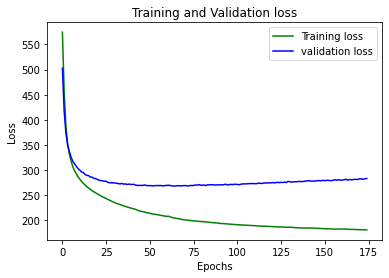

In [ ]:
trainer.train(num_epochs=100, lr=0.0008)
output_layer_numpy, latent_layer_numpy, batch_effect_layer = trainer.predict(gene_expression_dataset.data, gene_expression_dataset.batch_indices)
latent_code = np.concatenate(latent_layer_numpy, axis=1)

---
#Extracting the updated expression matrix


In [ ]:
output_layer_numpy, latent_layer_numpy, batch_effect_layer = trainer.predict(gene_expression_dataset.data, gene_expression_dataset.batch_indices)
latent_code = np.concatenate(latent_layer_numpy, axis=1)
oln1=output_layer_numpy[1]
l1=latent_layer_numpy[1]

In [ ]:
adata_sc=adata1.copy()
oln1 = np.array(oln1, dtype=float)
adata_sc.X = oln1

In [ ]:
adata_sc1=adata_sc.copy()


----

#Quality check after scScope

In [ ]:
a1=adata1.copy()
a2=adata_sc1.copy()
sc.pp.calculate_qc_metrics(a1, percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(a2, percent_top=None, log1p=False, inplace=True)

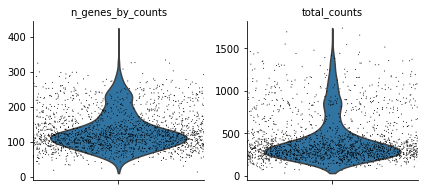

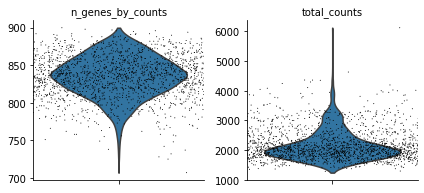

In [ ]:
sc.pl.violin(a1, ['n_genes_by_counts', 'total_counts'],jitter=0.7, multi_panel=True)
sc.pl.violin(a2, ['n_genes_by_counts', 'total_counts'], jitter=0.7, multi_panel=True)

Visualizing cell counts and no. fo genes expressed before and after applying scScope

* Blue : before application of scScope
* Red  : after application of scScope

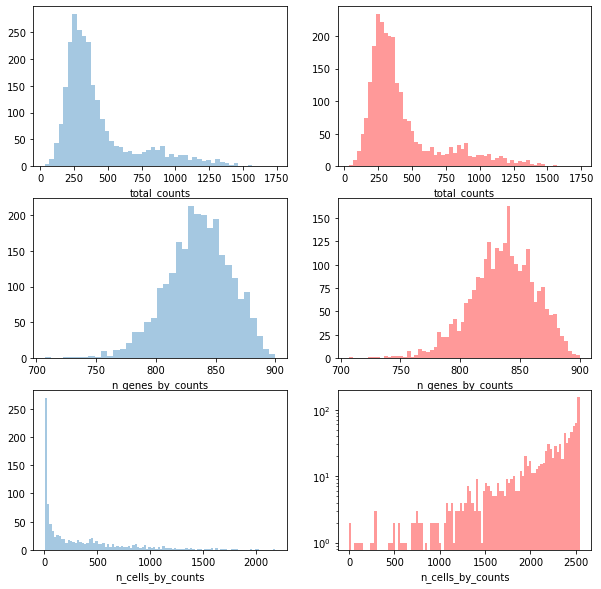

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
sns.distplot(a1.obs["total_counts"], kde=False, ax=axs[0,0])
sns.distplot(a1.obs["total_counts"], kde=False, bins=60, color= 'red', ax=axs[0,1])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, ax=axs[1,0])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, bins=60, color= 'red', ax=axs[1,1])
sns.distplot(a1.var["n_cells_by_counts"], kde=False,bins=100,  ax=axs[2,0])
plt.yscale('log') 
sns.distplot(a2.var["n_cells_by_counts"], kde=False, color= 'red',bins=100, ax=axs[2,1])
plt.yscale('log') 

#Principal Component analysis on datasets


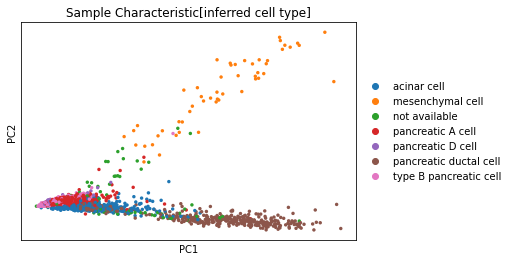

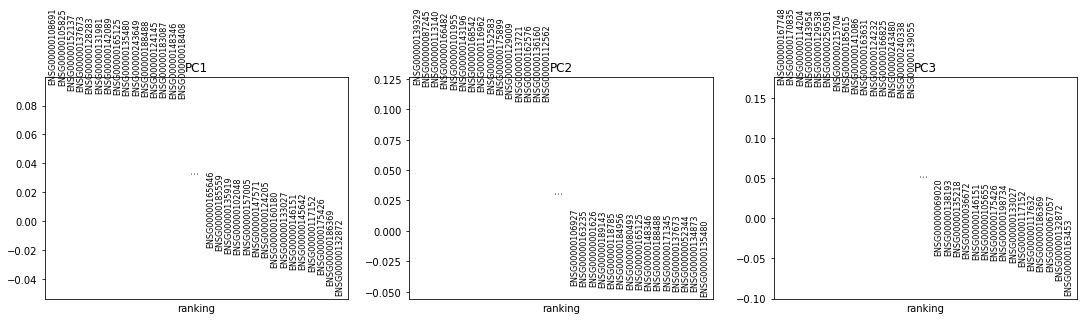

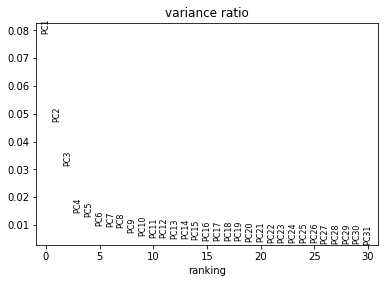

In [ ]:
sc.pp.log1p(adata1)#normalise
sc.pp.scale(adata1)#scale
sc.pp.pca(adata1) 
sc.pl.pca_overview(adata1,color='Sample Characteristic[inferred cell type]')

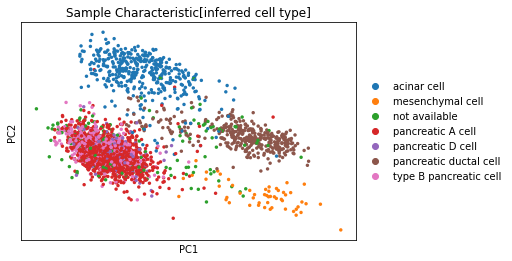

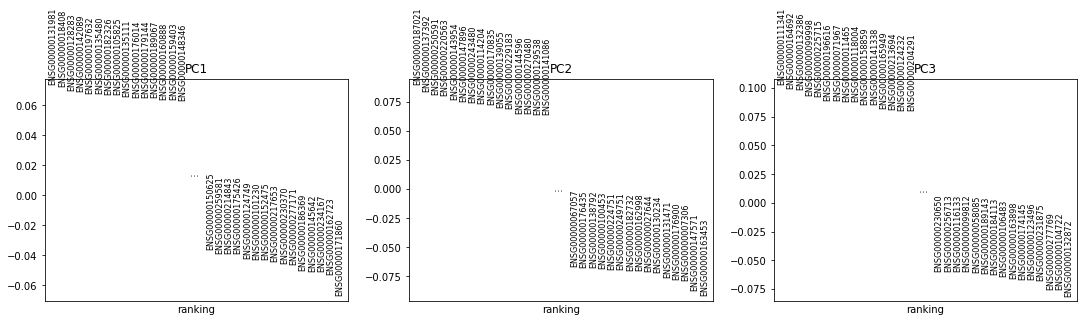

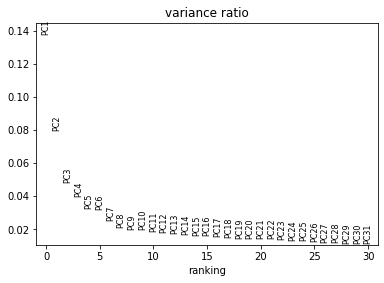

In [ ]:
sc.pp.log1p(adata_sc1)#normalise
sc.pp.scale(adata_sc1)#scale
sc.pp.pca(adata_sc1) 
sc.pl.pca_overview(adata_sc1, color='Sample Characteristic[inferred cell type]')

#Dimensionality reduction

#1. tSNE 
visualing the data using tSNE before and after the model

In [ ]:
q1=adata1.copy()
q2=adata_sc1.copy()

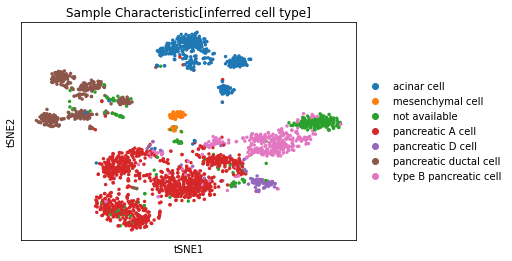

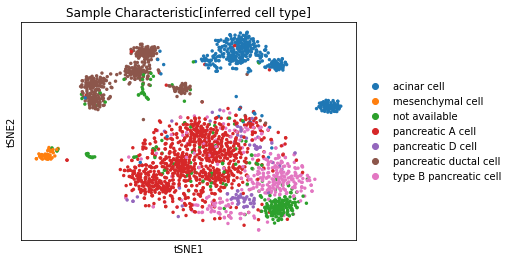

In [ ]:
sc.tl.tsne(q1, perplexity=30, learning_rate=1000, random_state=0)
sc.tl.tsne(q2, perplexity=30, learning_rate=1000, random_state=0)
sc.pl.tsne(q1, color='Sample Characteristic[inferred cell type]')
sc.pl.tsne(q2, color='Sample Characteristic[inferred cell type]')

#2. UMAP
visualing the data using UMAP before and after the model




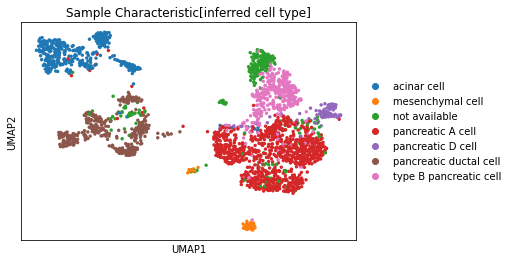

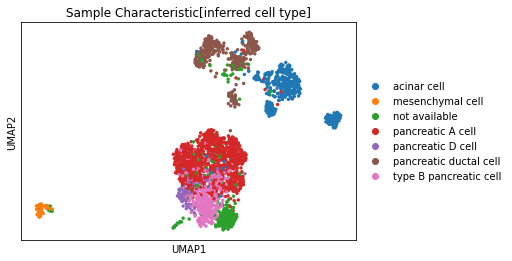

In [ ]:
sc.pp.neighbors(adata1)
sc.tl.umap(adata1, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pp.neighbors(adata_sc1)
sc.tl.umap(adata_sc1, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pl.umap(adata1, color='Sample Characteristic[inferred cell type]')
sc.pl.umap(adata_sc1, color='Sample Characteristic[inferred cell type]')

#CLustering Analysis - using K-means




... storing 'kmeans' as categorical


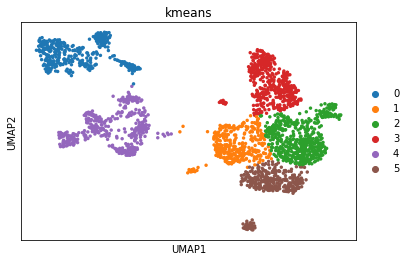

In [ ]:
umap_coordinates = adata1.obsm['X_umap'] 
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) 

adata1.obs['kmeans'] = kmeans.labels_ 
adata1.obs['kmeans'] = adata1.obs['kmeans'].astype(str)

sc.pl.umap(adata1, color='kmeans') 

In [ ]:
rand_index = adjusted_rand_score(labels_true = adata1.obs['Sample Characteristic[inferred cell type]'], labels_pred = adata1.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.48


... storing 'kmeans' as categorical


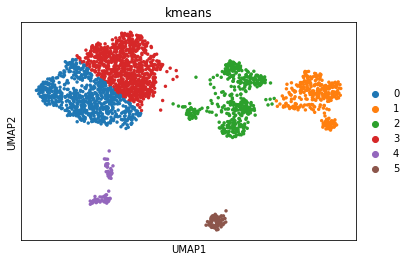

In [ ]:
umap_coordinates = adata_sc1.obsm['X_umap'] 
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) 

adata_sc1.obs['kmeans'] = kmeans.labels_ 
adata_sc1.obs['kmeans'] = adata_sc1.obs['kmeans'].astype(str)

sc.pl.umap(adata_sc1, color='kmeans') 

In [ ]:
rand_index = adjusted_rand_score(labels_true = adata1.obs['Sample Characteristic[inferred cell type]'], labels_pred = adata_sc1.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.55


#Differential Analysis : Visualisations

# 1. TracksPlot


/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


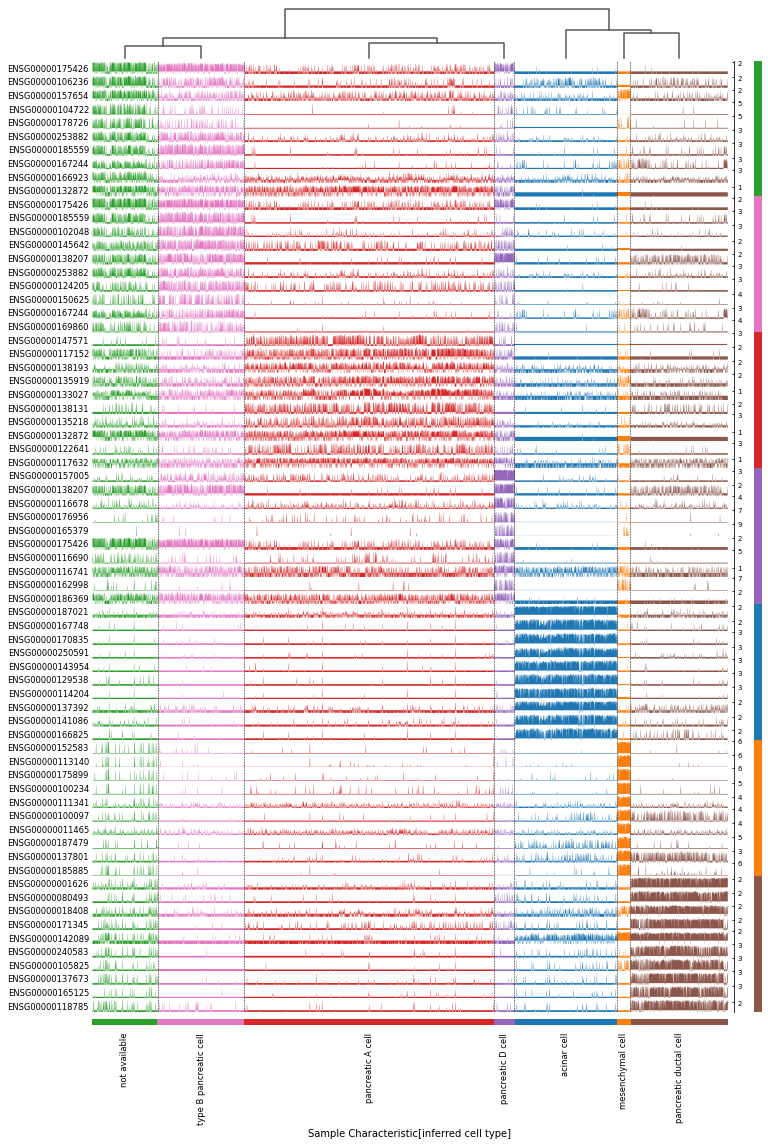

In [ ]:
sc.tl.rank_genes_groups(adata1, groupby='Sample Characteristic[inferred cell type]', use_raw=True, method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata1, groupby='Sample Characteristic[inferred cell type]') # plot the result

/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


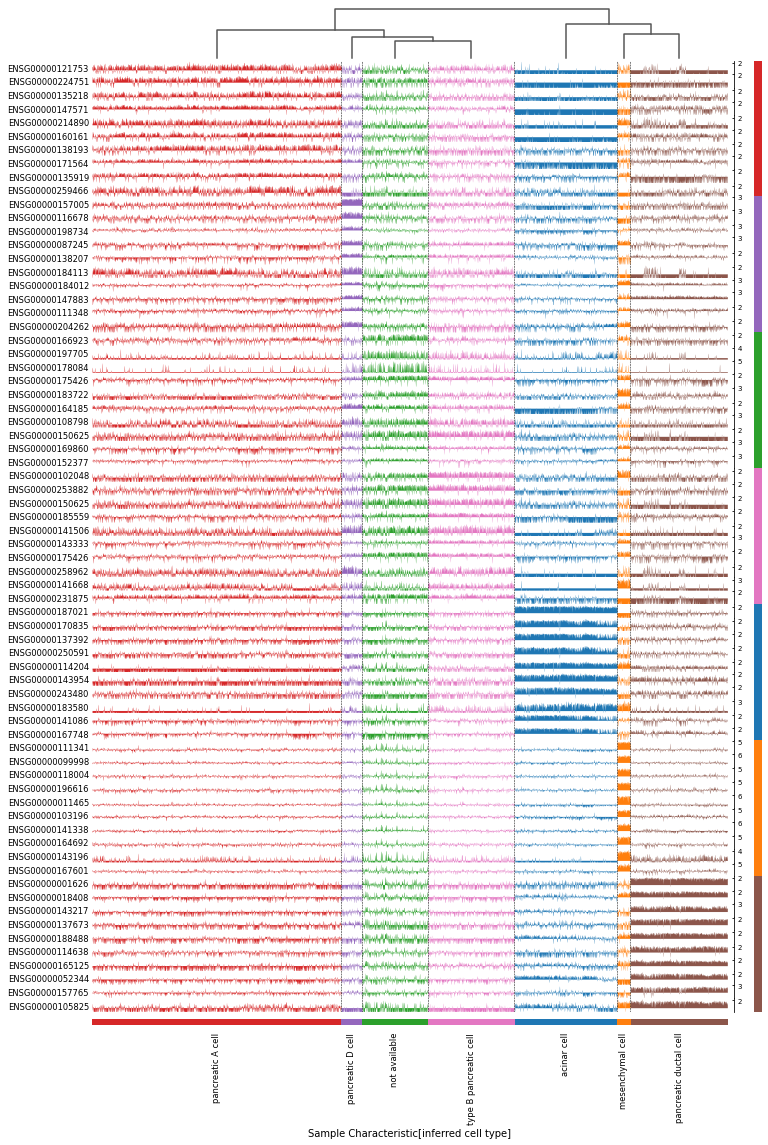

In [ ]:
sc.tl.rank_genes_groups(adata_sc1, groupby='Sample Characteristic[inferred cell type]', use_raw=True, method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata_sc1, groupby='Sample Characteristic[inferred cell type]') # plot the result

# 2. Heatmaps

These hetamps clearly show that the noise is reduced significantly by the scScope model

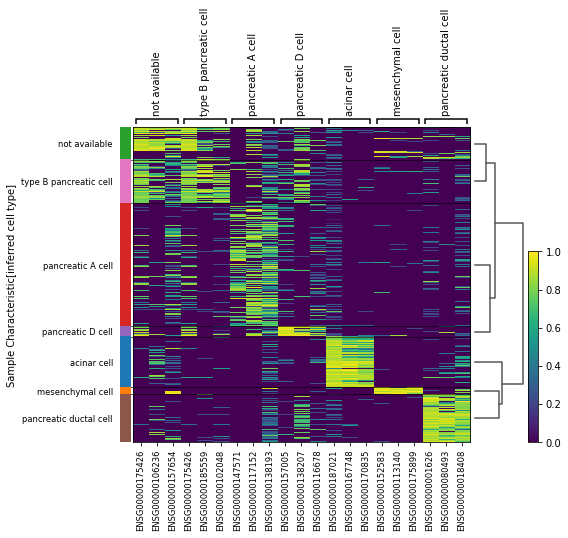

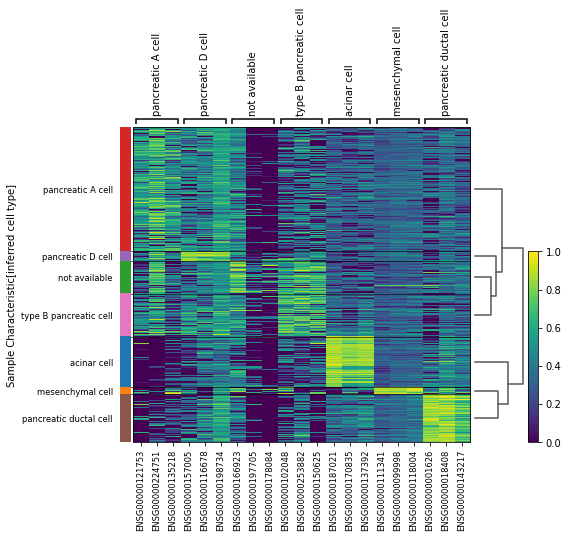

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata1, n_genes=3, standard_scale='var')
sc.pl.rank_genes_groups_heatmap(adata_sc1, n_genes=3, standard_scale='var')

#Conclusions

The scScope model plays a good role in reeducing the noise in the data, however certain limitations exists like: quality and type of data highly affects the functioning of the model. To have an overall better result, we shall use this in combinantion with other models as this only reduces the noise in a data